In [ ]:
# def calculate_sustainable_growth(data, pre_profit, post_profit):
    
#     data = data.copy()
#     entity = data['entity_id'].iloc[0]

#     # Apply CUPED to FLGP
#     data_flgp = data.dropna(subset=[pre_profit, post_profit])
#     theta_flgp = np.cov(data_flgp[pre_profit], data_flgp[post_profit])[0, 1] / np.var(data_flgp[pre_profit])
#     data_flgp['flgp_post_cuped'] = data_flgp[post_profit] - theta_flgp * (data_flgp[pre_profit] - data_flgp[pre_profit].mean())

#     # Apply CUPED to Orders
#     data_orders = data.dropna(subset=['orders_pre', 'orders_post'])
#     theta_orders = np.cov(data_orders['orders_pre'], data_orders['orders_post'])[0, 1] / np.var(data_orders['orders_pre'])
#     data_orders['orders_post_cuped'] = data_orders['orders_post'] - theta_orders * (data_orders['orders_pre'] - data_orders['orders_pre'].mean())

#     # Per User Metrics
#     holdout_flgpu_post = data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'].mean()
#     holdout_flgpu_pre = data_flgp.loc[data_flgp['is_customer_holdout'], pre_profit].mean()
    
#     non_holdout_flgpu_post = data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'].mean()
#     non_holdout_flgpu_pre = data_flgp.loc[~data_flgp['is_customer_holdout'], pre_profit].mean()

#     holdout_orders_per_user_post = data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'].mean()
#     holdout_orders_per_user_pre = data_orders.loc[data_orders['is_customer_holdout'], 'orders_pre'].mean()
    
#     non_holdout_orders_per_user_post = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'].mean()
#     non_holdout_orders_per_user_pre = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_pre'].mean()

#     # Apply DID
#     # DID to flgpu
#     d_flgpu_pre = non_holdout_flgpu_pre - holdout_flgpu_pre
#     d_flgpu_post = non_holdout_flgpu_post - holdout_flgpu_post

#     non_holdout_flgpu_adjusted_post = non_holdout_flgpu_post - d_flgpu_pre
#     holdout_flgpu_adjusted_post = holdout_flgpu_post 

#     did_flgpu  = non_holdout_flgpu_adjusted_post - holdout_flgpu_adjusted_post

#     # DID to orders_per_user
#     d_orders_per_user_pre = non_holdout_orders_per_user_pre - holdout_orders_per_user_pre
#     d_orders_per_user_post = non_holdout_orders_per_user_post - holdout_orders_per_user_post

#     non_holdout_orders_per_user_adjusted_post = non_holdout_orders_per_user_post - d_orders_per_user_pre
#     holdout_orders_per_user_adjusted_post = holdout_orders_per_user_post

#     did_orders_per_user  = non_holdout_orders_per_user_adjusted_post - holdout_orders_per_user_adjusted_post

#     # Total FLGP and Orders
#     holdout_user_count = data['is_customer_holdout'].sum()
#     non_holdout_user_count = (~data['is_customer_holdout']).sum()

#     holdout_total_flgp_cuped = holdout_flgpu_adjusted_post * holdout_user_count
#     non_holdout_total_flgp_cuped = non_holdout_flgpu_adjusted_post * non_holdout_user_count

#     holdout_total_orders_cuped = holdout_orders_per_user_adjusted_post * holdout_user_count
#     non_holdout_total_orders_cuped = non_holdout_orders_per_user_adjusted_post * non_holdout_user_count

#     # Normalize for Population Differences
#     holdout_user_count = data['is_customer_holdout'].sum()
#     non_holdout_user_count = (~data['is_customer_holdout']).sum()

#     scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
#     scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

#     #Calculate Per order Metrics
#     holdout_flgp_per_order_cuped = (
#     np.nan if pd.isna(holdout_total_orders_cuped) or holdout_total_orders_cuped == 0
#     else holdout_total_flgp_cuped / holdout_total_orders_cuped
#     )
       
#     non_holdout_flgp_per_order_cuped = (
#     np.nan if pd.isna(non_holdout_total_orders_cuped) or non_holdout_total_orders_cuped == 0
#     else non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped
#     )

#     holdout_orders_per_user_cuped = holdout_orders_per_user_adjusted_post
#     non_holdout_orders_per_user_cuped = non_holdout_orders_per_user_adjusted_post

#     # Incremental Differences (CUPED)
#     incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
#     incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

#     # Percentage Changes (CUPED)
#     percentage_change_orders_cuped = ((incremental_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
#     percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan

#     # Sustainable Growth Calculation
#     sustainable_growth = ((incremental_orders_cuped + (incremental_flgp_cuped / non_holdout_flgp_per_order_cuped)) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan

#     # T-tests for significance
#     t_stat_orders, p_value_orders = ttest_ind(
#         data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'],
#         data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'],
#         equal_var=False
#     )

#     t_stat_flgp, p_value_flgp = ttest_ind(
#         data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
#         data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
#         equal_var=False
#     )

#     return {
#         'entity': entity,
#         'sustainable_growth': sustainable_growth,
#         'percentage_change_orders_cuped': percentage_change_orders_cuped,
#         'incremental_orders_cuped': incremental_orders_cuped,
#         'non_holdout_total_orders_cuped':non_holdout_total_orders_cuped,
#         'holdout_total_orders_cuped':scaled_holdout_total_orders_cuped,
#         't_stat_orders': t_stat_orders,
#         'p_value_orders': p_value_orders,
#         'percentage_change_flgp_cuped': percentage_change_flgp_cuped,
#         'incremental_flgp_cuped': incremental_flgp_cuped,
#         'non_holdout_total_flgp_cuped': non_holdout_total_flgp_cuped,
#         'holdout_total_flgp_cuped':scaled_holdout_total_flgp_cuped,
#         't_stat_flgp': t_stat_flgp,
#         'p_value_flgp': p_value_flgp,
#         'holdout_flgp_per_order_cuped': holdout_flgp_per_order_cuped,
#         'non_holdout_flgp_per_order_cuped': non_holdout_flgp_per_order_cuped,
#         'holdout_orders_per_user_cuped': holdout_orders_per_user_cuped,
#         'non_holdout_orders_per_user_cuped': non_holdout_orders_per_user_cuped
#     }



In [ ]:
# import numpy as np
# import scipy.stats as stats

# def ratio_test(holdout_flgp, holdout_orders, non_holdout_flgp, non_holdout_orders, holdout_n, non_holdout_n):
    
#     # Compute means
#     holdout_mean_flgp = np.mean(holdout_flgp)
#     holdout_mean_orders = np.mean(holdout_orders)
#     non_holdout_mean_flgp = np.mean(non_holdout_flgp)
#     non_holdout_mean_orders = np.mean(non_holdout_orders)

#     # Compute FLGP per Order
#     holdout_flgp_per_order = holdout_mean_flgp / holdout_mean_orders
#     non_holdout_flgp_per_order = non_holdout_mean_flgp / non_holdout_mean_orders

#     # Compute variances
#     var_flgp_holdout = np.var(holdout_flgp, ddof=1)
#     var_flgp_non_holdout = np.var(non_holdout_flgp, ddof=1)
#     var_orders_holdout = np.var(holdout_orders, ddof=1)
#     var_orders_non_holdout = np.var(non_holdout_orders, ddof=1)

#     # Compute covariance
#     cov_flgp_orders_holdout = np.cov(holdout_flgp, holdout_orders, ddof=1)[0, 1]
#     cov_flgp_orders_non_holdout = np.cov(non_holdout_flgp, non_holdout_orders, ddof=1)[0, 1]

#     # Delta Method Standard Error for Holdout
#     se_holdout = (1 / holdout_mean_orders) * np.sqrt(
#         (var_flgp_holdout / holdout_n)
#         - 2 * (holdout_flgp_per_order) * (cov_flgp_orders_holdout / holdout_n)
#         + (holdout_flgp_per_order ** 2) * (var_orders_holdout / holdout_n)
#     )

#     # Delta Method Standard Error for Non-Holdout
#     se_non_holdout = (1 / non_holdout_mean_orders) * np.sqrt(
#         (var_flgp_non_holdout / non_holdout_n)
#         - 2 * (non_holdout_flgp_per_order) * (cov_flgp_orders_non_holdout / non_holdout_n)
#         + (non_holdout_flgp_per_order ** 2) * (var_orders_non_holdout / non_holdout_n)
#     )

#     # Compute difference in FLGP per Order
#     diff_flgp_per_order = non_holdout_flgp_per_order - holdout_flgp_per_order

#     # Compute Standard Error of the Difference
#     se_diff = np.sqrt(se_holdout**2 + se_non_holdout**2)

#     # Compute Z-score
#     z_score = diff_flgp_per_order / se_diff

#     # Compute p-value (two-tailed test)
#     p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

#     return {
#         "diff_flgp_per_order": diff_flgp_per_order,
#         "z_score": z_score,
#         "p_value": p_value,
#         "holdout_flgp_per_order": holdout_flgp_per_order,
#         "non_holdout_flgp_per_order": non_holdout_flgp_per_order
#     }



# # holdout_flgp = data_flgp.loc[tt['is_customer_holdout'], 'analytical_profit_post']
# # non_holdout_flgp = data_flgp.loc[~tt['is_customer_holdout'], 'analytical_profit_post']

# # holdout_orders = data_orders.loc[tt['is_customer_holdout'], 'orders_post']
# # non_holdout_orders = data_orders.loc[~tt['is_customer_holdout'], 'orders_post']

# # holdout_n = len(holdout_flgp)
# # non_holdout_n = len(non_holdout_flgp)

# # # Perform Ratio-Based Hypothesis Test
# # ratio_test_result = ratio_test(holdout_flgp, holdout_orders, non_holdout_flgp, non_holdout_orders, holdout_n, non_holdout_n)

# # print(ratio_test_result)

# # Drop NaNs from both relevant columns at the same time to maintain alignment
# tt_clean = tt.dropna(subset=['analytical_profit_post', 'orders_post'])

# # Extract holdout & non-holdout FLGP and Orders
# holdout_flgp = tt_clean.loc[tt_clean['is_customer_holdout'], 'analytical_profit_post']
# non_holdout_flgp = tt_clean.loc[~tt_clean['is_customer_holdout'], 'analytical_profit_post']

# holdout_orders = tt_clean.loc[tt_clean['is_customer_holdout'], 'orders_post']
# non_holdout_orders = tt_clean.loc[~tt_clean['is_customer_holdout'], 'orders_post']

# # Compute sample sizes
# holdout_n = len(holdout_flgp)
# non_holdout_n = len(non_holdout_flgp)

# # Perform Ratio-Based Hypothesis Test
# ratio_test_result = ratio_test(holdout_flgp, holdout_orders, non_holdout_flgp, non_holdout_orders, holdout_n, non_holdout_n)

# print(ratio_test_result)


In [ ]:
# if __name__ == "__main__":

#     ## Get Data From DB ## ---------------------------------------------------
#     project_id = "logistics-customer-staging"
#     logging.info(f"Initializing BigQuery client for project: {project_id}")

#     try:
#         # Initialize BigQuery client
#         client = bigquery.Client(project=project_id)
#     except Exception as e:
#         logging.error(f"Failed to initialize BigQuery client: {e}")
#         sys.exit(1)

#    # Record the start time
#     start_time = time.time()
    
#     combined_df = combined_data(mkt_data, dps_data)
    
#     end_time = time.time()
#     elapsed_time = end_time - start_time

#     print(f"Time to extract data from DB: elapsed_time = {elapsed_time}")
    
#     ## Calculate Sustainable Growth after CUPED and DID ## ---------------------
    
#     metric_pairs = [
#     ('analytical_profit_pre', 'analytical_profit_post'),
#     ]

#     # Initialize results list
#     results = []

#     start_time = time.time()
#     # Loop through each metric pair
#     for pre_metric, post_metric in metric_pairs:
#         for entity in combined_df['entity_id'].unique():
#             entity_data = combined_df[combined_df['entity_id'] == entity]
            
#             try:
#                 result = calculate_sustainable_growth(entity_data, pre_metric, post_metric)
#                 result['metric_used'] = f"{pre_metric}_vs_{post_metric}"
#                 results.append(result)
            
#             except Exception as e:
#                 print(f"Skipping entity {entity} due to error: {e}")
#                 continue
#     end_time = time.time()
    
#     elapsed_time = end_time - start_time

#     print(f"Time to calculate sustainable growth: elapsed_time = {elapsed_time}")

#     final_results_df = pd.DataFrame(results)

#     # Drop rows where sustainable_growth is NaN
#     final_results_df = final_results_df.dropna(subset=['sustainable_growth'])

#     # Get today's date
#     today = datetime.today().date()
#     # Calculate the Monday of the current week
#     week_start = today - timedelta(days=today.weekday())
#     final_results_df['updated_date'] = week_start

#     # Save to CSV
#     name = "profitable_growth" + str(week_start) + ".csv"
#     final_results_df.to_csv(name, index=False)

#     print("Processing completed. Check profitable_growth.csv for results.")
    
    
#     ## Push Dataframe to a bigquery table ## ----------------------------------
    
#     #creating bigquery object
#     project_id_new = 'logistics-data-storage-staging'
#     bigquery_client = bigquery.Client(project=project_id_new)
    
    
#     dataset = "shazeb"
#     table_name = "abc_performance"
    
#     data = bq_create_dataset(bigquery_client, dataset)
#     #drop_table(bigquery_client, "shazeb", "abc_performance")
#     table = bq_create_table(bigquery_client, dataset, table_name)
#     #Wait for table readiness and re-fetch it
#     #table = wait_for_table_ready(bigquery_client, dataset, table_name)

#     # Optional: add a brief pause to ensure metadata propagation
#     #time.sleep(60)

#     #time.sleep(300)

#     insert_df_rows_bigquery(
#         client=bigquery_client,
#         dataset_id=dataset,
#         table_id=table_name,
#         df=final_results_df
#     )

In [2]:
import numpy as np
import pandas as pd
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import db_dtypes
import bigframes.pandas as bpd
from IPython.display import display, HTML
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from datetime import datetime
from typing import Union
import logging
import sys

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s %(levelname)s:%(message)s',
    handlers=[
        logging.StreamHandler(sys.stdout)
    ]
)


# holdout_data = """

# WITH holdout_entities AS (
#   SELECT
#         entity_id
#        ,`Release Date` as release_date
#   FROM `logistics-data-storage-staging.long_term_pricing.global_holdout_rollout`
#   WHERE `Release Date` < DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE())- 2 DAY)
# ),
# customer_information AS (
#   SELECT
#          e.entity_id
#         ,e.release_date
#         ,IF(d.created_date <= e.release_date, FALSE, COALESCE(is_customer_holdout, FALSE)) AS is_customer_holdout
#         ,customer_id
#   FROM `fulfillment-dwh-production.cl.dps_holdout_users` AS d
#   JOIN holdout_entities AS e
#         ON d.entity_id = e.entity_id
#   WHERE d.created_date >= date('2025-01-01')
#     AND created_date < CURRENT_DATE()  -- data is not full/not present for current date
#     AND customer_id IS NOT NULL
#     AND customer_id NOT IN UNNEST(ARRAY(SELECT id FROM `fulfillment-dwh-production.cl._bad_dps_logs_ids`)) -- get rid of ids like 'null', 'test' etc
#   GROUP BY 1, 2, 3, 4
# ), 
# orders as (
#   SELECT 
#      dps.region
#     ,dps.entity_id
#     ,date_trunc(usi.release_date, WEEK(MONDAY)) release_week
#     ,date_trunc(dps.created_date, WEEK(MONDAY)) week
#     ,usi.is_customer_holdout
#     ,count(distinct dps.dps_customer_id) users
#     ,COUNT(DISTINCT dps.platform_order_code) AS orders
#     ,SUM(dps.fully_loaded_gross_profit_eur) AS flgp
#   FROM `fulfillment-dwh-production.cl.dps_sessions_mapped_to_orders` dps
#   LEFT JOIN customer_information usi
#     ON dps.entity_id = usi.entity_id
#     AND dps.dps_customer_id = usi.customer_id
#   WHERE created_date >= DATE_SUB(DATE_TRUNC(release_date, WEEK(MONDAY)), INTERVAL 8 WEEK)
#   AND created_date < DATE_TRUNC(CURRENT_DATE, WEEK(MONDAY))
#   AND platform_order_code IS NOT NULL
#   AND is_own_delivery
#   AND is_sent
#   AND vendor_vertical_parent in ('Restaurant','restaurant','restaurants')
#   GROUP BY 1,2,3,4,5
# )
#   select o.*
#         ,orders / users opu
#         ,flgp / orders flgpo
#   from orders o
  
# """

holdout_data = """

WITH holdout_entities AS (
  SELECT
        entity_id
       ,`Release Date` as release_date
  FROM `logistics-data-storage-staging.long_term_pricing.global_holdout_rollout`
  WHERE `Release Date` < DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE())- 2 DAY)
),
customer_information AS (
  SELECT
         e.entity_id
        ,e.release_date
        ,IF(d.created_date <= e.release_date, FALSE, COALESCE(is_customer_holdout, FALSE)) AS is_customer_holdout
        ,customer_id
  FROM `fulfillment-dwh-production.cl.dps_holdout_users` AS d
  JOIN holdout_entities AS e
        ON d.entity_id = e.entity_id
  WHERE d.created_date >= date('2025-01-01')
    AND created_date < CURRENT_DATE()  -- data is not full/not present for current date
    AND customer_id IS NOT NULL
    AND customer_id NOT IN UNNEST(ARRAY(SELECT id FROM `fulfillment-dwh-production.cl._bad_dps_logs_ids`)) -- get rid of ids like 'null', 'test' etc
  GROUP BY 1, 2, 3, 4
), 
orders as (
  SELECT 
     dps.region
    ,dps.entity_id
    ,usi.release_date release_week
    ,date_trunc(dps.created_date, WEEK(MONDAY)) week
    ,usi.is_customer_holdout
    ,count(distinct dps.dps_customer_id) users
    ,COUNT(DISTINCT dps.platform_order_code) AS orders
    ,SUM(dps.fully_loaded_gross_profit_eur) AS flgp
  FROM `fulfillment-dwh-production.cl.dps_sessions_mapped_to_orders` dps
  LEFT JOIN customer_information usi
    ON dps.entity_id = usi.entity_id
    AND dps.dps_customer_id = usi.customer_id
  WHERE created_date >= DATE_SUB(release_date, INTERVAL 8 WEEK)
  AND created_date < CURRENT_DATE
  AND platform_order_code IS NOT NULL
  AND is_own_delivery
  AND is_sent
  AND vendor_vertical_parent in ('Restaurant','restaurant','restaurants')
  GROUP BY 1,2,3,4,5
)
  select o.*
        ,orders / users opu
        ,flgp / orders flgpo
  from orders o
  
"""

# holdout_data = """

# WITH holdout_entities AS (
#   SELECT
#         entity_id
#        ,`Release Date` as release_date
#   FROM `logistics-data-storage-staging.long_term_pricing.global_holdout_rollout`
#   WHERE `Release Date` < DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE())- 2 DAY)
# ),
# customer_information AS (
#   SELECT
#          e.entity_id
#         ,e.release_date
#         ,IF(d.created_date <= e.release_date, FALSE, COALESCE(is_customer_holdout, FALSE)) AS is_customer_holdout
#         ,customer_id
#   FROM `fulfillment-dwh-production.cl.dps_holdout_users` AS d
#   JOIN holdout_entities AS e
#         ON d.entity_id = e.entity_id
#   WHERE d.created_date >= date('2025-01-01')
#     AND created_date < CURRENT_DATE()  -- data is not full/not present for current date
#     AND customer_id IS NOT NULL
#     AND customer_id NOT IN UNNEST(ARRAY(SELECT id FROM `fulfillment-dwh-production.cl._bad_dps_logs_ids`)) -- get rid of ids like 'null', 'test' etc
#   GROUP BY 1, 2, 3, 4
# ), 
# orders as (
#   SELECT 
#      dps.region
#     ,dps.entity_id
#     ,usi.release_date release_date
#     ,dps.created_date created_date
#     ,usi.is_customer_holdout
#     ,count(distinct dps.dps_customer_id) users
#     ,COUNT(DISTINCT dps.platform_order_code) AS orders
#     ,SUM(dps.fully_loaded_gross_profit_eur) AS flgp
#   FROM `fulfillment-dwh-production.cl.dps_sessions_mapped_to_orders` dps
#   LEFT JOIN customer_information usi
#     ON dps.entity_id = usi.entity_id
#     AND dps.dps_customer_id = usi.customer_id
#   WHERE created_date >= DATE_SUB(DATE_TRUNC(release_date, WEEK(MONDAY)), INTERVAL 8 WEEK)
#   AND created_date < DATE_TRUNC(CURRENT_DATE, WEEK(MONDAY))
#   AND platform_order_code IS NOT NULL
#   AND is_own_delivery
#   AND is_sent
#   AND vendor_vertical_parent in ('Restaurant','restaurant','restaurants')
#   GROUP BY 1,2,3,4,5
# )
#   select o.*
#         ,orders / users opu
#         ,flgp / orders flgpo
#   from orders o
  
# """

# grouped_holdout = """

# WITH holdout_entities AS (
#   SELECT
#         entity_id
#        ,`Release Date` as release_date
#   FROM `logistics-data-storage-staging.long_term_pricing.global_holdout_rollout`
#   WHERE `Release Date` < DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE())- 2 DAY)
# ),
# customer_information AS (
#   SELECT
#          e.entity_id
#         ,e.release_date
#         ,IF(d.created_date <= e.release_date, FALSE, COALESCE(is_customer_holdout, FALSE)) AS is_customer_holdout
#         ,customer_id
#   FROM `fulfillment-dwh-production.cl.dps_holdout_users` AS d
#   JOIN holdout_entities AS e
#         ON d.entity_id = e.entity_id
#   WHERE d.created_date >= date('2025-01-01')
#     AND created_date < CURRENT_DATE()  -- data is not full/not present for current date
#     AND customer_id IS NOT NULL
#     AND customer_id NOT IN UNNEST(ARRAY(SELECT id FROM `fulfillment-dwh-production.cl._bad_dps_logs_ids`)) -- get rid of ids like 'null', 'test' etc
#   GROUP BY 1, 2, 3, 4
# ), 
# orders as (
#   SELECT 
#      dps.region
#     ,dps.entity_id
#     ,usi.release_date
#     ,usi.is_customer_holdout
#     ,count(distinct dps.dps_customer_id) users
#     ,COUNT(DISTINCT dps.platform_order_code) AS orders
#     ,SUM(dps.fully_loaded_gross_profit_eur) AS flgp
#   FROM `fulfillment-dwh-production.cl.dps_sessions_mapped_to_orders` dps
#   LEFT JOIN customer_information usi
#     ON dps.entity_id = usi.entity_id
#     AND dps.dps_customer_id = usi.customer_id
#   WHERE created_date > DATE_TRUNC(release_date, WEEK)
#   AND created_date < DATE_TRUNC(CURRENT_DATE, WEEK)
#   AND platform_order_code IS NOT NULL
#   AND is_own_delivery
#   AND is_sent
#   AND vendor_vertical_parent in ('Restaurant','restaurant','restaurants')
#   GROUP BY 1,2,3,4
# )
#   select o.*
#         ,orders / users opu
#         ,flgp / orders flgpo
#   from orders o
# """



test = """

WITH holdout_entities AS (
  SELECT
        entity_id
       ,`Release Date` as release_date
  FROM `logistics-data-storage-staging.long_term_pricing.global_holdout_rollout`
  WHERE `Release Date` < DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE())- 2 DAY)
),
customer_information AS (
  SELECT
         e.entity_id
        ,e.release_date
        ,IF(d.created_date <= e.release_date, FALSE, COALESCE(is_customer_holdout, FALSE)) AS is_customer_holdout
        ,customer_id
  FROM `fulfillment-dwh-production.cl.dps_holdout_users` AS d
  JOIN holdout_entities AS e
        ON d.entity_id = e.entity_id
  WHERE d.created_date >= date('2025-01-01')
    AND created_date < CURRENT_DATE()  -- data is not full/not present for current date
    AND customer_id IS NOT NULL
    AND customer_id NOT IN UNNEST(ARRAY(SELECT id FROM `fulfillment-dwh-production.cl._bad_dps_logs_ids`)) -- get rid of ids like 'null', 'test' etc
    AND d.entity_id = 'HS_SA'
  GROUP BY 1, 2, 3, 4
)
  SELECT 
     e.entity_id
    ,e.customer_id customer_id
    ,e.is_customer_holdout
    ,COUNT(DISTINCT case when dps.created_date <= e.release_date then dps.platform_order_code end) AS orders_pre
    ,COUNT(DISTINCT case when dps.created_date > e.release_date then dps.platform_order_code end) AS orders_post
    ,SUM(case when dps.created_date <= e.release_date then dps.fully_loaded_gross_profit_eur end) AS flgp_pre
    ,SUM(case when dps.created_date > e.release_date then dps.fully_loaded_gross_profit_eur end) AS flgp_post
  FROM customer_information e
  LEFT JOIN `fulfillment-dwh-production.cl.dps_sessions_mapped_to_orders` dps
    ON dps.entity_id = e.entity_id
    AND dps.dps_customer_id = e.customer_id
  WHERE created_date >= DATE_SUB(release_date, INTERVAL 8 WEEK)
  AND created_date < CURRENT_DATE
  AND platform_order_code IS NOT NULL
  AND is_own_delivery
  AND is_sent
  AND dps.entity_id = 'HS_SA'
  AND vendor_vertical_parent in ('Restaurant','restaurant','restaurants')
  GROUP BY 1,2,3

  """

In [ ]:
# growth_data = """

# WITH holdout_entities AS (
#   SELECT
#         entity_id
#        ,`Release Date` as release_date
#   FROM `logistics-data-storage-staging.long_term_pricing.global_holdout_rollout`
#   WHERE `Release Date` < DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE())- 2 DAY)
# ),
# customer_information AS (
#   SELECT
#          e.entity_id
#         ,e.release_date
#         ,IF(d.created_date <= e.release_date, FALSE, COALESCE(is_customer_holdout, FALSE)) AS is_customer_holdout
#         ,customer_id
#   FROM `fulfillment-dwh-production.cl.dps_holdout_users` AS d
#   JOIN holdout_entities AS e
#         ON d.entity_id = e.entity_id
#   WHERE d.created_date >= date('2025-01-01')
#     AND created_date < CURRENT_DATE()  -- data is not full/not present for current date
#     AND customer_id IS NOT NULL
#     AND customer_id NOT IN UNNEST(ARRAY(SELECT id FROM `fulfillment-dwh-production.cl._bad_dps_logs_ids`)) -- get rid of ids like 'null', 'test' etc
#     --AND d.entity_id in ('FP_MM','GV_CI', 'PY_UY','GV_BA','PY_NI','TB_IQ','TB_OM','PY_HN','TB_KW','GV_ME','PO_FI','FP_SG','FP_TH','HS_SA','FY_CY','TB_JO','GV_RS','GV_UG','GV_NG','NP_HU')
#   GROUP BY 1, 2, 3, 4
# )
#   SELECT 
#      e.entity_id
#     ,e.customer_id customer_id
#     ,e.is_customer_holdout
#     ,COUNT(DISTINCT case when dps.created_date <= e.release_date then dps.platform_order_code end) AS orders_pre
#     ,COUNT(DISTINCT case when dps.created_date > e.release_date then dps.platform_order_code end) AS orders_post
#     ,SUM(case when dps.created_date <= e.release_date then dps.fully_loaded_gross_profit_eur end) AS flgp_pre
#     ,SUM(case when dps.created_date > e.release_date then dps.fully_loaded_gross_profit_eur end) AS flgp_post
#   FROM customer_information e
#   LEFT JOIN `fulfillment-dwh-production.cl.dps_sessions_mapped_to_orders` dps
#     ON dps.entity_id = e.entity_id
#     AND dps.dps_customer_id = e.customer_id
#   WHERE created_date >= DATE_SUB(release_date, INTERVAL 8 WEEK)
#   AND created_date < CURRENT_DATE
#   AND platform_order_code IS NOT NULL
#   AND is_own_delivery
#   AND is_sent
#   --AND dps.entity_id in ('FP_MM','GV_CI', 'PY_UY','GV_BA','PY_NI','TB_IQ','TB_OM','PY_HN','TB_KW','GV_ME','PO_FI','FP_SG','FP_TH','HS_SA','FY_CY','TB_JO','GV_RS','GV_UG','GV_NG','NP_HU')
#   AND vendor_vertical_parent in ('Restaurant','restaurant','restaurants')
#   GROUP BY 1,2,3

#   """


# mkt_data = """
  
#   WITH holdout_entities AS (
#   SELECT
#         entity_id
#        ,`Release Date` as release_date
#   FROM `logistics-data-storage-staging.long_term_pricing.global_holdout_rollout`
#   WHERE `Release Date` < DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE())- 2 DAY)
# ),
# customer_information AS (
#   SELECT
#          e.entity_id
#         ,e.release_date
#         ,IF(d.created_date <= e.release_date, FALSE, COALESCE(is_customer_holdout, FALSE)) AS is_customer_holdout
#         ,customer_id
#   FROM `fulfillment-dwh-production.cl.dps_holdout_users` AS d
#   JOIN holdout_entities AS e
#         ON d.entity_id = e.entity_id
#   WHERE d.created_date >= date('2025-01-01')
#     AND created_date < CURRENT_DATE()  -- data is not full/not present for current date
#     AND customer_id IS NOT NULL
#     AND customer_id NOT IN UNNEST(ARRAY(SELECT id FROM `fulfillment-dwh-production.cl._bad_dps_logs_ids`)) -- get rid of ids like 'null', 'test' etc
#   GROUP BY 1, 2, 3, 4
# )
#   SELECT 
#      e.entity_id
#     ,e.customer_id customer_id
#     ,e.is_customer_holdout
#     ,COUNT(DISTINCT case when mkt.order_date <= e.release_date then mkt.order_id end) AS orders_pre
#     ,COUNT(DISTINCT case when mkt.order_date > e.release_date then mkt.order_id end) AS orders_post
#     ,SUM(case when mkt.order_date <= e.release_date then mkt.analytical_profit end) AS analytical_profit_pre
#     ,SUM(case when mkt.order_date > e.release_date then mkt.analytical_profit end) AS analytical_profit_post
#     ,SUM(case when mkt.order_date <= e.release_date then mkt.local_analytical_profit end) AS local_analytical_profit_pre
#     ,SUM(case when mkt.order_date > e.release_date then mkt.local_analytical_profit end) AS local_analytical_profit_post
#     ,SUM(case when mkt.order_date <= e.release_date then mkt.revenue_net end) AS revenue_pre
#     ,SUM(case when mkt.order_date > e.release_date then mkt.revenue_net end) AS revenue_post
#     ,SUM(case when mkt.order_date <= e.release_date then mkt.cost_of_sales end) AS cost_of_sales_pre
#     ,SUM(case when mkt.order_date > e.release_date then mkt.cost_of_sales end) AS cost_of_sales_post
#   FROM customer_information e
#   LEFT JOIN `fulfillment-dwh-production.cl.dps_sessions_mapped_to_orders` dps
#     ON dps.entity_id = e.entity_id
#     AND dps.dps_customer_id = e.customer_id 
#   LEFT JOIN fulfillment-dwh-production.curated_data_shared_mkt.bima_order_profitability mkt
#     ON mkt.global_entity_id = dps.entity_id
#     AND mkt.order_id = dps.platform_order_code
#   WHERE order_date >= DATE_SUB(release_date, INTERVAL 8 WEEK)
#   AND order_date < CURRENT_DATE
#   and created_date >= DATE_SUB(release_date, INTERVAL 8 WEEK)
#   and created_date < CURRENT_DATE
#   AND platform_order_code IS NOT NULL
#   AND is_own_delivery
#   AND is_sent
#   AND e.entity_id is not null
#   AND vendor_vertical_parent in ('Restaurant','restaurant','restaurants')
#   GROUP BY 1,2,3
  
#   """

# mkt_data = """
  
# WITH holdout_entities AS (
#   SELECT
#         entity_id
#        ,`Release Date` as release_date
#   FROM `logistics-data-storage-staging.long_term_pricing.global_holdout_rollout`
#   WHERE `Release Date` < DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE())- 2 DAY)
# ),
# customer_information AS (
#   SELECT
#          e.entity_id
#         ,e.release_date
#         ,IF(d.created_date <= e.release_date, FALSE, COALESCE(is_customer_holdout, FALSE)) AS is_customer_holdout
#         ,customer_id
#   FROM `fulfillment-dwh-production.cl.dps_holdout_users` AS d
#   JOIN holdout_entities AS e
#         ON d.entity_id = e.entity_id
#   WHERE d.created_date >= date('2025-01-01')
#     AND created_date < CURRENT_DATE()  -- data is not full/not present for current date
#     AND customer_id IS NOT NULL
#     AND customer_id NOT IN UNNEST(ARRAY(SELECT id FROM `fulfillment-dwh-production.cl._bad_dps_logs_ids`)) -- get rid of ids like 'null', 'test' etc
#   GROUP BY 1, 2, 3, 4
# )
#   SELECT 
#      e.entity_id
#     ,e.customer_id customer_id
#     ,e.is_customer_holdout
#     ,COUNT(DISTINCT case when mkt.order_date <= e.release_date then mkt.order_id end) AS orders_pre
#     ,COUNT(DISTINCT case when mkt.order_date > e.release_date then mkt.order_id end) AS orders_post
#     ,SUM(case when mkt.order_date <= e.release_date then mkt.analytical_profit end) AS analytical_profit_pre
#     ,SUM(case when mkt.order_date > e.release_date then mkt.analytical_profit end) AS analytical_profit_post
#     ,SUM(case when mkt.order_date <= e.release_date then mkt.local_analytical_profit end) AS local_analytical_profit_pre
#     ,SUM(case when mkt.order_date > e.release_date then mkt.local_analytical_profit end) AS local_analytical_profit_post
#     ,SUM(case when mkt.order_date <= e.release_date then mkt.revenue_net end) AS revenue_pre
#     ,SUM(case when mkt.order_date > e.release_date then mkt.revenue_net end) AS revenue_post
#     ,SUM(case when mkt.order_date <= e.release_date then mkt.cost_of_sales end) AS cost_of_sales_pre
#     ,SUM(case when mkt.order_date > e.release_date then mkt.cost_of_sales end) AS cost_of_sales_post
#     ,SUM(case when mkt.order_date <= e.release_date then mkt.dh_funded_basket_incentives end) AS dh_funded_basket_incentives_pre
#     ,SUM(case when mkt.order_date > e.release_date then mkt.dh_funded_basket_incentives end) AS dh_funded_basket_incentives_post
#   FROM customer_information e
#   LEFT JOIN `fulfillment-dwh-production.cl.dps_sessions_mapped_to_orders` dps
#     ON dps.entity_id = e.entity_id
#     AND dps.dps_customer_id = e.customer_id 
#   LEFT JOIN fulfillment-dwh-production.curated_data_shared_mkt.bima_order_profitability mkt
#     ON mkt.global_entity_id = dps.entity_id
#     AND mkt.order_id = dps.platform_order_code
#   WHERE order_date >= DATE_SUB(release_date, INTERVAL 8 WEEK)
#     AND order_date < CURRENT_DATE
#     and created_date >= DATE_SUB(release_date, INTERVAL 8 WEEK)
#     and created_date < CURRENT_DATE
#     AND platform_order_code IS NOT NULL
#     AND is_own_delivery
#     AND is_sent
#     AND e.entity_id is not null
#     AND vendor_vertical_parent in ('Restaurant','restaurant','restaurants')
#   GROUP BY 1,2,3
  
# """


# marketing_data = """
# WITH eligible_holdout_entities AS (
#   SELECT
#         entity_id
#        ,`Release Date` as release_date
#   FROM `logistics-data-storage-staging.long_term_pricing.global_holdout_rollout`
#   WHERE `Release Date` < DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE())- 2 DAY)
# ),
# customer_information AS (
#   SELECT
#          e.entity_id
#         ,e.release_date
#         ,COUNT(DISTINCT CASE WHEN is_customer_holdout IS True THEN customer_id END) AS holdout_customers
#         ,COUNT(DISTINCT CASE WHEN is_customer_holdout IS False THEN customer_id END) AS non_holdout_customers
#         ,COUNT(DISTINCT customer_id) AS all_customers
#   FROM `fulfillment-dwh-production.cl.dps_holdout_users` AS d
#   JOIN eligible_holdout_entities AS e
#   ON d.entity_id = e.entity_id
#   WHERE d.created_date >= DATE('2025-01-01')
#     AND customer_id NOT IN UNNEST(ARRAY(SELECT id FROM `fulfillment-dwh-production.cl._bad_dps_logs_ids`))
#     AND d.created_date > e.release_date
#     AND customer_id IS NOT NULL
#   GROUP BY e.entity_id, e.release_date
# ), 
# orders as (
# select
#       DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE()) - 2 DAY) AS analysis_week 
#     ,global_entity_id
#     ,release_date
#     ,holdout_customers
#     ,non_holdout_customers
#     ,all_customers
#     ,count(distinct case when dps.is_customer_holdout then op.order_id end) holdout_orders
#     ,count(distinct case when dps.is_customer_holdout is false then op.order_id end) non_holdout_orders
#     ,sum(case when dps.is_customer_holdout then op.gmv end) holdout_gmv
#     ,sum(case when dps.is_customer_holdout is false then op.gmv end) non_holdout_gmv
#     ,sum(case when dps.is_customer_holdout then op.gfv end) holdout_gfv
#     ,sum(case when dps.is_customer_holdout is false then op.gfv end) non_holdout_gfv
#     ,sum(case when dps.is_customer_holdout then op.analytical_profit end) flgp_holdout
#     ,sum(case when dps.is_customer_holdout is false then op.analytical_profit end) flgp_non_holdout
#     ,sum(case when dps.is_customer_holdout then op.revenue_net end) holdout_revenue_net
#     ,sum(case when dps.is_customer_holdout is false then op.revenue_net end) non_holdout_revenue_net
#     ,sum(case when dps.is_customer_holdout then op.delivery_costs end) holdout_delivery_costs
#     ,sum(case when dps.is_customer_holdout is false then op.delivery_costs end) non_holdout_delivery_costs
#     ,sum(case when dps.is_customer_holdout then op.delivery_fee_net end) holdout_delivery_fee_net
#     ,sum(case when dps.is_customer_holdout is false then op.delivery_fee_net end) non_holdout_delivery_fee_net
#     ,sum(case when dps.is_customer_holdout then dh_funded_basket_incentives end) holdout_dh_funded_basket_incentives
#     ,sum(case when dps.is_customer_holdout is false then dh_funded_basket_incentives end) non_holdout_dh_funded_basket_incentives
#     ,sum(case when dps.is_customer_holdout then cost_of_sales end) holdout_cost_of_sales
#     ,sum(case when dps.is_customer_holdout is false then cost_of_sales end) non_holdout_cost_of_sales
#     ,sum(case when dps.is_customer_holdout then cost_of_goods_sold end) holdout_cost_of_goods_sold
#     ,sum(case when dps.is_customer_holdout is false then cost_of_goods_sold end) non_holdout_cost_of_goods_sold
#     ,sum(case when dps.is_customer_holdout then payment_costs end) holdout_payment_costs
#     ,sum(case when dps.is_customer_holdout is false then payment_costs end) non_holdout_payment_costs
#     ,sum(case when dps.is_customer_holdout then recooks_and_wastage end) holdout_recooks_and_wastage
#     ,sum(case when dps.is_customer_holdout is false then recooks_and_wastage end) non_holdout_recooks_and_wastage
#     ,sum(case when dps.is_customer_holdout then refunds_and_compensation end) holdout_refunds_and_compensation
#     ,sum(case when dps.is_customer_holdout is false then refunds_and_compensation end) non_holdout_refunds_and_compensation
#     ,sum(case when dps.is_customer_holdout then semi_variable_delivery_costs end) holdout_semi_variable_delivery_costs
#     ,sum(case when dps.is_customer_holdout is false then semi_variable_delivery_costs end) non_holdout_semi_variable_delivery_costs
#     ,sum(case when dps.is_customer_holdout then contact_center_costs end) holdout_contact_center_costs
#     ,sum(case when dps.is_customer_holdout is false then contact_center_costs end) non_holdout_contact_center_costs
#     ,sum(case when dps.is_customer_holdout then other_non_specific_delivery_costs end) holdout_other_non_specific_delivery_costs
#     ,sum(case when dps.is_customer_holdout is false then other_non_specific_delivery_costs end) non_holdout_other_non_specific_delivery_costs
    
#     ,sum(case when dps.is_customer_holdout then commission_fee_net end) holdout_commission_fee_net
#     ,sum(case when dps.is_customer_holdout is false then commission_fee_net end) non_holdout_commission_fee_net

#     ,sum(case when dps.is_customer_holdout then sale_of_goods_revenue_net end) holdout_sale_of_goods_revenue_net
#     ,sum(case when dps.is_customer_holdout is false then sale_of_goods_revenue_net end) non_holdout_sale_of_goods_revenue_net
    
#     ,sum(case when dps.is_customer_holdout then card_fee_net end) holdout_card_fee_net
#     ,sum(case when dps.is_customer_holdout is false then card_fee_net end) non_holdout_card_fee_net

#     ,sum(case when dps.is_customer_holdout then priority_fee_net end) holdout_priority_fee_net
#     ,sum(case when dps.is_customer_holdout is false then priority_fee_net end) non_holdout_priority_fee_net

#     ,sum(case when dps.is_customer_holdout then bad_weather_fee_net end) holdout_bad_weather_fee_net
#     ,sum(case when dps.is_customer_holdout is false then bad_weather_fee_net end) non_holdout_bad_weather_fee_net

#     ,sum(case when dps.is_customer_holdout then vendor_funded_delivery_fee_subsidy_net end) holdout_vendor_funded_delivery_fee_subsidy_net
#     ,sum(case when dps.is_customer_holdout is false then vendor_funded_delivery_fee_subsidy_net end) non_holdout_vendor_funded_delivery_fee_subsidy_net

#     ,sum(case when dps.is_customer_holdout then service_fee_net end) holdout_service_fee_net
#     ,sum(case when dps.is_customer_holdout is false then service_fee_net end) non_holdout_service_fee_net

#     ,sum(case when dps.is_customer_holdout then listing_fee_net end) holdout_listing_fee_net
#     ,sum(case when dps.is_customer_holdout is false then listing_fee_net end) non_holdout_listing_fee_net

#     ,sum(case when dps.is_customer_holdout then sublease_revenue_net end) holdout_sublease_revenue_net
#     ,sum(case when dps.is_customer_holdout is false then sublease_revenue_net end) non_holdout_sublease_revenue_net

#     ,sum(case when dps.is_customer_holdout then ads_revenue_net end) holdout_ads_revenue_net
#     ,sum(case when dps.is_customer_holdout is false then ads_revenue_net end) non_holdout_ads_revenue_net

#     ,sum(case when dps.is_customer_holdout then joker_vendor_fee_net end) holdout_joker_vendor_fee_net
#     ,sum(case when dps.is_customer_holdout is false then joker_vendor_fee_net end) non_holdout_joker_vendor_fee_net

#     ,sum(case when dps.is_customer_holdout then other_ncr_net end) holdout_other_ncr_net
#     ,sum(case when dps.is_customer_holdout is false then other_ncr_net end) non_holdout_other_ncr_net

#     ,sum(case when dps.is_customer_holdout then small_basket_fee_net end) holdout_small_basket_fee_net
#     ,sum(case when dps.is_customer_holdout is false then small_basket_fee_net end) non_holdout_small_basket_fee_net

#     ,sum(case when dps.is_customer_holdout then subscription_fee_net end) holdout_subscription_fee_net
#     ,sum(case when dps.is_customer_holdout is false then subscription_fee_net end) non_holdout_subscription_fee_net

#     ,sum(case when dps.is_customer_holdout then subscription_vendor_subsidy_net end) holdout_subscription_vendor_subsidy_net
#     ,sum(case when dps.is_customer_holdout is false then subscription_vendor_subsidy_net end) non_holdout_subscription_vendor_subsidy_net

#     ,sum(case when dps.is_customer_holdout then other_revenue_net end) holdout_other_revenue_net
#     ,sum(case when dps.is_customer_holdout is false then other_revenue_net end) non_holdout_other_revenue_net

# from fulfillment-dwh-production.curated_data_shared_mkt.bima_order_profitability op
# JOIN customer_information usi 
#     ON usi.entity_id = op.global_entity_id
# JOIN `fulfillment-dwh-production.cl.dps_sessions_mapped_to_orders` dps 
#     ON dps.entity_id = op.global_entity_id
#     and dps.platform_order_code = op.order_id
#     and dps.created_date >= '2025-01-01'
#     and dps.created_date > usi.release_date
# WHERE op.order_date > usi.release_date
#     AND op.order_date >= '2025-01-01'
#     AND dps.is_own_delivery
#     AND dps.is_sent 
#     AND vendor_vertical_parent in ('Restaurant','restaurant','restaurants')
# GROUP BY 1,2,3,4,5,6
# )
# select * 
# from orders

# """


# marketing_data = """
# WITH eligible_holdout_entities AS (
#   SELECT
#         entity_id
#        ,`Release Date` as release_date
#   FROM `logistics-data-storage-staging.long_term_pricing.global_holdout_rollout`
#   WHERE `Release Date` < DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE())- 2 DAY)
# ),
# customer_information AS (
#   SELECT
#          e.entity_id
#         ,e.release_date
#         ,COUNT(DISTINCT CASE WHEN is_customer_holdout IS True THEN customer_id END) AS holdout_customers
#         ,COUNT(DISTINCT CASE WHEN is_customer_holdout IS False THEN customer_id END) AS non_holdout_customers
#         ,COUNT(DISTINCT customer_id) AS all_customers
#   FROM `fulfillment-dwh-production.cl.dps_holdout_users` AS d
#   JOIN eligible_holdout_entities AS e
#   ON d.entity_id = e.entity_id
#   WHERE d.created_date >= DATE('2025-01-01')
#     AND customer_id NOT IN UNNEST(ARRAY(SELECT id FROM `fulfillment-dwh-production.cl._bad_dps_logs_ids`))
#     AND d.created_date > e.release_date
#     AND customer_id IS NOT NULL
#   GROUP BY e.entity_id, e.release_date
# ), 
# orders as (
# select
#       DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE()) - 2 DAY) AS analysis_week 
#     ,global_entity_id
#     ,release_date
#     ,holdout_customers
#     ,non_holdout_customers
#     ,all_customers
#     ,count(distinct case when dps.is_customer_holdout then op.order_id end) holdout_orders
#     ,count(distinct case when dps.is_customer_holdout is false then op.order_id end) non_holdout_orders
#     ,sum(case when dps.is_customer_holdout then op.gmv end) holdout_gmv
#     ,sum(case when dps.is_customer_holdout is false then op.gmv end) non_holdout_gmv
#     ,sum(case when dps.is_customer_holdout then op.gfv end) holdout_gfv
#     ,sum(case when dps.is_customer_holdout is false then op.gfv end) non_holdout_gfv
#     ,sum(case when dps.is_customer_holdout then op.analytical_profit end) flgp_holdout
#     ,sum(case when dps.is_customer_holdout is false then op.analytical_profit end) flgp_non_holdout
#     ,sum(case when dps.is_customer_holdout then op.revenue_net end) holdout_revenue_net
#     ,sum(case when dps.is_customer_holdout is false then op.revenue_net end) non_holdout_revenue_net
#     ,sum(case when dps.is_customer_holdout then op.delivery_costs end) holdout_delivery_costs
#     ,sum(case when dps.is_customer_holdout is false then op.delivery_costs end) non_holdout_delivery_costs
#     ,sum(case when dps.is_customer_holdout then op.delivery_fee_net end) holdout_delivery_fee_net
#     ,sum(case when dps.is_customer_holdout is false then op.delivery_fee_net end) non_holdout_delivery_fee_net
#     ,sum(case when dps.is_customer_holdout then dh_funded_basket_incentives end) holdout_dh_funded_basket_incentives
#     ,sum(case when dps.is_customer_holdout is false then dh_funded_basket_incentives end) non_holdout_dh_funded_basket_incentives
#     ,sum(case when dps.is_customer_holdout then cost_of_sales end) holdout_cost_of_sales
#     ,sum(case when dps.is_customer_holdout is false then cost_of_sales end) non_holdout_cost_of_sales
#     ,sum(case when dps.is_customer_holdout then cost_of_goods_sold end) holdout_cost_of_goods_sold
#     ,sum(case when dps.is_customer_holdout is false then cost_of_goods_sold end) non_holdout_cost_of_goods_sold
#     ,sum(case when dps.is_customer_holdout then payment_costs end) holdout_payment_costs
#     ,sum(case when dps.is_customer_holdout is false then payment_costs end) non_holdout_payment_costs
#     ,sum(case when dps.is_customer_holdout then recooks_and_wastage end) holdout_recooks_and_wastage
#     ,sum(case when dps.is_customer_holdout is false then recooks_and_wastage end) non_holdout_recooks_and_wastage
#     ,sum(case when dps.is_customer_holdout then refunds_and_compensation end) holdout_refunds_and_compensation
#     ,sum(case when dps.is_customer_holdout is false then refunds_and_compensation end) non_holdout_refunds_and_compensation
#     ,sum(case when dps.is_customer_holdout then semi_variable_delivery_costs end) holdout_semi_variable_delivery_costs
#     ,sum(case when dps.is_customer_holdout is false then semi_variable_delivery_costs end) non_holdout_semi_variable_delivery_costs
#     ,sum(case when dps.is_customer_holdout then contact_center_costs end) holdout_contact_center_costs
#     ,sum(case when dps.is_customer_holdout is false then contact_center_costs end) non_holdout_contact_center_costs
#     ,sum(case when dps.is_customer_holdout then other_non_specific_delivery_costs end) holdout_other_non_specific_delivery_costs
#     ,sum(case when dps.is_customer_holdout is false then other_non_specific_delivery_costs end) non_holdout_other_non_specific_delivery_costs
    
#     ,sum(case when dps.is_customer_holdout then commission_fee_net end) holdout_commission_fee_net
#     ,sum(case when dps.is_customer_holdout is false then commission_fee_net end) non_holdout_commission_fee_net

#     ,sum(case when dps.is_customer_holdout then sale_of_goods_revenue_net end) holdout_sale_of_goods_revenue_net
#     ,sum(case when dps.is_customer_holdout is false then sale_of_goods_revenue_net end) non_holdout_sale_of_goods_revenue_net
    
#     ,sum(case when dps.is_customer_holdout then card_fee_net end) holdout_card_fee_net
#     ,sum(case when dps.is_customer_holdout is false then card_fee_net end) non_holdout_card_fee_net

#     ,sum(case when dps.is_customer_holdout then delivery_fee_net end) holdout_delivery_fee_net
#     ,sum(case when dps.is_customer_holdout is false then delivery_fee_net end) non_holdout_delivery_fee_net

#     ,sum(case when dps.is_customer_holdout then priority_fee_net end) holdout_priority_fee_net
#     ,sum(case when dps.is_customer_holdout is false then priority_fee_net end) non_holdout_priority_fee_net

#     ,sum(case when dps.is_customer_holdout then bad_weather_fee_net end) holdout_bad_weather_fee_net
#     ,sum(case when dps.is_customer_holdout is false then bad_weather_fee_net end) non_holdout_bad_weather_fee_net

#     ,sum(case when dps.is_customer_holdout then vendor_funded_delivery_fee_subsidy_net end) holdout_vendor_funded_delivery_fee_subsidy_net
#     ,sum(case when dps.is_customer_holdout is false then vendor_funded_delivery_fee_subsidy_net end) non_holdout_vendor_funded_delivery_fee_subsidy_net

#     ,sum(case when dps.is_customer_holdout then service_fee_net end) holdout_service_fee_net
#     ,sum(case when dps.is_customer_holdout is false then service_fee_net end) non_holdout_service_fee_net

#     ,sum(case when dps.is_customer_holdout then listing_fee_net end) holdout_listing_fee_net
#     ,sum(case when dps.is_customer_holdout is false then listing_fee_net end) non_holdout_listing_fee_net

#     ,sum(case when dps.is_customer_holdout then sublease_revenue_net end) holdout_sublease_revenue_net
#     ,sum(case when dps.is_customer_holdout is false then sublease_revenue_net end) non_holdout_sublease_revenue_net

#     ,sum(case when dps.is_customer_holdout then ads_revenue_net end) holdout_ads_revenue_net
#     ,sum(case when dps.is_customer_holdout is false then ads_revenue_net end) non_holdout_ads_revenue_net

#     ,sum(case when dps.is_customer_holdout then joker_vendor_fee_net end) holdout_joker_vendor_fee_net
#     ,sum(case when dps.is_customer_holdout is false then joker_vendor_fee_net end) non_holdout_joker_vendor_fee_net

#     ,sum(case when dps.is_customer_holdout then other_ncr_net end) holdout_other_ncr_net
#     ,sum(case when dps.is_customer_holdout is false then other_ncr_net end) non_holdout_other_ncr_net

#     ,sum(case when dps.is_customer_holdout then small_basket_fee_net end) holdout_small_basket_fee_net
#     ,sum(case when dps.is_customer_holdout is false then small_basket_fee_net end) non_holdout_small_basket_fee_net

#     ,sum(case when dps.is_customer_holdout then subscription_fee_net end) holdout_subscription_fee_net
#     ,sum(case when dps.is_customer_holdout is false then subscription_fee_net end) non_holdout_subscription_fee_net

#     ,sum(case when dps.is_customer_holdout then subscription_vendor_subsidy_net end) holdout_subscription_vendor_subsidy_net
#     ,sum(case when dps.is_customer_holdout is false then subscription_vendor_subsidy_net end) non_holdout_subscription_vendor_subsidy_net

#     ,sum(case when dps.is_customer_holdout then other_revenue_net end) holdout_other_revenue_net
#     ,sum(case when dps.is_customer_holdout is false then other_revenue_net end) non_holdout_other_revenue_net

# from fulfillment-dwh-production.curated_data_shared_mkt.bima_order_profitability op
# JOIN customer_information usi 
#     ON usi.entity_id = op.global_entity_id
# JOIN `fulfillment-dwh-production.cl.dps_sessions_mapped_to_orders` dps 
#     ON dps.entity_id = op.global_entity_id
#     and dps.platform_order_code = op.order_id
#     and dps.created_date >= '2025-01-01'
#     and dps.created_date > usi.release_date
# WHERE op.order_date > usi.release_date
#     AND op.order_date >= '2025-01-01'
#     AND dps.is_own_delivery
#     AND dps.is_sent 
#     AND vendor_vertical_parent in ('Restaurant','restaurant','restaurants')
# GROUP BY 1,2,3,4,5,6
# ),
# inter as (

#   select * 
#          ,holdout_orders / holdout_customers holdout_opu
#          ,non_holdout_orders / non_holdout_customers non_holdout_opu
#          ,flgp_holdout / holdout_orders flgpo_holdout
#          ,flgp_non_holdout / non_holdout_orders flgpo_non_holdout
#          ,(holdout_orders / holdout_customers) * non_holdout_customers adjusted_holdout_orders
#   from orders

# )
# , growth as (
#   SELECT 
#      *
#     ,non_holdout_orders - adjusted_holdout_orders incremental_orders
#     ,((non_holdout_orders - adjusted_holdout_orders) / adjusted_holdout_orders) orders_growth
#     ,(flgp_non_holdout - (flgpo_holdout * adjusted_holdout_orders)) incremental_flgp
#     ,((flgp_non_holdout - (flgpo_holdout * adjusted_holdout_orders)) / abs((flgpo_holdout * adjusted_holdout_orders))) flgp_growth
#   FROM inter o

# )
#   select *
#          ,(incremental_flgp / flgpo_non_holdout) + incremental_orders new_order_delta
#          ,((incremental_flgp / flgpo_non_holdout) + incremental_orders) / (adjusted_holdout_orders) sustainable_growth
#   from growth

# """


# sg_data = """

# WITH holdout_entities AS (
#   SELECT
#         entity_id
#        ,`Release Date` as release_date
#   FROM `logistics-data-storage-staging.long_term_pricing.global_holdout_rollout`
#   WHERE `Release Date` < DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE())- 2 DAY)
#   AND entity_id in ('FP_TH' ,'FP_TW','YS_TR','AP_PA','FP_PH','FP_MY','PY_AR','FP_SG','PY_CL','OP_SE','PO_FI','EF_GR','PY_EC','PY_UY','NP_HU','MJM_AT','FP_LA','DJ_CZ','PY_DO','PY_PE','FP_BD','FP_MM','PY_PY','PY_SV','PY_NI','FY_CY','PY_HN','PY_BO','PY_GT','FO_NO','PY_CR','PY_VE')
# ),
# orders as (
# select
#      dps.entity_id entity_id
#     ,dps.dps_customer_id customer_id
#     ,COUNT(DISTINCT case when dps.created_date <= e.release_date then dps.platform_order_code end) AS orders_dps_pre
#     ,COUNT(DISTINCT case when dps.created_date > e.release_date then dps.platform_order_code end) AS orders_dps_post
#     ,SUM(case when dps.created_date <= e.release_date then dps.fully_loaded_gross_profit_eur end) AS analytical_profit_dps_pre
#     ,SUM(case when dps.created_date > e.release_date then dps.fully_loaded_gross_profit_eur end) AS analytical_profit_dps_post
#     ,COUNT(DISTINCT case when mkt.order_date <= e.release_date then mkt.order_id end) AS orders_mkt_pre
#     ,COUNT(DISTINCT case when mkt.order_date > e.release_date then mkt.order_id end) AS orders_mkt_post
#     ,SUM(case when mkt.order_date <= e.release_date then mkt.analytical_profit end) AS analytical_profit_pre
#     ,SUM(case when mkt.order_date > e.release_date then mkt.analytical_profit end) AS analytical_profit_post
# FROM `fulfillment-dwh-production.cl.dps_sessions_mapped_to_orders` dps 
# JOIN holdout_entities AS e
#   ON dps.entity_id = e.entity_id
# JOIN fulfillment-dwh-production.curated_data_shared_mkt.bima_order_profitability mkt
#   ON mkt.global_entity_id = dps.entity_id
#   and mkt.order_id = dps.platform_order_code
#   AND order_date >= DATE_SUB(release_date, INTERVAL 8 WEEK)
#   AND order_date < CURRENT_DATE
# WHERE dps.created_date >= DATE_SUB(release_date, INTERVAL 8 WEEK)
#     AND dps.created_date < CURRENT_DATE
#     AND dps.platform_order_code IS NOT NULL
#     AND dps.is_own_delivery
#     AND dps.is_sent
#     AND vendor_vertical_parent in ('Restaurant','restaurant','restaurants')
#     AND dps.entity_id in ('FP_TH' ,'FP_TW','YS_TR','AP_PA','FP_PH','FP_MY','PY_AR','FP_SG','PY_CL','OP_SE','PO_FI','EF_GR','PY_EC','PY_UY','NP_HU','MJM_AT','FP_LA','DJ_CZ','PY_DO','PY_PE','FP_BD','FP_MM','PY_PY','PY_SV','PY_NI','FY_CY','PY_HN','PY_BO','PY_GT','FO_NO','PY_CR','PY_VE')
# group by 1,2
# ),
#  customer_information AS (
#   SELECT
#          e.entity_id
#         ,e.release_date
#         ,IF(d.created_date <= e.release_date, FALSE, COALESCE(is_customer_holdout, FALSE)) AS is_customer_holdout
#         ,customer_id
#   FROM `fulfillment-dwh-production.cl.dps_holdout_users` AS d
#   JOIN holdout_entities AS e
#         ON d.entity_id = e.entity_id
#   WHERE d.created_date >= date('2025-01-01')
#     AND created_date < CURRENT_DATE()  -- data is not full/not present for current date
#     AND customer_id IS NOT NULL
#     AND customer_id NOT IN UNNEST(ARRAY(SELECT id FROM `fulfillment-dwh-production.cl._bad_dps_logs_ids`)) -- get rid of ids like 'null', 'test' etc
#     AND e.entity_id in ('FP_TH' ,'FP_TW','YS_TR','AP_PA','FP_PH','FP_MY','PY_AR','FP_SG','PY_CL','OP_SE','PO_FI','EF_GR','PY_EC','PY_UY','NP_HU','MJM_AT','FP_LA','DJ_CZ','PY_DO','PY_PE','FP_BD','FP_MM','PY_PY','PY_SV','PY_NI','FY_CY','PY_HN','PY_BO','PY_GT','FO_NO','PY_CR','PY_VE')
#   GROUP BY 1, 2, 3, 4
# ) 
#   SELECT 
#      e.entity_id
#     ,e.customer_id customer_id
#     ,e.is_customer_holdout
#     ,coalesce(orders_mkt_pre, orders_dps_pre) orders_pre
#     ,coalesce(orders_mkt_post, orders_dps_post) orders_post
#     ,coalesce(analytical_profit_pre, analytical_profit_dps_pre) analytical_profit_pre
#     ,coalesce(analytical_profit_post, analytical_profit_dps_post) analytical_profit_post
#   FROM customer_information e
#   LEFT JOIN orders o
#     ON o.customer_id = e.customer_id
#     AND o.entity_id = e.entity_id
#   WHERE e.entity_id is not null

# """



# sg_data = """

# WITH holdout_entities AS (
#   SELECT
#         entity_id
#        ,`Release Date` as release_date
#   FROM `logistics-data-storage-staging.long_term_pricing.global_holdout_rollout`
#   WHERE `Release Date` < DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE())- 2 DAY)
# ),
# orders as (
# select
#      dps.entity_id entity_id
#     ,dps.dps_customer_id customer_id
#     ,COUNT(DISTINCT case when dps.created_date <= e.release_date then dps.platform_order_code end) AS orders_dps_pre
#     ,COUNT(DISTINCT case when dps.created_date > e.release_date then dps.platform_order_code end) AS orders_dps_post
#     ,SUM(case when dps.created_date <= e.release_date then dps.fully_loaded_gross_profit_eur end) AS analytical_profit_dps_pre
#     ,SUM(case when dps.created_date > e.release_date then dps.fully_loaded_gross_profit_eur end) AS analytical_profit_dps_post
#     ,COUNT(DISTINCT case when mkt.order_date <= e.release_date then mkt.order_id else null end) AS orders_mkt_pre
#     ,COUNT(DISTINCT case when mkt.order_date > e.release_date then mkt.order_id else null end) AS orders_mkt_post
#     ,SUM(case when mkt.order_date <= e.release_date then mkt.analytical_profit else null end) AS analytical_profit_pre
#     ,SUM(case when mkt.order_date > e.release_date then mkt.analytical_profit else null end) AS analytical_profit_post
# FROM `fulfillment-dwh-production.cl.dps_sessions_mapped_to_orders` dps 
# JOIN holdout_entities AS e
#   ON dps.entity_id = e.entity_id
# LEFT JOIN fulfillment-dwh-production.curated_data_shared_mkt.bima_order_profitability mkt
#   ON mkt.global_entity_id = dps.entity_id
#   and mkt.order_id = dps.platform_order_code
# WHERE dps.created_date >= DATE_SUB(release_date, INTERVAL 8 WEEK)
#     AND dps.created_date < CURRENT_DATE
#     AND dps.platform_order_code IS NOT NULL
#     AND dps.is_own_delivery
#     AND dps.is_sent
#     AND vendor_vertical_parent in ('Restaurant','restaurant','restaurants')
# group by 1,2
# ),
#  customer_information AS (
#   SELECT
#          e.entity_id
#         ,e.release_date
#         ,IF(d.created_date <= e.release_date, FALSE, COALESCE(is_customer_holdout, FALSE)) AS is_customer_holdout
#         ,customer_id
#   FROM `fulfillment-dwh-production.cl.dps_holdout_users` AS d
#   JOIN holdout_entities AS e
#         ON d.entity_id = e.entity_id
#   WHERE d.created_date >= date('2025-01-01')
#     AND created_date < CURRENT_DATE()  -- data is not full/not present for current date
#     AND customer_id IS NOT NULL
#     AND customer_id NOT IN UNNEST(ARRAY(SELECT id FROM `fulfillment-dwh-production.cl._bad_dps_logs_ids`)) -- get rid of ids like 'null', 'test' etc
#   GROUP BY 1, 2, 3, 4
# ) 
#   SELECT 
#      e.entity_id
#     ,e.customer_id customer_id
#     ,e.is_customer_holdout
#     ,orders_mkt_pre 
#     ,orders_dps_pre
#     ,orders_mkt_post
#     ,orders_dps_post
#     ,analytical_profit_pre
#     ,analytical_profit_dps_pre
#     ,analytical_profit_post
#     ,analytical_profit_dps_post
#   FROM customer_information e
#   LEFT JOIN orders o
#     ON o.customer_id = e.customer_id
#     AND o.entity_id = e.entity_id
#   WHERE e.entity_id is not null


# # """


# sg_data = """

# WITH holdout_entities AS (
#   SELECT
#         entity_id
#        ,`Release Date` as release_date
#   FROM `logistics-data-storage-staging.long_term_pricing.global_holdout_rollout`
#   WHERE `Release Date` < DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE())- 2 DAY)
# ),
# orders as (
# select
#      dps.entity_id entity_id
#     ,dps.dps_customer_id customer_id
#     ,COUNT(DISTINCT case when dps.created_date <= e.release_date then dps.platform_order_code end) AS orders_dps_pre
#     ,COUNT(DISTINCT case when dps.created_date > e.release_date then dps.platform_order_code end) AS orders_dps_post
#     ,SUM(case when dps.created_date <= e.release_date then dps.fully_loaded_gross_profit_eur end) AS analytical_profit_dps_pre
#     ,SUM(case when dps.created_date > e.release_date then dps.fully_loaded_gross_profit_eur end) AS analytical_profit_dps_post
#     ,COUNT(DISTINCT case when mkt.order_date <= e.release_date then mkt.order_id end) AS orders_mkt_pre
#     ,COUNT(DISTINCT case when mkt.order_date > e.release_date then mkt.order_id end) AS orders_mkt_post
#     ,SUM(case when mkt.order_date <= e.release_date then mkt.analytical_profit end) AS analytical_profit_pre
#     ,SUM(case when mkt.order_date > e.release_date then mkt.analytical_profit end) AS analytical_profit_post
# FROM `fulfillment-dwh-production.cl.dps_sessions_mapped_to_orders` dps 
# JOIN holdout_entities AS e
#   ON dps.entity_id = e.entity_id
# LEFT JOIN fulfillment-dwh-production.curated_data_shared_mkt.bima_order_profitability mkt
#   ON mkt.global_entity_id = dps.entity_id
#   and mkt.order_id = dps.platform_order_code
# WHERE dps.created_date >= DATE_SUB(release_date, INTERVAL 8 WEEK)
#     AND dps.created_date < CURRENT_DATE
#     AND dps.platform_order_code IS NOT NULL
#     AND dps.is_own_delivery
#     AND dps.is_sent
#     AND vendor_vertical_parent in ('Restaurant','restaurant','restaurants')
#     AND dps.entity_id not in ('FP_TH' ,'FP_TW','YS_TR','AP_PA','FP_PH','FP_MY','PY_AR','FP_SG','PY_CL','OP_SE','PO_FI','EF_GR','PY_EC','PY_UY','NP_HU','MJM_AT','FP_LA','DJ_CZ','PY_DO','PY_PE','FP_BD','FP_MM','PY_PY','PY_SV','PY_NI','FY_CY','PY_HN','PY_BO','PY_GT','FO_NO','PY_CR','PY_VE')
#     AND mkt.global_entity_id not in ('FP_TH' ,'FP_TW','YS_TR','AP_PA','FP_PH','FP_MY','PY_AR','FP_SG','PY_CL','OP_SE','PO_FI','EF_GR','PY_EC','PY_UY','NP_HU','MJM_AT','FP_LA','DJ_CZ','PY_DO','PY_PE','FP_BD','FP_MM','PY_PY','PY_SV','PY_NI','FY_CY','PY_HN','PY_BO','PY_GT','FO_NO','PY_CR','PY_VE')
# group by 1,2
# ),
#  customer_information AS (
#   SELECT
#          e.entity_id
#         ,e.release_date
#         ,IF(d.created_date <= e.release_date, FALSE, COALESCE(is_customer_holdout, FALSE)) AS is_customer_holdout
#         ,customer_id
#   FROM `fulfillment-dwh-production.cl.dps_holdout_users` AS d
#   JOIN holdout_entities AS e
#         ON d.entity_id = e.entity_id
#   WHERE d.created_date >= date('2025-01-01')
#     AND created_date < CURRENT_DATE()  -- data is not full/not present for current date
#     AND customer_id IS NOT NULL
#     AND customer_id NOT IN UNNEST(ARRAY(SELECT id FROM `fulfillment-dwh-production.cl._bad_dps_logs_ids`)) -- get rid of ids like 'null', 'test' etc
#     AND d.entity_id not in ('FP_TH' ,'FP_TW','YS_TR','AP_PA','FP_PH','FP_MY','PY_AR','FP_SG','PY_CL','OP_SE','PO_FI','EF_GR','PY_EC','PY_UY','NP_HU','MJM_AT','FP_LA','DJ_CZ','PY_DO','PY_PE','FP_BD','FP_MM','PY_PY','PY_SV','PY_NI','FY_CY','PY_HN','PY_BO','PY_GT','FO_NO','PY_CR','PY_VE')
#   GROUP BY 1, 2, 3, 4
# ) 
#   SELECT 
#      e.entity_id
#     ,e.customer_id customer_id
#     ,e.is_customer_holdout
#     ,orders_mkt_pre 
#     ,orders_mkt_post
#     ,orders_dps_pre
#     ,orders_dps_post
#     ,analytical_profit_pre
#     ,analytical_profit_post
#     ,analytical_profit_dps_pre
#     ,analytical_profit_dps_post
#   FROM customer_information e
#   LEFT JOIN orders o
#     ON o.customer_id = e.customer_id
#     AND o.entity_id = e.entity_id
#   WHERE e.entity_id is not null


# """


# sg_data = """

# WITH holdout_entities AS (
#   SELECT
#         entity_id
#        ,`Release Date` as release_date
#   FROM `logistics-data-storage-staging.long_term_pricing.global_holdout_rollout`
#   WHERE `Release Date` < DATE_SUB(CURRENT_DATE(), INTERVAL EXTRACT(DAYOFWEEK FROM CURRENT_DATE())- 2 DAY)
#   AND entity_id not in ('FP_TH' ,'FP_TW','YS_TR','AP_PA','FP_PH','FP_MY','PY_AR','FP_SG','PY_CL','OP_SE','PO_FI','EF_GR','PY_EC','PY_UY','NP_HU','MJM_AT','FP_LA','DJ_CZ','PY_DO','PY_PE','FP_BD','FP_MM','PY_PY','PY_SV','PY_NI','FY_CY','PY_HN','PY_BO','PY_GT','FO_NO','PY_CR','PY_VE')
# ),
# orders as (
# select
#      dps.entity_id entity_id
#     ,dps.dps_customer_id customer_id
#     ,COUNT(DISTINCT case when dps.created_date <= e.release_date then dps.platform_order_code end) AS orders_dps_pre
#     ,COUNT(DISTINCT case when dps.created_date > e.release_date then dps.platform_order_code end) AS orders_dps_post
#     ,SUM(case when dps.created_date <= e.release_date then dps.fully_loaded_gross_profit_eur end) AS analytical_profit_dps_pre
#     ,SUM(case when dps.created_date > e.release_date then dps.fully_loaded_gross_profit_eur end) AS analytical_profit_dps_post
# FROM `fulfillment-dwh-production.cl.dps_sessions_mapped_to_orders` dps 
# JOIN holdout_entities AS e
#   ON dps.entity_id = e.entity_id
# WHERE dps.created_date >= DATE_SUB(release_date, INTERVAL 8 WEEK)
#     AND dps.created_date < CURRENT_DATE
#     AND dps.platform_order_code IS NOT NULL
#     AND dps.is_own_delivery
#     AND dps.is_sent
#     AND dps.entity_id not in ('FP_TH' ,'FP_TW','YS_TR','AP_PA','FP_PH','FP_MY','PY_AR','FP_SG','PY_CL','OP_SE','PO_FI','EF_GR','PY_EC','PY_UY','NP_HU','MJM_AT','FP_LA','DJ_CZ','PY_DO','PY_PE','FP_BD','FP_MM','PY_PY','PY_SV','PY_NI','FY_CY','PY_HN','PY_BO','PY_GT','FO_NO','PY_CR','PY_VE')
#     AND vendor_vertical_parent in ('Restaurant','restaurant','restaurants')
# group by 1,2
# ),
#  customer_information AS (
#   SELECT
#          e.entity_id
#         ,e.release_date
#         ,IF(d.created_date <= e.release_date, FALSE, COALESCE(is_customer_holdout, FALSE)) AS is_customer_holdout
#         ,customer_id
#   FROM `fulfillment-dwh-production.cl.dps_holdout_users` AS d
#   JOIN holdout_entities AS e
#         ON d.entity_id = e.entity_id
#   WHERE d.created_date >= date('2025-01-01')
#     AND created_date < CURRENT_DATE()  -- data is not full/not present for current date
#     AND customer_id IS NOT NULL
#     AND customer_id NOT IN UNNEST(ARRAY(SELECT id FROM `fulfillment-dwh-production.cl._bad_dps_logs_ids`)) -- get rid of ids like 'null', 'test' etc
#     AND e.entity_id not in ('FP_TH' ,'FP_TW','YS_TR','AP_PA','FP_PH','FP_MY','PY_AR','FP_SG','PY_CL','OP_SE','PO_FI','EF_GR','PY_EC','PY_UY','NP_HU','MJM_AT','FP_LA','DJ_CZ','PY_DO','PY_PE','FP_BD','FP_MM','PY_PY','PY_SV','PY_NI','FY_CY','PY_HN','PY_BO','PY_GT','FO_NO','PY_CR','PY_VE')
#   GROUP BY 1, 2, 3, 4
# ) 
#   SELECT 
#      e.entity_id
#     ,e.customer_id customer_id
#     ,e.is_customer_holdout
#     ,orders_dps_pre orders_pre
#     ,orders_dps_post orders_post
#     ,analytical_profit_dps_pre analytical_profit_pre
#     ,analytical_profit_dps_post analytical_profit_post
#   FROM customer_information e
#   LEFT JOIN orders o
#     ON o.customer_id = e.customer_id
#     AND o.entity_id = e.entity_id
#   WHERE e.entity_id is not null



# """

In [3]:
from google.cloud import bigquery
import pandas as pd

project_id = "logistics-customer-staging"
logging.info(f"Initializing BigQuery client for project: {project_id}")

try:
    # Initialize BigQuery client
    client = bigquery.Client(project=project_id)
except Exception as e:
    logging.error(f"Failed to initialize BigQuery client: {e}")
    sys.exit(1)

# order_df = client.query(holdout_data).to_dataframe()

tmp = client.query(test).to_dataframe()

2025-02-11 11:19:42,460 INFO:Initializing BigQuery client for project: logistics-customer-staging


/Users/shazeb.asad/global_pricing/.venv/lib/python3.12/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


2025-02-11 11:19:42,912 WARNING:No project ID could be determined. Consider running `gcloud config set project` or setting the GOOGLE_CLOUD_PROJECT environment variable


In [ ]:
project_id = "logistics-customer-staging"
logging.info(f"Initializing BigQuery client for project: {project_id}")

try:
    # Initialize BigQuery client
    client = bigquery.Client(project=project_id)
except Exception as e:
    logging.error(f"Failed to initialize BigQuery client: {e}")
    sys.exit(1)

#growth_df = client.query(growth_data).to_dataframe()
#mkt_df =  client.query(mkt_data).to_dataframe()
#sg_df = client.query(sg_data).to_dataframe()

# mkt_df = client.query(mkt_data).to_dataframe()
# dps_df = client.query(dps_data).to_dataframe()

combined_df = combined_data(mkt_data, dps_data)

In [ ]:
# sg_df['orders_pre'] = sg_df['orders_mkt_pre']
# sg_df.loc[(sg_df['orders_pre'].isna()) | (sg_df['orders_pre'] == 0), 'orders_pre'] = sg_df['orders_dps_pre']

# sg_df['orders_post'] = sg_df['orders_mkt_post']
# sg_df.loc[(sg_df['orders_post'].isna()) | (sg_df['orders_post'] == 0), 'orders_post'] = sg_df['orders_dps_post']

# sg_df['analytical_profit_pre'] = sg_df['analytical_profit_pre']
# sg_df.loc[(sg_df['analytical_profit_pre'].isna()) | (sg_df['analytical_profit_pre'] == 0), 'analytical_profit_pre'] = sg_df['analytical_profit_dps_pre']

# sg_df['analytical_profit_post'] = sg_df['analytical_profit_post']
# sg_df.loc[(sg_df['analytical_profit_post'].isna()) | (sg_df['analytical_profit_post'] == 0), 'analytical_profit_post'] = sg_df['analytical_profit_dps_post']



In [ ]:
import numpy as np
import scipy.stats as stats

def ratio_test(holdout_flgp, holdout_orders, non_holdout_flgp, non_holdout_orders, holdout_n, non_holdout_n):
    
    # Compute means
    holdout_mean_flgp = np.mean(holdout_flgp)
    holdout_mean_orders = np.mean(holdout_orders)
    non_holdout_mean_flgp = np.mean(non_holdout_flgp)
    non_holdout_mean_orders = np.mean(non_holdout_orders)

    # Compute FLGP per Order
    holdout_flgp_per_order = holdout_mean_flgp / holdout_mean_orders
    non_holdout_flgp_per_order = non_holdout_mean_flgp / non_holdout_mean_orders

    # Compute variances
    var_flgp_holdout = np.var(holdout_flgp, ddof=1)
    var_flgp_non_holdout = np.var(non_holdout_flgp, ddof=1)
    var_orders_holdout = np.var(holdout_orders, ddof=1)
    var_orders_non_holdout = np.var(non_holdout_orders, ddof=1)

    # Compute covariance
    cov_flgp_orders_holdout = np.cov(holdout_flgp, holdout_orders, ddof=1)[0, 1]
    cov_flgp_orders_non_holdout = np.cov(non_holdout_flgp, non_holdout_orders, ddof=1)[0, 1]

    # Delta Method Standard Error for Holdout
    se_holdout = (1 / holdout_mean_orders) * np.sqrt(
        (var_flgp_holdout / holdout_n)
        - 2 * (holdout_flgp_per_order) * (cov_flgp_orders_holdout / holdout_n)
        + (holdout_flgp_per_order ** 2) * (var_orders_holdout / holdout_n)
    )

    # Delta Method Standard Error for Non-Holdout
    se_non_holdout = (1 / non_holdout_mean_orders) * np.sqrt(
        (var_flgp_non_holdout / non_holdout_n)
        - 2 * (non_holdout_flgp_per_order) * (cov_flgp_orders_non_holdout / non_holdout_n)
        + (non_holdout_flgp_per_order ** 2) * (var_orders_non_holdout / non_holdout_n)
    )

    # Compute difference in FLGP per Order
    diff_flgp_per_order = non_holdout_flgp_per_order - holdout_flgp_per_order

    # Compute Standard Error of the Difference
    se_diff = np.sqrt(se_holdout**2 + se_non_holdout**2)

    # Compute Z-score
    z_score = diff_flgp_per_order / se_diff

    # Compute p-value (two-tailed test)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

    return {
        "diff_flgp_per_order": diff_flgp_per_order,
        "z_score": z_score,
        "p_value": p_value,
        "holdout_flgp_per_order": holdout_flgp_per_order,
        "non_holdout_flgp_per_order": non_holdout_flgp_per_order
    }



# holdout_flgp = data_flgp.loc[tt['is_customer_holdout'], 'analytical_profit_post']
# non_holdout_flgp = data_flgp.loc[~tt['is_customer_holdout'], 'analytical_profit_post']

# holdout_orders = data_orders.loc[tt['is_customer_holdout'], 'orders_post']
# non_holdout_orders = data_orders.loc[~tt['is_customer_holdout'], 'orders_post']

# holdout_n = len(holdout_flgp)
# non_holdout_n = len(non_holdout_flgp)

# # Perform Ratio-Based Hypothesis Test
# ratio_test_result = ratio_test(holdout_flgp, holdout_orders, non_holdout_flgp, non_holdout_orders, holdout_n, non_holdout_n)

# print(ratio_test_result)

# Drop NaNs from both relevant columns at the same time to maintain alignment
tt_clean = tt.dropna(subset=['analytical_profit_post', 'orders_post'])

# Extract holdout & non-holdout FLGP and Orders
holdout_flgp = tt_clean.loc[tt_clean['is_customer_holdout'], 'analytical_profit_post']
non_holdout_flgp = tt_clean.loc[~tt_clean['is_customer_holdout'], 'analytical_profit_post']

holdout_orders = tt_clean.loc[tt_clean['is_customer_holdout'], 'orders_post']
non_holdout_orders = tt_clean.loc[~tt_clean['is_customer_holdout'], 'orders_post']

# Compute sample sizes
holdout_n = len(holdout_flgp)
non_holdout_n = len(non_holdout_flgp)

# Perform Ratio-Based Hypothesis Test
ratio_test_result = ratio_test(holdout_flgp, holdout_orders, non_holdout_flgp, non_holdout_orders, holdout_n, non_holdout_n)

print(ratio_test_result)

In [ ]:
import numpy as np
from scipy import stats

def ratio_test(holdout_flgp, holdout_orders, non_holdout_flgp, non_holdout_orders):
    """
    Performs a ratio test to compare FLGP per order between holdout and non-holdout groups.
    
    Parameters:
    - holdout_flgp: array-like, FLGP values for holdout group
    - holdout_orders: array-like, Orders values for holdout group
    - non_holdout_flgp: array-like, FLGP values for non-holdout group
    - non_holdout_orders: array-like, Orders values for non-holdout group
    
    Returns:
    - Dictionary with difference in FLGP per order, Z-score, p-value, and group means.
    """

    # Ensure input arrays are numpy arrays for consistency
    holdout_flgp = np.array(holdout_flgp)
    holdout_orders = np.array(holdout_orders)
    non_holdout_flgp = np.array(non_holdout_flgp)
    non_holdout_orders = np.array(non_holdout_orders)

    # Remove users with zero orders to avoid division by zero
    holdout_valid = holdout_orders > 0
    non_holdout_valid = non_holdout_orders > 0

    holdout_flgp = holdout_flgp[holdout_valid]
    holdout_orders = holdout_orders[holdout_valid]
    non_holdout_flgp = non_holdout_flgp[non_holdout_valid]
    non_holdout_orders = non_holdout_orders[non_holdout_valid]

    # Compute per-user FLGP per Order
    holdout_flgp_per_order = holdout_flgp / holdout_orders
    non_holdout_flgp_per_order = non_holdout_flgp / non_holdout_orders

    # Compute means of FLGP per order
    mean_holdout_flgp_per_order = np.mean(holdout_flgp_per_order)
    mean_non_holdout_flgp_per_order = np.mean(non_holdout_flgp_per_order)

    # Compute sample sizes
    holdout_n = len(holdout_flgp_per_order)
    non_holdout_n = len(non_holdout_flgp_per_order)

    if holdout_n == 0 or non_holdout_n == 0:
        return {
            "diff_flgp_per_order": np.nan,
            "z_score": np.nan,
            "p_value": np.nan,
            "holdout_flgp_per_order": np.nan,
            "non_holdout_flgp_per_order": np.nan
        }

    # Compute variances of FLGP per order
    var_holdout_flgp_per_order = np.var(holdout_flgp_per_order, ddof=1)
    var_non_holdout_flgp_per_order = np.var(non_holdout_flgp_per_order, ddof=1)

    # Compute standard errors
    se_holdout = np.sqrt(var_holdout_flgp_per_order / holdout_n)
    se_non_holdout = np.sqrt(var_non_holdout_flgp_per_order / non_holdout_n)

    # Compute difference in FLGP per Order
    diff_flgp_per_order = mean_non_holdout_flgp_per_order - mean_holdout_flgp_per_order

    # Compute Standard Error of the Difference
    se_diff = np.sqrt(se_holdout**2 + se_non_holdout**2)

    # Compute Z-score
    z_score = diff_flgp_per_order / se_diff if se_diff != 0 else np.nan

    # Compute p-value (two-tailed test)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score))) if not np.isnan(z_score) else np.nan

    return {
        "diff_flgp_per_order": diff_flgp_per_order,
        "z_score": z_score,
        "p_value": p_value,
        "holdout_flgp_per_order": mean_holdout_flgp_per_order,
        "non_holdout_flgp_per_order": mean_non_holdout_flgp_per_order
    }


# Drop NaNs from both relevant columns at the same time to maintain alignment
tt_clean = tt.dropna(subset=['analytical_profit_post', 'orders_post'])

# Extract holdout & non-holdout FLGP and Orders
holdout_flgp = tt_clean.loc[tt_clean['is_customer_holdout'], 'analytical_profit_post']
non_holdout_flgp = tt_clean.loc[~tt_clean['is_customer_holdout'], 'analytical_profit_post']

holdout_orders = tt_clean.loc[tt_clean['is_customer_holdout'], 'orders_post']
non_holdout_orders = tt_clean.loc[~tt_clean['is_customer_holdout'], 'orders_post']

# Compute sample sizes
holdout_n = len(holdout_flgp)
non_holdout_n = len(non_holdout_flgp)

# Perform Ratio-Based Hypothesis Test
ratio_test_result = ratio_test(holdout_flgp, holdout_orders, non_holdout_flgp, non_holdout_orders)

print(ratio_test_result)

In [ ]:
def calculate_sustainable_growth(data, pre_profit, post_profit):
    
    data = data.copy()
    entity = data['entity_id'].iloc[0]


    # Apply CUPED to FLGP
    data_flgp = data.dropna(subset=[pre_profit, post_profit])
    theta_flgp = np.cov(data_flgp[pre_profit], data_flgp[post_profit])[0, 1] / np.var(data_flgp[pre_profit])
    data_flgp['flgp_post_cuped'] = data_flgp[post_profit] - theta_flgp * (data_flgp[pre_profit] - data_flgp[pre_profit].mean())

    # Apply CUPED to Orders
    data_orders = data.dropna(subset=['orders_pre', 'orders_post'])
    theta_orders = np.cov(data_orders['orders_pre'], data_orders['orders_post'])[0, 1] / np.var(data_orders['orders_pre'])
    data_orders['orders_post_cuped'] = data_orders['orders_post'] - theta_orders * (data_orders['orders_pre'] - data_orders['orders_pre'].mean())

    # Per User Metrics
    holdout_flgpu_post = data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'].mean()
    holdout_flgpu_pre = data_flgp.loc[data_flgp['is_customer_holdout'], pre_profit].mean()
    
    non_holdout_flgpu_post = data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'].mean()
    non_holdout_flgpu_pre = data_flgp.loc[~data_flgp['is_customer_holdout'], pre_profit].mean()

    holdout_orders_per_user_post = data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'].mean()
    holdout_orders_per_user_pre = data_orders.loc[data_orders['is_customer_holdout'], 'orders_pre'].mean()
    
    non_holdout_orders_per_user_post = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'].mean()
    non_holdout_orders_per_user_pre = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_pre'].mean()

    # Apply DID
    # DID to flgpu
    d_flgpu_pre = non_holdout_flgpu_pre - holdout_flgpu_pre
    d_flgpu_post = non_holdout_flgpu_post - holdout_flgpu_post

    non_holdout_flgpu_adjusted_post = non_holdout_flgpu_post - d_flgpu_pre
    holdout_flgpu_adjusted_post = holdout_flgpu_post 

    did_flgpu  = non_holdout_flgpu_adjusted_post - holdout_flgpu_adjusted_post

    # DID to orders_per_user
    d_orders_per_user_pre = non_holdout_orders_per_user_pre - holdout_orders_per_user_pre
    d_orders_per_user_post = non_holdout_orders_per_user_post - holdout_orders_per_user_post

    non_holdout_orders_per_user_adjusted_post = non_holdout_orders_per_user_post - d_orders_per_user_pre
    holdout_orders_per_user_adjusted_post = holdout_orders_per_user_post

    did_orders_per_user  = non_holdout_orders_per_user_adjusted_post - holdout_orders_per_user_adjusted_post

    # Total FLGP and Orders
    holdout_total_flgp_cuped =  data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()
    non_holdout_total_flgp_cuped = data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()
    
    holdout_total_orders_cuped = data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()
    non_holdout_total_orders_cuped = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()

    # Normalize for Population Differences
    holdout_user_count = data['is_customer_holdout'].sum()
    non_holdout_user_count = (~data['is_customer_holdout']).sum()

    scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
    scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

    holdout_flgp_per_order_cuped = (
    np.nan if pd.isna(holdout_total_orders_cuped) or holdout_total_orders_cuped == 0
    else holdout_total_flgp_cuped / holdout_total_orders_cuped
    )
       
    non_holdout_flgp_per_order_cuped = (
    np.nan if pd.isna(non_holdout_total_orders_cuped) or non_holdout_total_orders_cuped == 0
    else non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped
    )

    holdout_orders_per_user_cuped = holdout_orders_per_user_adjusted_post
    non_holdout_orders_per_user_cuped = non_holdout_orders_per_user_adjusted_post

    # Incremental Differences (CUPED)
    incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
    incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

    # Percentage Changes (CUPED)
    percentage_change_orders_cuped = ((incremental_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
    percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan

    # Sustainable Growth Calculation
    sustainable_growth = ((incremental_orders_cuped + (incremental_flgp_cuped / non_holdout_flgp_per_order_cuped)) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan

    # T-tests for significance
    t_stat_orders, p_value_orders = ttest_ind(
        data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'],
        data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'],
        equal_var=False
    )

    t_stat_flgp, p_value_flgp = ttest_ind(
        data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
        data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
        equal_var=False
    )

    return {
        'entity': entity,
        'sustainable_growth': sustainable_growth,
        'percentage_change_orders_cuped': percentage_change_orders_cuped,
        'incremental_orders_cuped': incremental_orders_cuped,
        'non_holdout_total_orders_cuped':non_holdout_total_orders_cuped,
        'holdout_total_orders_cuped':scaled_holdout_total_orders_cuped,
        't_stat_orders': t_stat_orders,
        'p_value_orders': p_value_orders,
        'percentage_change_flgp_cuped': percentage_change_flgp_cuped,
        'incremental_flgp_cuped': incremental_flgp_cuped,
        'non_holdout_total_flgp_cuped': non_holdout_total_flgp_cuped,
        'holdout_total_flgp_cuped':scaled_holdout_total_flgp_cuped,
        't_stat_flgp': t_stat_flgp,
        'p_value_flgp': p_value_flgp,
        'holdout_flgp_per_order_cuped': holdout_flgp_per_order_cuped,
        'non_holdout_flgp_per_order_cuped': non_holdout_flgp_per_order_cuped,
        'holdout_orders_per_user_cuped': holdout_orders_per_user_cuped,
        'non_holdout_orders_per_user_cuped': non_holdout_orders_per_user_cuped
    }


# results = []
# for entity in mkt_df['entity_id'].unique():
#     entity_data = mkt_df[mkt_df['entity_id'] == entity]
#     result = calculate_sustainable_growth(entity_data, 'local_analytical_profit_pre','local_analytical_profit_post')
#     result['entity_id'] = entity
#     results.append(result)

# pd.DataFrame(results)

# mkt_df['profit_pre'] = mkt_df['revenue_pre'] + mkt_df['cost_of_sales_pre']
# mkt_df['profit_post'] = mkt_df['revenue_pre'] + mkt_df['cost_of_sales_pre']

# Define the list of pre and post metrics
metric_pairs = [
    ('analytical_profit_pre', 'analytical_profit_post'),
]

# results = []

# # Loop through each metric pair
# for pre_metric, post_metric in metric_pairs:
#     for entity in sg_df['entity_id'].unique():
#         entity_data = sg_df[sg_df['entity_id'] == entity]
#         result = calculate_sustainable_growth(entity_data, pre_metric, post_metric)
#         # Add entity_id and metric information to the result
#         result['metric_used'] = f"{pre_metric}_vs_{post_metric}"
        
#         results.append(result)

# # Convert results to DataFrame
# final_results_df = pd.DataFrame(results)


# final_results_df = final_results_df.dropna(subset= 'sustainable_growth')

# final_results_df.to_csv('profitable_growth.csv', index=False) 


# Initialize results list
results = []

# Loop through each metric pair
for pre_metric, post_metric in metric_pairs:
    for entity in tt['entity_id'].unique():
        entity_data = tt[tt['entity_id'] == entity]
        
        try:
            # Call function and process results
            result = calculate_sustainable_growth(entity_data, pre_metric, post_metric)
            result['metric_used'] = f"{pre_metric}_vs_{post_metric}"
            results.append(result)
        
        except Exception as e:
            print(f"Skipping entity {entity} due to error: {e}")
            continue  # Skip to the next entity

# Convert results to DataFrame
final_results_df = pd.DataFrame(results)

# Drop rows where sustainable_growth is NaN
final_results_df = final_results_df.dropna(subset=['sustainable_growth'])

# Save to CSV
final_results_df.to_csv('profitable_growth.csv', index=False)

print("Processing completed. Check profitable_growth.csv for results.")


In [ ]:
import numpy as np
import scipy.stats as stats

def ratio_test(holdout_flgp, holdout_orders, non_holdout_flgp, non_holdout_orders, holdout_n, non_holdout_n):
    
    # Compute means
    holdout_mean_flgp = np.mean(holdout_flgp)
    holdout_mean_orders = np.mean(holdout_orders)
    non_holdout_mean_flgp = np.mean(non_holdout_flgp)
    non_holdout_mean_orders = np.mean(non_holdout_orders)

    # Compute FLGP per Order
    holdout_flgp_per_order = holdout_mean_flgp / holdout_mean_orders
    non_holdout_flgp_per_order = non_holdout_mean_flgp / non_holdout_mean_orders

    # Compute variances
    var_flgp_holdout = np.var(holdout_flgp, ddof=1)
    var_flgp_non_holdout = np.var(non_holdout_flgp, ddof=1)
    var_orders_holdout = np.var(holdout_orders, ddof=1)
    var_orders_non_holdout = np.var(non_holdout_orders, ddof=1)

    # Compute covariance
    cov_flgp_orders_holdout = np.cov(holdout_flgp, holdout_orders, ddof=1)[0, 1]
    cov_flgp_orders_non_holdout = np.cov(non_holdout_flgp, non_holdout_orders, ddof=1)[0, 1]

    # Delta Method Standard Error for Holdout
    se_holdout = (1 / holdout_mean_orders) * np.sqrt(
        (var_flgp_holdout / holdout_n)
        - 2 * (holdout_flgp_per_order) * (cov_flgp_orders_holdout / holdout_n)
        + (holdout_flgp_per_order ** 2) * (var_orders_holdout / holdout_n)
    )

    # Delta Method Standard Error for Non-Holdout
    se_non_holdout = (1 / non_holdout_mean_orders) * np.sqrt(
        (var_flgp_non_holdout / non_holdout_n)
        - 2 * (non_holdout_flgp_per_order) * (cov_flgp_orders_non_holdout / non_holdout_n)
        + (non_holdout_flgp_per_order ** 2) * (var_orders_non_holdout / non_holdout_n)
    )

    # Compute difference in FLGP per Order
    diff_flgp_per_order = non_holdout_flgp_per_order - holdout_flgp_per_order

    # Compute Standard Error of the Difference
    se_diff = np.sqrt(se_holdout**2 + se_non_holdout**2)

    # Compute Z-score
    z_score = diff_flgp_per_order / se_diff

    # Compute p-value (two-tailed test)
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

    return {
        "diff_flgp_per_order": diff_flgp_per_order,
        "z_score": z_score,
        "p_value": p_value,
        "holdout_flgp_per_order": holdout_flgp_per_order,
        "non_holdout_flgp_per_order": non_holdout_flgp_per_order
    }



# holdout_flgp = data_flgp.loc[tt['is_customer_holdout'], 'analytical_profit_post']
# non_holdout_flgp = data_flgp.loc[~tt['is_customer_holdout'], 'analytical_profit_post']

# holdout_orders = data_orders.loc[tt['is_customer_holdout'], 'orders_post']
# non_holdout_orders = data_orders.loc[~tt['is_customer_holdout'], 'orders_post']

# holdout_n = len(holdout_flgp)
# non_holdout_n = len(non_holdout_flgp)

# # Perform Ratio-Based Hypothesis Test
# ratio_test_result = ratio_test(holdout_flgp, holdout_orders, non_holdout_flgp, non_holdout_orders, holdout_n, non_holdout_n)

# print(ratio_test_result)

# Drop NaNs from both relevant columns at the same time to maintain alignment
tt_clean = tt.dropna(subset=['analytical_profit_post', 'orders_post'])

# Extract holdout & non-holdout FLGP and Orders
holdout_flgp = tt_clean.loc[tt_clean['is_customer_holdout'], 'analytical_profit_post']
non_holdout_flgp = tt_clean.loc[~tt_clean['is_customer_holdout'], 'analytical_profit_post']

holdout_orders = tt_clean.loc[tt_clean['is_customer_holdout'], 'orders_post']
non_holdout_orders = tt_clean.loc[~tt_clean['is_customer_holdout'], 'orders_post']

# Compute sample sizes
holdout_n = len(holdout_flgp)
non_holdout_n = len(non_holdout_flgp)

# Perform Ratio-Based Hypothesis Test
ratio_test_result = ratio_test(holdout_flgp, holdout_orders, non_holdout_flgp, non_holdout_orders, holdout_n, non_holdout_n)

print(ratio_test_result)


In [ ]:
def calculate_sustainable_growth(data, pre_profit, post_profit):
    
    data = data.copy()

    entity = data['entity_id'].iloc[0]

    # Apply CUPED to FLGP
    data_flgp = data.dropna(subset=[pre_profit, post_profit])
    theta_flgp = np.cov(data_flgp[pre_profit], data_flgp[post_profit])[0, 1] / np.var(data_flgp[pre_profit])
    data_flgp['flgp_post_cuped'] = data_flgp[post_profit] - theta_flgp * (data_flgp[pre_profit] - data_flgp[pre_profit].mean())

    # Apply CUPED to Orders
    data_orders = data.dropna(subset=['orders_pre', 'orders_post'])
    theta_orders = np.cov(data_orders['orders_pre'], data_orders['orders_post'])[0, 1] / np.var(data_orders['orders_pre'])
    data_orders['orders_post_cuped'] = data_orders['orders_post'] - theta_orders * (data_orders['orders_pre'] - data_orders['orders_pre'].mean())

    # Per User Metrics
    holdout_flgpu_post = data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'].mean()
    holdout_flgpu_pre = data_flgp.loc[data_flgp['is_customer_holdout'], pre_profit].mean()
    
    non_holdout_flgpu_post = data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'].mean()
    non_holdout_flgpu_pre = data_flgp.loc[~data_flgp['is_customer_holdout'], pre_profit].mean()

    holdout_orders_per_user_post = data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'].mean()
    holdout_orders_per_user_pre = data_orders.loc[data_orders['is_customer_holdout'], 'orders_pre'].mean()
    
    non_holdout_orders_per_user_post = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'].mean()
    non_holdout_orders_per_user_pre = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_pre'].mean()

    # Apply DID
    # DID to flgpu
    d_flgpu_pre = non_holdout_flgpu_pre - holdout_flgpu_pre
    d_flgpu_post = non_holdout_flgpu_post - holdout_flgpu_post

    non_holdout_flgpu_adjusted_post = non_holdout_flgpu_post - d_flgpu_pre
    holdout_flgpu_adjusted_post = holdout_flgpu_post 

    did_flgpu  = non_holdout_flgpu_adjusted_post - holdout_flgpu_adjusted_post

    # DID to orders_per_user
    d_orders_per_user_pre = non_holdout_orders_per_user_pre - holdout_orders_per_user_pre
    d_orders_per_user_post = non_holdout_orders_per_user_post - holdout_orders_per_user_post

    non_holdout_orders_per_user_adjusted_post = non_holdout_orders_per_user_post - d_orders_per_user_pre
    holdout_orders_per_user_adjusted_post = holdout_orders_per_user_post

    did_orders_per_user  = non_holdout_orders_per_user_adjusted_post - holdout_orders_per_user_adjusted_post

    # Total FLGP and Orders
    holdout_user_count = data['is_customer_holdout'].sum()
    non_holdout_user_count = (~data['is_customer_holdout']).sum()

    holdout_total_flgp_cuped = holdout_flgpu_adjusted_post * holdout_user_count
    non_holdout_total_flgp_cuped = non_holdout_flgpu_adjusted_post * non_holdout_user_count

    holdout_total_orders_cuped = holdout_orders_per_user_adjusted_post * holdout_user_count
    non_holdout_total_orders_cuped = non_holdout_orders_per_user_adjusted_post * non_holdout_user_count

    # Normalize for Population Differences
    holdout_user_count = data['is_customer_holdout'].sum()
    non_holdout_user_count = (~data['is_customer_holdout']).sum()

    scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
    scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

    holdout_flgp_per_order_cuped = (
    np.nan if pd.isna(holdout_total_orders_cuped) or holdout_total_orders_cuped == 0
    else holdout_total_flgp_cuped / holdout_total_orders_cuped
    )
    non_holdout_flgp_per_order_cuped = (
    np.nan if pd.isna(non_holdout_total_orders_cuped) or non_holdout_total_orders_cuped == 0
    else non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped
    )

    holdout_orders_per_user_cuped = holdout_orders_per_user_adjusted_post
    non_holdout_orders_per_user_cuped = non_holdout_orders_per_user_adjusted_post

    # Incremental Differences (CUPED)
    incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
    incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

    # Percentage Changes (CUPED)
    percentage_change_orders_cuped = ((incremental_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
    percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan

    # Sustainable Growth Calculation
    sustainable_growth = ((incremental_orders_cuped + (incremental_flgp_cuped / non_holdout_flgp_per_order_cuped)) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan

    # T-tests for significance
    t_stat_orders, p_value_orders = ttest_ind(
        data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'],
        data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'],
        equal_var=False
    )

    t_stat_flgp, p_value_flgp = ttest_ind(
        data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
        data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
        equal_var=False
    )

    return {
        'entity': entity,
        'sustainable_growth': sustainable_growth,
        'percentage_change_orders_cuped': percentage_change_orders_cuped,
        'incremental_orders_cuped': incremental_orders_cuped,
        'non_holdout_total_orders_cuped':non_holdout_total_orders_cuped,
        'holdout_total_orders_cuped':scaled_holdout_total_orders_cuped,
        't_stat_orders': t_stat_orders,
        'p_value_orders': p_value_orders,
        'percentage_change_flgp_cuped': percentage_change_flgp_cuped,
        'incremental_flgp_cuped': incremental_flgp_cuped,
        'non_holdout_total_flgp_cuped': non_holdout_total_flgp_cuped,
        'holdout_total_flgp_cuped':scaled_holdout_total_flgp_cuped,
        't_stat_flgp': t_stat_flgp,
        'p_value_flgp': p_value_flgp,
        'holdout_flgp_per_order_cuped': holdout_flgp_per_order_cuped,
        'non_holdout_flgp_per_order_cuped': non_holdout_flgp_per_order_cuped,
        'holdout_orders_per_user_cuped': holdout_orders_per_user_cuped,
        'non_holdout_orders_per_user_cuped': non_holdout_orders_per_user_cuped
    }


# results = []
# for entity in mkt_df['entity_id'].unique():
#     entity_data = mkt_df[mkt_df['entity_id'] == entity]
#     result = calculate_sustainable_growth(entity_data, 'local_analytical_profit_pre','local_analytical_profit_post')
#     result['entity_id'] = entity
#     results.append(result)

# pd.DataFrame(results)

# mkt_df['profit_pre'] = mkt_df['revenue_pre'] + mkt_df['cost_of_sales_pre']
# mkt_df['profit_post'] = mkt_df['revenue_pre'] + mkt_df['cost_of_sales_pre']

# Define the list of pre and post metrics
metric_pairs = [
    ('analytical_profit_pre', 'analytical_profit_post'),
]

# results = []

# # Loop through each metric pair
# for pre_metric, post_metric in metric_pairs:
#     for entity in sg_df['entity_id'].unique():
#         entity_data = sg_df[sg_df['entity_id'] == entity]
#         result = calculate_sustainable_growth(entity_data, pre_metric, post_metric)
#         # Add entity_id and metric information to the result
#         result['metric_used'] = f"{pre_metric}_vs_{post_metric}"
        
#         results.append(result)

# # Convert results to DataFrame
# final_results_df = pd.DataFrame(results)


# final_results_df = final_results_df.dropna(subset= 'sustainable_growth')

# final_results_df.to_csv('profitable_growth.csv', index=False) 


# Initialize results list
results = []

# Loop through each metric pair
for pre_metric, post_metric in metric_pairs:
    for entity in combined_df['entity_id'].unique():
        entity_data = combined_df[combined_df['entity_id'] == entity]
        
        try:
            # Call function and process results
            result = calculate_sustainable_growth(entity_data, pre_metric, post_metric)
            result['metric_used'] = f"{pre_metric}_vs_{post_metric}"
            results.append(result)
        
        except Exception as e:
            print(f"Skipping entity {entity} due to error: {e}")
            continue  # Skip to the next entity

# Convert results to DataFrame
final_results_df = pd.DataFrame(results)

# Drop rows where sustainable_growth is NaN
final_results_df = final_results_df.dropna(subset=['sustainable_growth'])

# Save to CSV
final_results_df.to_csv('profitable_growth.csv', index=False)

print("Processing completed. Check profitable_growth.csv for results.")


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

def calculate_sustainable_growth(data, pre_profit, post_profit):
    
    data = data.copy()

    entity = data['entity_id'].iloc[0]

    # Apply CUPED to FLGP
    data_flgp = data.dropna(subset=[pre_profit, post_profit])
    theta_flgp = np.cov(data_flgp[pre_profit], data_flgp[post_profit])[0, 1] / np.var(data_flgp[pre_profit])
    data_flgp['flgp_post_cuped'] = data_flgp[post_profit] - theta_flgp * (data_flgp[pre_profit] - data_flgp[pre_profit].mean())

    # Apply CUPED to Orders
    data_orders = data.dropna(subset=['orders_pre', 'orders_post'])
    theta_orders = np.cov(data_orders['orders_pre'], data_orders['orders_post'])[0, 1] / np.var(data_orders['orders_pre'])
    data_orders['orders_post_cuped'] = data_orders['orders_post'] - theta_orders * (data_orders['orders_pre'] - data_orders['orders_pre'].mean())

    # Total FLGP and Orders (CUPED)
    holdout_total_flgp_cuped = data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()
    non_holdout_total_flgp_cuped = data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()

    holdout_total_orders_cuped = data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()
    non_holdout_total_orders_cuped = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()

    # Normalize for Population Differences
    holdout_user_count = data['is_customer_holdout'].sum()
    non_holdout_user_count = (~data['is_customer_holdout']).sum()

    scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
    scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

    # FLGP per Order and Orders per User (CUPED)
    holdout_flgp_per_order_cuped = (
        np.nan if np.isnan(holdout_total_orders_cuped) or holdout_total_orders_cuped == 0
        else holdout_total_flgp_cuped / holdout_total_orders_cuped
    )
    non_holdout_flgp_per_order_cuped = (
    np.nan if np.isnan(non_holdout_total_orders_cuped) or non_holdout_total_orders_cuped == 0
    else non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped
    )

    holdout_orders_per_user_cuped = holdout_total_orders_cuped / holdout_user_count if holdout_user_count != 0 else np.nan
    non_holdout_orders_per_user_cuped = non_holdout_total_orders_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

    # Incremental Differences (CUPED)
    incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
    incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

    # Percentage Changes (CUPED)
    percentage_change_orders_cuped = ((incremental_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
    percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan

    # Sustainable Growth Calculation
    sustainable_growth = ((incremental_orders_cuped + (incremental_flgp_cuped / non_holdout_flgp_per_order_cuped)) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan

    # T-tests for significance
    t_stat_orders, p_value_orders = ttest_ind(
        data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'],
        data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'],
        equal_var=False
    )

    t_stat_flgp, p_value_flgp = ttest_ind(
        data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
        data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
        equal_var=False
    )

    return {
        'entity': entity,
        'sustainable_growth': sustainable_growth,
        'percentage_change_orders_cuped': percentage_change_orders_cuped,
        'incremental_orders_cuped': incremental_orders_cuped,
        'non_holdout_total_orders_cuped':non_holdout_total_orders_cuped,
        'holdout_total_orders_cuped':scaled_holdout_total_orders_cuped,
        't_stat_orders': t_stat_orders,
        'p_value_orders': p_value_orders,
        'percentage_change_flgp_cuped': percentage_change_flgp_cuped,
        'incremental_flgp_cuped': incremental_flgp_cuped,
        'non_holdout_total_flgp_cuped': non_holdout_total_flgp_cuped,
        'holdout_total_flgp_cuped':scaled_holdout_total_flgp_cuped,
        't_stat_flgp': t_stat_flgp,
        'p_value_flgp': p_value_flgp,
        'holdout_flgp_per_order_cuped': holdout_flgp_per_order_cuped,
        'non_holdout_flgp_per_order_cuped': non_holdout_flgp_per_order_cuped,
        'holdout_orders_per_user_cuped': holdout_orders_per_user_cuped,
        'non_holdout_orders_per_user_cuped': non_holdout_orders_per_user_cuped
    }


# results = []
# for entity in mkt_df['entity_id'].unique():
#     entity_data = mkt_df[mkt_df['entity_id'] == entity]
#     result = calculate_sustainable_growth(entity_data, 'local_analytical_profit_pre','local_analytical_profit_post')
#     result['entity_id'] = entity
#     results.append(result)

# pd.DataFrame(results)

# mkt_df['profit_pre'] = mkt_df['revenue_pre'] + mkt_df['cost_of_sales_pre']
# mkt_df['profit_post'] = mkt_df['revenue_pre'] + mkt_df['cost_of_sales_pre']

# Define the list of pre and post metrics
metric_pairs = [
    ('analytical_profit_pre', 'analytical_profit_post'),
]

# results = []

# # Loop through each metric pair
# for pre_metric, post_metric in metric_pairs:
#     for entity in sg_df['entity_id'].unique():
#         entity_data = sg_df[sg_df['entity_id'] == entity]
#         result = calculate_sustainable_growth(entity_data, pre_metric, post_metric)
        
#         # Add entity_id and metric information to the result
#         result['metric_used'] = f"{pre_metric}_vs_{post_metric}"
        
#         results.append(result)

# # Convert results to DataFrame
# final_results_df = pd.DataFrame(results)


# final_results_df = final_results_df.dropna(subset= 'sustainable_growth')

# final_results_df.to_csv('profitable_growth.csv', index=False) 

# Initialize results list
results = []

# Loop through each metric pair
for pre_metric, post_metric in metric_pairs:
    for entity in sg_df['entity_id'].unique():
        entity_data = sg_df[sg_df['entity_id'] == entity]
        
        try:
            # Call function and process results
            result = calculate_sustainable_growth(entity_data, pre_metric, post_metric)
            result['metric_used'] = f"{pre_metric}_vs_{post_metric}"
            results.append(result)
        
        except Exception as e:
            print(f"Skipping entity {entity} due to error: {e}")
            continue  # Skip to the next entity

# Convert results to DataFrame
final_results_df = pd.DataFrame(results)

# Drop rows where sustainable_growth is NaN
final_results_df = final_results_df.dropna(subset=['sustainable_growth'])

# Save to CSV
final_results_df.to_csv('profitable_growth.csv', index=False)

print("Processing completed. Check profitable_growth.csv for results.")

In [ ]:


def calculate_sustainable_growth(data, pre_profit, post_profit):
    
    data = data.copy()

    entity = data['entity_id'].iloc[0]

    # Apply CUPED to FLGP
    data_flgp = data.dropna(subset=[pre_profit, post_profit])
    theta_flgp = np.cov(data_flgp[pre_profit], data_flgp[post_profit])[0, 1] / np.var(data_flgp[pre_profit])
    data_flgp['flgp_post_cuped'] = data_flgp[post_profit] - theta_flgp * (data_flgp[pre_profit] - data_flgp[pre_profit].mean())

    # Apply CUPED to Orders
    data_orders = data.dropna(subset=['orders_pre', 'orders_post'])
    theta_orders = np.cov(data_orders['orders_pre'], data_orders['orders_post'])[0, 1] / np.var(data_orders['orders_pre'])
    data_orders['orders_post_cuped'] = data_orders['orders_post'] - theta_orders * (data_orders['orders_pre'] - data_orders['orders_pre'].mean())

    # Per User Metrics
    holdout_flgpu_post = data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'].mean()
    holdout_flgpu_pre = data_flgp.loc[data_flgp['is_customer_holdout'], pre_profit].mean()
    
    non_holdout_flgpu_post = data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'].mean()
    non_holdout_flgpu_pre = data_flgp.loc[~data_flgp['is_customer_holdout'], pre_profit].mean()

    holdout_orders_per_user_post = data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'].mean()
    holdout_orders_per_user_pre = data_orders.loc[data_orders['is_customer_holdout'], 'orders_pre'].mean()
    
    non_holdout_orders_per_user_post = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'].mean()
    non_holdout_orders_per_user_pre = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_pre'].mean()

    # Apply DID
    # DID to flgpu
    d_flgpu_pre = non_holdout_flgpu_pre - holdout_flgpu_pre
    d_flgpu_post = non_holdout_flgpu_post - holdout_flgpu_post
    did_flgpu  = d_flgpu_post - d_flgpu_pre

    non_holdout_flgpu_adjusted_post = non_holdout_flgpu_post - did_flgpu
    holdout_flgpu_adjusted_post = holdout_flgpu_post

    # DID to orders_per_user
    d_orders_per_user_pre = non_holdout_orders_per_user_pre - holdout_orders_per_user_pre
    d_orders_per_user_post = non_holdout_orders_per_user_post - holdout_orders_per_user_post
    did_orders_per_user  = d_orders_per_user_post - d_orders_per_user_pre

    non_holdout_orders_per_user_adjusted_post = non_holdout_orders_per_user_post - did_orders_per_user
    holdout_orders_per_user_adjusted_post = holdout_orders_per_user_post

    # Total FLGP and Orders
    holdout_user_count = data['is_customer_holdout'].sum()
    non_holdout_user_count = (~data['is_customer_holdout']).sum()

    holdout_total_flgp_cuped = holdout_flgpu_adjusted_post * holdout_user_count
    non_holdout_total_flgp_cuped = non_holdout_flgpu_adjusted_post * non_holdout_user_count

    holdout_total_orders_cuped = holdout_orders_per_user_adjusted_post * holdout_user_count
    non_holdout_total_orders_cuped = non_holdout_orders_per_user_adjusted_post * non_holdout_user_count

    # Normalize for Population Differences
    holdout_user_count = data['is_customer_holdout'].sum()
    non_holdout_user_count = (~data['is_customer_holdout']).sum()

    scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
    scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

    holdout_flgp_per_order_cuped = (
    np.nan if pd.isna(holdout_total_orders_cuped) or holdout_total_orders_cuped == 0
    else holdout_total_flgp_cuped / holdout_total_orders_cuped
    )
    non_holdout_flgp_per_order_cuped = (
    np.nan if pd.isna(non_holdout_total_orders_cuped) or non_holdout_total_orders_cuped == 0
    else non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped
    )

    holdout_orders_per_user_cuped = holdout_orders_per_user_adjusted_post
    non_holdout_orders_per_user_cuped = non_holdout_orders_per_user_adjusted_post

    # Incremental Differences (CUPED)
    incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
    incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

    # Percentage Changes (CUPED)
    percentage_change_orders_cuped = ((incremental_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
    percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan

    # Sustainable Growth Calculation
    sustainable_growth = ((incremental_orders_cuped + (incremental_flgp_cuped / non_holdout_flgp_per_order_cuped)) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan

    # T-tests for significance
    t_stat_orders, p_value_orders = ttest_ind(
        data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'],
        data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'],
        equal_var=False
    )

    t_stat_flgp, p_value_flgp = ttest_ind(
        data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
        data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
        equal_var=False
    )

    return {
        'entity': entity,
        'sustainable_growth': sustainable_growth,
        'percentage_change_orders_cuped': percentage_change_orders_cuped,
        'incremental_orders_cuped': incremental_orders_cuped,
        'non_holdout_total_orders_cuped':non_holdout_total_orders_cuped,
        'holdout_total_orders_cuped':scaled_holdout_total_orders_cuped,
        't_stat_orders': t_stat_orders,
        'p_value_orders': p_value_orders,
        'percentage_change_flgp_cuped': percentage_change_flgp_cuped,
        'incremental_flgp_cuped': incremental_flgp_cuped,
        'non_holdout_total_flgp_cuped': non_holdout_total_flgp_cuped,
        'holdout_total_flgp_cuped':scaled_holdout_total_flgp_cuped,
        't_stat_flgp': t_stat_flgp,
        'p_value_flgp': p_value_flgp,
        'holdout_flgp_per_order_cuped': holdout_flgp_per_order_cuped,
        'non_holdout_flgp_per_order_cuped': non_holdout_flgp_per_order_cuped,
        'holdout_orders_per_user_cuped': holdout_orders_per_user_cuped,
        'non_holdout_orders_per_user_cuped': non_holdout_orders_per_user_cuped
    }


# results = []
# for entity in mkt_df['entity_id'].unique():
#     entity_data = mkt_df[mkt_df['entity_id'] == entity]
#     result = calculate_sustainable_growth(entity_data, 'local_analytical_profit_pre','local_analytical_profit_post')
#     result['entity_id'] = entity
#     results.append(result)

# pd.DataFrame(results)

# mkt_df['profit_pre'] = mkt_df['revenue_pre'] + mkt_df['cost_of_sales_pre']
# mkt_df['profit_post'] = mkt_df['revenue_pre'] + mkt_df['cost_of_sales_pre']

# Define the list of pre and post metrics
metric_pairs = [
    ('analytical_profit_pre', 'analytical_profit_post'),
]

# results = []

# # Loop through each metric pair
# for pre_metric, post_metric in metric_pairs:
#     for entity in sg_df['entity_id'].unique():
#         entity_data = sg_df[sg_df['entity_id'] == entity]
#         result = calculate_sustainable_growth(entity_data, pre_metric, post_metric)
#         # Add entity_id and metric information to the result
#         result['metric_used'] = f"{pre_metric}_vs_{post_metric}"
        
#         results.append(result)

# # Convert results to DataFrame
# final_results_df = pd.DataFrame(results)


# final_results_df = final_results_df.dropna(subset= 'sustainable_growth')

# final_results_df.to_csv('profitable_growth.csv', index=False) 


# Initialize results list
results = []

# Loop through each metric pair
for pre_metric, post_metric in metric_pairs:
    for entity in combined_df['entity_id'].unique():
        entity_data = combined_df[combined_df['entity_id'] == entity]
        
        try:
            # Call function and process results
            result = calculate_sustainable_growth(entity_data, pre_metric, post_metric)
            result['metric_used'] = f"{pre_metric}_vs_{post_metric}"
            results.append(result)
        
        except Exception as e:
            print(f"Skipping entity {entity} due to error: {e}")
            continue  # Skip to the next entity

# Convert results to DataFrame
final_results_df = pd.DataFrame(results)

# Drop rows where sustainable_growth is NaN
final_results_df = final_results_df.dropna(subset=['sustainable_growth'])

# Save to CSV
final_results_df.to_csv('profitable_growth.csv', index=False)

print("Processing completed. Check profitable_growth.csv for results.")


In [ ]:
dataset_id = 'shazeb'
table_id = 'abc_performance_test'

# Usage Example
if __name__ == "__main__":

    # Create a sample DataFrame
    data = {
        'id': [1, 2, 3],
        'Age_in_cm': [32, 64, 108],
        'Weight_in_Kg': [32, 29, 108],
        'Name': ["Harry", "Ron", "Hermione"]
    }
    df = pd.DataFrame(data)
  
    #creating bigquery object
    project_id_new = 'logistics-data-storage-staging'
    bigquery_client = bigquery.Client(project=project_id_new)
    dataset = "shazeb"
    table_name = "abc_performance"
    #data = bq_create_dataset(bigquery_client, dataset)
    #drop_table(bigquery_client, "shazeb", "abc_performance")
    #table = bq_create_table(bigquery_client, dataset, table_name)
    #export_items_to_bigquery(bigquery_client, dataset, table_name) #it should not be assigned, since this method is not returning anything
    #export_df_to_bigquery(bigquery_client, "shazeb", "abc_performance", df)
    insert_df_rows_bigquery(
        client=bigquery_client,
        dataset_id="shazeb",
        table_id="abc_performance",
        df=final_results_df
    )

In [ ]:
from airflow import DAG
from airflow.operators.python_operator import PythonOperator
from datetime import datetime, timedelta
import logging
import time
import pandas as pd
from google.cloud import bigquery
import sys
import json

def extract_data(**kwargs):
    project_id = "logistics-customer-staging"
    logging.info(f"Initializing BigQuery client for project: {project_id}")
    try:
        client = bigquery.Client(project=project_id)
    except Exception as e:
        logging.error(f"Failed to initialize BigQuery client: {e}")
        raise e

    # Retrieve data (using placeholder functions)
    mkt_data = get_mkt_data(client)
    dps_data = get_dps_data(client)
    
    start_time = time.time()
    combined_df = combined_data(mkt_data, dps_data)
    elapsed_time = time.time() - start_time
    logging.info(f"Time to extract and combine data from DB: {elapsed_time:.2f} seconds")
    
    # Push the DataFrame to XCom (convert to JSON since DataFrames aren’t serializable)
    kwargs['ti'].xcom_push(key='combined_df', value=combined_df.to_json(orient='split'))
    return "Data extraction completed."

def calculate_growth(**kwargs):
    ti = kwargs['ti']
    combined_df_json = ti.xcom_pull(key='combined_df', task_ids='extract_data')
    if not combined_df_json:
        raise ValueError("No combined data found in XCom.")
    
    combined_df = pd.read_json(combined_df_json, orient='split')
    
    metric_pairs = [
        ('analytical_profit_pre', 'analytical_profit_post'),
    ]
    
    results = []
    start_time = time.time()
    for pre_metric, post_metric in metric_pairs:
        for entity in combined_df['entity_id'].unique():
            entity_data = combined_df[combined_df['entity_id'] == entity]
            try:
                result = calculate_sustainable_growth(entity_data, pre_metric, post_metric)
                result['metric_used'] = f"{pre_metric}_vs_{post_metric}"
                results.append(result)
            except Exception as e:
                logging.error(f"Skipping entity {entity} due to error: {e}")
                continue
    elapsed_time = time.time() - start_time
    logging.info(f"Time to calculate sustainable growth: {elapsed_time:.2f} seconds")
    
    final_results_df = pd.DataFrame(results)
    final_results_df = final_results_df.dropna(subset=['sustainable_growth'])
    
    # Determine the current week's start (Monday)
    today = datetime.today().date()
    week_start = today - timedelta(days=today.weekday())
    final_results_df['updated_date'] = week_start
    
    csv_filename = f"profitable_growth_{week_start}.csv"
    final_results_df.to_csv(csv_filename, index=False)
    logging.info(f"CSV saved as {csv_filename}")
    
    # Push the DataFrame to XCom (again, as JSON)
    kwargs['ti'].xcom_push(key='final_results_df', value=final_results_df.to_json(orient='split'))
    return "Sustainable growth calculation completed."

def push_to_bigquery(**kwargs):
    ti = kwargs['ti']
    final_results_df_json = ti.xcom_pull(key='final_results_df', task_ids='calculate_growth')
    if not final_results_df_json:
        raise ValueError("No final results data found in XCom.")
    
    final_results_df = pd.read_json(final_results_df_json, orient='split')
    
    project_id_new = 'logistics-data-storage-staging'
    try:
        bigquery_client = bigquery.Client(project=project_id_new)
    except Exception as e:
        logging.error(f"Failed to initialize BigQuery client for project {project_id_new}: {e}")
        raise e
    
    dataset = "shazeb"
    table_name = "abc_performance"
    
    try:
        bq_create_dataset(bigquery_client, dataset)
        bq_create_table(bigquery_client, dataset, table_name)
    except Exception as e:
        logging.error(f"Error creating dataset/table: {e}")
        raise e
    
    try:
        insert_df_rows_bigquery(
            client=bigquery_client,
            dataset_id=dataset,
            table_id=table_name,
            df=final_results_df
        )
        logging.info("Data inserted successfully into BigQuery table.")
    except Exception as e:
        logging.error(f"Error inserting data into BigQuery: {e}")
        raise e
    
    return "Data pushed to BigQuery successfully."

# ------------------------------------------------------------------------------
# Define the Airflow DAG
# ------------------------------------------------------------------------------

dault_args = {
    'owner': 'airflow',
    'depends_on_past': False,
    'email': ['your_email@example.com'],
    'email_on_failure': True,
    'email_on_retry': False,
    'retries': 1,
    'retry_delay': timedelta(minutes=5)
}

with DAG(
    'sustainable_growth_pipeline',
    default_args=default_args,  # Corrected variable name
    description='A pipeline to calculate sustainable growth and push results to BigQuery',
    schedule_interval=timedelta(days=1),
    start_date=datetime(2025, 1, 1),
    catchup=False,
    tags=['sustainable_growth']
) as dag:
    
    task_extract_data = PythonOperator(
        task_id='extract_data',
        python_callable=extract_data,
        provide_context=True
    )
    
    task_calculate_growth = PythonOperator(
        task_id='calculate_growth',
        python_callable=calculate_growth,
        provide_context=True
    )
    
    task_push_to_bigquery = PythonOperator(
        task_id='push_to_bigquery',
        python_callable=push_to_bigquery,
        provide_context=True
    )
    
    # Set task dependencies
    task_extract_data >> task_calculate_growth >> task_push_to_bigquery

In [ ]:
#Function to export data into table in Bigquery
def export_items_to_bigquery(client, dataset, table):    

    # Prepares a reference to the dataset
    dataset_ref = bigquery_client.dataset(dataset)

    table_ref = dataset_ref.table(table)
    table = bigquery_client.get_table(table_ref)  # API call

    rows_to_insert = [
        (1, 32, 32, "Harry"),
        (2, 64, 29, "Ron"),
        (3, 108, 108, "Hermonie")
    ]
    errors = bigquery_client.insert_rows(table, rows_to_insert)  # API request
    assert errors == []

In [ ]:
def wait_for_table_ready(client, dataset_id, table_id, timeout=300, poll_interval=5):
    table_ref = f"{client.project}.{dataset_id}.{table_id}"
    start_time = time.time()
    while True:
        try:
            table = client.get_table(table_ref)
            print("Table is ready.")
            return table
        except NotFound:
            if time.time() - start_time > timeout:
                raise TimeoutError(f"Timed out waiting for table {table_ref} to be ready.")
            print(f"Table {table_ref} not found yet. Waiting {poll_interval} seconds...")
            time.sleep(poll_interval)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

def calculate_sustainable_growth(data, pre_profit, post_profit):
    
    data = data.copy()

    entity = data['entity_id'].iloc[0]

    # Apply CUPED to FLGP
    data_flgp = data.dropna(subset=[pre_profit, post_profit])
    theta_flgp = np.cov(data_flgp[pre_profit], data_flgp[post_profit])[0, 1] / np.var(data_flgp[pre_profit])
    data_flgp['flgp_post_cuped'] = data_flgp[post_profit] - theta_flgp * (data_flgp[pre_profit] - data_flgp[pre_profit].mean())

    # Apply CUPED to Orders
    data_orders = data.dropna(subset=['orders_pre', 'orders_post'])
    theta_orders = np.cov(data_orders['orders_pre'], data_orders['orders_post'])[0, 1] / np.var(data_orders['orders_pre'])
    data_orders['orders_post_cuped'] = data_orders['orders_post'] - theta_orders * (data_orders['orders_pre'] - data_orders['orders_pre'].mean())

    # Total FLGP and Orders (CUPED)
    holdout_total_flgp_cuped = data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()
    non_holdout_total_flgp_cuped = data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()

    holdout_total_orders_cuped = data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()
    non_holdout_total_orders_cuped = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()

    # Normalize for Population Differences
    holdout_user_count = data['is_customer_holdout'].sum()
    non_holdout_user_count = (~data['is_customer_holdout']).sum()

    scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
    scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

    # FLGP per Order and Orders per User (CUPED)
    holdout_flgp_per_order_cuped = holdout_total_flgp_cuped / holdout_total_orders_cuped if holdout_total_orders_cuped != 0 else np.nan
    non_holdout_flgp_per_order_cuped = non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped if non_holdout_total_orders_cuped != 0 else np.nan

    holdout_orders_per_user_cuped = holdout_total_orders_cuped / holdout_user_count if holdout_user_count != 0 else np.nan
    non_holdout_orders_per_user_cuped = non_holdout_total_orders_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

    # Incremental Differences (CUPED)
    incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
    incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

    # Percentage Changes (CUPED)
    percentage_change_orders_cuped = ((incremental_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
    percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan

    # Sustainable Growth Calculation
    sustainable_growth = ((incremental_orders_cuped + (incremental_flgp_cuped / non_holdout_flgp_per_order_cuped)) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan

    # T-tests for significance
    t_stat_orders, p_value_orders = ttest_ind(
        data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'],
        data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'],
        equal_var=False
    )

    t_stat_flgp, p_value_flgp = ttest_ind(
        data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
        data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
        equal_var=False
    )

    return {
        'entity': entity,
        'sustainable_growth': sustainable_growth,
        'percentage_change_orders_cuped': percentage_change_orders_cuped,
        'incremental_orders_cuped': incremental_orders_cuped,
        'non_holdout_total_orders_cuped':non_holdout_total_orders_cuped,
        'holdout_total_orders_cuped':scaled_holdout_total_orders_cuped,
        't_stat_orders': t_stat_orders,
        'p_value_orders': p_value_orders,
        'percentage_change_flgp_cuped': percentage_change_flgp_cuped,
        'incremental_flgp_cuped': incremental_flgp_cuped,
        'non_holdout_total_flgp_cuped': non_holdout_total_flgp_cuped,
        'holdout_total_flgp_cuped':scaled_holdout_total_flgp_cuped,
        't_stat_flgp': t_stat_flgp,
        'p_value_flgp': p_value_flgp,
        'holdout_flgp_per_order_cuped': holdout_flgp_per_order_cuped,
        'non_holdout_flgp_per_order_cuped': non_holdout_flgp_per_order_cuped,
        'holdout_orders_per_user_cuped': holdout_orders_per_user_cuped,
        'non_holdout_orders_per_user_cuped': non_holdout_orders_per_user_cuped
    }


# results = []
# for entity in mkt_df['entity_id'].unique():
#     entity_data = mkt_df[mkt_df['entity_id'] == entity]
#     result = calculate_sustainable_growth(entity_data, 'local_analytical_profit_pre','local_analytical_profit_post')
#     result['entity_id'] = entity
#     results.append(result)

# pd.DataFrame(results)

mkt_df['profit_pre'] = mkt_df['revenue_pre'] + mkt_df['cost_of_sales_pre']
mkt_df['profit_post'] = mkt_df['revenue_pre'] + mkt_df['cost_of_sales_pre']

# Define the list of pre and post metrics
metric_pairs = [
    ('analytical_profit_pre', 'analytical_profit_post'),
    ('local_analytical_profit_pre', 'local_analytical_profit_post'),
    ('profit_pre', 'profit_post')
]

results = []

# Loop through each metric pair
for pre_metric, post_metric in metric_pairs:
    for entity in mkt_df['entity_id'].unique():
        entity_data = mkt_df[mkt_df['entity_id'] == entity]
        result = calculate_sustainable_growth(entity_data, pre_metric, post_metric)
        
        # Add entity_id and metric information to the result
        result['metric_used'] = f"{pre_metric}_vs_{post_metric}"
        
        results.append(result)

# Convert results to DataFrame
final_results_df = pd.DataFrame(results)


final_results_df = final_results_df.dropna(subset= 'sustainable_growth')

final_results_df.to_csv('profitable_growth.csv', index=False) 

In [ ]:
import numpy as np
import pandas as pd

def calculate_sustainable_growth(data):
    
    data = data.copy()

    entity = data['entity_id'].iloc[0]

    # Apply CUPED to FLGP
    data_flgp = data.dropna(subset=['flgp_pre', 'flgp_post'])
    theta_flgp = np.cov(data_flgp['flgp_pre'], data_flgp['flgp_post'])[0, 1] / np.var(data_flgp['flgp_pre'])
    data_flgp['flgp_post_cuped'] = data_flgp['flgp_post'] - theta_flgp * (data_flgp['flgp_pre'] - data_flgp['flgp_pre'].mean())

    # Apply CUPED to Orders
    data_orders = data.dropna(subset=['orders_pre', 'orders_post'])
    theta_orders = np.cov(data_orders['orders_pre'], data_orders['orders_post'])[0, 1] / np.var(data_orders['orders_pre'])
    data_orders['orders_post_cuped'] = data_orders['orders_post'] - theta_orders * (data_orders['orders_pre'] - data_orders['orders_pre'].mean())

    # Total FLGP and Orders (CUPED)
    holdout_total_flgp_cuped = data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()
    non_holdout_total_flgp_cuped = data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()

    holdout_total_orders_cuped = data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()
    non_holdout_total_orders_cuped = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()

    # Normalize for Population Differences
    holdout_user_count = data['is_customer_holdout'].sum()
    non_holdout_user_count = (~data['is_customer_holdout']).sum()

    scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
    scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

    # FLGP per Order and Orders per User (CUPED)
    holdout_flgp_per_order_cuped = holdout_total_flgp_cuped / holdout_total_orders_cuped if holdout_total_orders_cuped != 0 else np.nan
    non_holdout_flgp_per_order_cuped = non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped if non_holdout_total_orders_cuped != 0 else np.nan

    holdout_orders_per_user_cuped = holdout_total_orders_cuped / holdout_user_count if holdout_user_count != 0 else np.nan
    non_holdout_orders_per_user_cuped = non_holdout_total_orders_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

    # Incremental Differences (CUPED)
    incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
    incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

    # Percentage Changes (CUPED)
    percentage_change_orders_cuped = ((incremental_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
    percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan

    # Sustainable Growth Calculation
    sustainable_growth = ((incremental_orders_cuped + (incremental_flgp_cuped / non_holdout_flgp_per_order_cuped)) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan

    return {
        'entity': entity,
        'sustainable_growth': sustainable_growth,
        'incremental_orders_cuped': incremental_orders_cuped,
        'incremental_flgp_cuped': incremental_flgp_cuped,
        'percentage_change_orders_cuped': percentage_change_orders_cuped,
        'percentage_change_flgp_cuped': percentage_change_flgp_cuped,
        'holdout_flgp_per_order_cuped': holdout_flgp_per_order_cuped,
        'non_holdout_flgp_per_order_cuped': non_holdout_flgp_per_order_cuped,
        'holdout_orders_per_user_cuped': holdout_orders_per_user_cuped,
        'non_holdout_orders_per_user_cuped': non_holdout_orders_per_user_cuped,
        'scaled_holdout_total_orders_cuped': scaled_holdout_total_orders_cuped,
        'non_holdout_total_orders_cuped': non_holdout_total_orders_cuped,
        'non_holdout_total_flgp_cuped': non_holdout_total_flgp_cuped,
        'scaled_holdout_total_flgp_cuped': scaled_holdout_total_flgp_cuped
    }


#calculate_sustainable_growth(growth_df)


results = []
for entity in growth_df['entity_id'].unique():
    entity_data = growth_df[growth_df['entity_id'] == entity]
    result = calculate_sustainable_growth(entity_data)
    results.append(result)

pd.DataFrame(results)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Function to calculate sustainable growth with CUPED adjustments
def calculate_sustainable_growth(data):
    data = data.copy()
    entity = data['entity_id'].iloc[0]

    # Handle missing data
    data = data.dropna(subset=['flgp_pre', 'flgp_post', 'orders_pre', 'orders_post'])

    # Apply CUPED to FLGP
    data_flgp = data.dropna(subset=['flgp_pre', 'flgp_post'])
    theta_flgp = np.cov(data_flgp['flgp_pre'], data_flgp['flgp_post'])[0, 1] / np.var(data_flgp['flgp_pre'])
    data_flgp['flgp_post_cuped'] = data_flgp['flgp_post'] - theta_flgp * (data_flgp['flgp_pre'] - data_flgp['flgp_pre'].mean())

    # Calculate FLGP per order
    flgp_per_order_pre = data['flgp_pre'] / data['orders_pre']
    flgp_per_order_post = data['flgp_post'] / data['orders_post']

    # Apply CUPED on FLGP per order
    theta_flgp_per_order = np.cov(flgp_per_order_pre, flgp_per_order_post)[0, 1] / np.var(flgp_per_order_pre)
    flgp_per_order_post_cuped = flgp_per_order_post - theta_flgp_per_order * (flgp_per_order_pre - flgp_per_order_pre.mean())

    # Split data into holdout and non-holdout
    holdout = data['is_customer_holdout'].values
    holdout_post_cuped = flgp_per_order_post_cuped[holdout]
    non_holdout_post_cuped = flgp_per_order_post_cuped[~holdout]

    # Total FLGP (CUPED)
    holdout_total_flgp_cuped = data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()
    non_holdout_total_flgp_cuped = data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()

    # Total Orders (CUPED)
    holdout_total_orders_cuped = data.loc[data['is_customer_holdout'], 'orders_post'].sum()
    non_holdout_total_orders_cuped = data.loc[~data['is_customer_holdout'], 'orders_post'].sum()

    # FLGP per Order (CUPED)
    holdout_flgp_per_order_cuped = holdout_total_flgp_cuped / holdout_total_orders_cuped if holdout_total_orders_cuped != 0 else np.nan
    non_holdout_flgp_per_order_cuped = non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped if non_holdout_total_orders_cuped != 0 else np.nan

    # Normalize for Population Differences
    holdout_user_count = data['is_customer_holdout'].sum()
    non_holdout_user_count = (~data['is_customer_holdout']).sum()

    scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
    scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

    # Incremental Differences (CUPED)
    incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped
    incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped

    # Sustainable Growth Calculation using FLGP per Order CUPED
    additional_orders_from_flgp = incremental_flgp_cuped / non_holdout_post_cuped.() if non_holdout_post_cuped != 0 else np.nan
    sustainable_growth = ((incremental_orders_cuped + additional_orders_from_flgp) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan

    return {
        'entity': entity,
        'sustainable_growth': sustainable_growth,
        'incremental_orders_cuped': incremental_orders_cuped,
        'incremental_flgp_cuped': incremental_flgp_cuped,
        'holdout_flgp_per_order_cuped': holdout_flgp_per_order_cuped,
        'non_holdout_flgp_per_order_cuped': non_holdout_flgp_per_order_cuped,
        'scaled_holdout_total_orders_cuped': scaled_holdout_total_orders_cuped,
        'non_holdout_total_orders_cuped': non_holdout_total_orders_cuped,
        'non_holdout_total_flgp_cuped': non_holdout_total_flgp_cuped,
        'scaled_holdout_total_flgp_cuped': scaled_holdout_total_flgp_cuped
    }

# Process data for each entity
results = []
for entity in mkt_df['entity_id'].unique():
    entity_data = mkt_df[mkt_df['entity_id'] == entity]
    result = calculate_sustainable_growth(entity_data)
    results.append(result)

# Convert to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df[['entity', 'sustainable_growth', 'holdout_flgp_per_order_cuped', 'non_holdout_flgp_per_order_cuped']])


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Function to calculate sustainable growth with CUPED adjustments
def calculate_sustainable_growth(data):
    data = data.copy()
    entity = data['entity_id'].iloc[0]

    # Handle missing data
    data = data.dropna(subset=['flgp_pre', 'flgp_post', 'orders_pre', 'orders_post'])

    # Calculate FLGP per order
    flgp_per_order_pre = data['flgp_pre'] / data['orders_pre']
    flgp_per_order_post = data['flgp_post'] / data['orders_post']

    # Apply CUPED on FLGP per order
    theta_flgp_per_order = np.cov(flgp_per_order_pre, flgp_per_order_post)[0, 1] / np.var(flgp_per_order_pre)
    flgp_per_order_post_cuped = flgp_per_order_post - theta_flgp_per_order * (flgp_per_order_pre - flgp_per_order_pre.mean())

    # Split data into holdout and non-holdout
    holdout = data['is_customer_holdout'].values
    holdout_post_cuped = flgp_per_order_post_cuped[holdout]
    non_holdout_post_cuped = flgp_per_order_post_cuped[~holdout]

    # Total FLGP and Orders (CUPED)
    holdout_total_flgp_cuped = (holdout_post_cuped * data.loc[data['is_customer_holdout'], 'orders_post'].values).sum()
    non_holdout_total_flgp_cuped = (non_holdout_post_cuped * data.loc[~data['is_customer_holdout'], 'orders_post'].values).sum()

    holdout_total_orders = data.loc[data['is_customer_holdout'], 'orders_post'].sum()
    non_holdout_total_orders = data.loc[~data['is_customer_holdout'], 'orders_post'].sum()

    # Normalize for Population Differences
    holdout_user_count = data['is_customer_holdout'].sum()
    non_holdout_user_count = (~data['is_customer_holdout']).sum()

    scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
    scaled_holdout_total_orders = (holdout_total_orders / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

    # FLGP per Order (CUPED)
    holdout_flgp_per_order_cuped = holdout_total_flgp_cuped / holdout_total_orders if holdout_total_orders != 0 else np.nan
    non_holdout_flgp_per_order_cuped = non_holdout_total_flgp_cuped / non_holdout_total_orders if non_holdout_total_orders != 0 else np.nan

    # Incremental Differences (CUPED)
    incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped
    incremental_orders = non_holdout_total_orders - scaled_holdout_total_orders

    # Percentage Changes (CUPED)
    percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan
    percentage_change_orders = ((incremental_orders) / abs(scaled_holdout_total_orders)) * 100 if scaled_holdout_total_orders != 0 else np.nan

    # Sustainable Growth Calculation
    sustainable_growth = ((incremental_orders + (incremental_flgp_cuped / non_holdout_flgp_per_order_cuped)) / scaled_holdout_total_orders) * 100 if scaled_holdout_total_orders != 0 else np.nan

    return {
        'entity': entity,
        'sustainable_growth': sustainable_growth,
        'incremental_orders': incremental_orders,
        'incremental_flgp_cuped': incremental_flgp_cuped,
        'percentage_change_orders': percentage_change_orders,
        'percentage_change_flgp_cuped': percentage_change_flgp_cuped,
        'holdout_flgp_per_order_cuped': holdout_flgp_per_order_cuped,
        'non_holdout_flgp_per_order_cuped': non_holdout_flgp_per_order_cuped,
        'scaled_holdout_total_orders': scaled_holdout_total_orders,
        'non_holdout_total_orders': non_holdout_total_orders,
        'non_holdout_total_flgp_cuped': non_holdout_total_flgp_cuped,
        'scaled_holdout_total_flgp_cuped': scaled_holdout_total_flgp_cuped
    }

# Process data for each entity
results = []
for entity in mkt_df['entity_id'].unique():
    entity_data = mkt_df[mkt_df['entity_id'] == entity]
    result = calculate_sustainable_growth(entity_data)
    results.append(result)

# Convert to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df[['entity', 'sustainable_growth', 'holdout_flgp_per_order_cuped', 'non_holdout_flgp_per_order_cuped']])


In [ ]:
def analyze_cuped_flgp_per_order(data):
    results = []

    for entity in data['entity_id'].unique():
        entity_data = data[data['entity_id'] == entity].copy()

        # Handle missing data
        entity_data = entity_data.dropna(subset=['flgp_pre', 'flgp_post', 'orders_pre', 'orders_post'])

        # Calculate FLGP per order
        flgp_per_order_pre = entity_data['flgp_pre'] / entity_data['orders_pre']
        flgp_per_order_post = entity_data['flgp_post'] / entity_data['orders_post']

        # Apply CUPED
        theta = np.cov(flgp_per_order_pre, flgp_per_order_post)[0, 1] / np.var(flgp_per_order_pre)
        flgp_per_order_post_cuped = flgp_per_order_post - theta * (flgp_per_order_pre - flgp_per_order_pre.mean())

        # Split data into holdout and non-holdout
        holdout = entity_data['is_customer_holdout'].values
        holdout_post = flgp_per_order_post[holdout]
        non_holdout_post = flgp_per_order_post[~holdout]

        holdout_post_cuped = flgp_per_order_post_cuped[holdout]
        non_holdout_post_cuped = flgp_per_order_post_cuped[~holdout]

        # T-tests
        t_stat_before, p_value_before = ttest_ind(non_holdout_post, holdout_post, equal_var=False, nan_policy='omit')
        t_stat_after, p_value_after = ttest_ind(non_holdout_post_cuped, holdout_post_cuped, equal_var=False, nan_policy='omit')

        # Averages
        avg_holdout_post = np.mean(holdout_post) if holdout_post.size > 0 else np.nan
        avg_non_holdout_post = np.mean(non_holdout_post) if non_holdout_post.size > 0 else np.nan

        avg_holdout_post_cuped = np.mean(holdout_post_cuped) if holdout_post_cuped.size > 0 else np.nan
        avg_non_holdout_post_cuped = np.mean(non_holdout_post_cuped) if non_holdout_post_cuped.size > 0 else np.nan

        # Percentage Change After CUPED
        percentage_change_cuped = ((avg_non_holdout_post_cuped - avg_holdout_post_cuped) / abs(avg_holdout_post_cuped)) * 100 if avg_holdout_post_cuped != 0 else np.nan

        results.append({
            'entity': entity,
            't_stat_before': t_stat_before,
            'p_value_before': p_value_before,
            't_stat_after': t_stat_after,
            'p_value_after': p_value_after,
            'avg_holdout_post': avg_holdout_post,
            'avg_non_holdout_post': avg_non_holdout_post,
            'avg_holdout_post_cuped': avg_holdout_post_cuped,
            'avg_non_holdout_post_cuped': avg_non_holdout_post_cuped,
            'percentage_change_cuped': percentage_change_cuped
        })

    return pd.DataFrame(results)

# Apply the function to your dataset
results_df = analyze_cuped_flgp_per_order(mkt_df)


In [ ]:
import numpy as np
import pandas as pd

def calculate_sustainable_growth(data):
    
    data = data.copy()

    entity = data['entity_id'].iloc[0]

    # Apply CUPED to FLGP
    data_flgp = data.dropna(subset=['flgp_pre', 'flgp_post'])
    theta_flgp = np.cov(data_flgp['flgp_pre'], data_flgp['flgp_post'])[0, 1] / np.var(data_flgp['flgp_pre'])
    data_flgp['flgp_post_cuped'] = data_flgp['flgp_post'] - theta_flgp * (data_flgp['flgp_pre'] - data_flgp['flgp_pre'].mean())

    # Apply CUPED to Orders
    data_orders = data.dropna(subset=['orders_pre', 'orders_post'])
    theta_orders = np.cov(data_orders['orders_pre'], data_orders['orders_post'])[0, 1] / np.var(data_orders['orders_pre'])
    data_orders['orders_post_cuped'] = data_orders['orders_post'] - theta_orders * (data_orders['orders_pre'] - data_orders['orders_pre'].mean())

    # Total FLGP and Orders (CUPED)
    holdout_total_flgp_cuped = data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()
    non_holdout_total_flgp_cuped = data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()

    holdout_total_orders_cuped = data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()
    non_holdout_total_orders_cuped = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()

    # Normalize for Population Differences
    holdout_user_count = data['is_customer_holdout'].sum()
    non_holdout_user_count = (~data['is_customer_holdout']).sum()

    scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
    scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

    # FLGP per Order and Orders per User (CUPED)
    holdout_flgp_per_order_cuped = holdout_total_flgp_cuped / holdout_total_orders_cuped if holdout_total_orders_cuped != 0 else np.nan
    non_holdout_flgp_per_order_cuped = non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped if non_holdout_total_orders_cuped != 0 else np.nan

    holdout_orders_per_user_cuped = holdout_total_orders_cuped / holdout_user_count if holdout_user_count != 0 else np.nan
    non_holdout_orders_per_user_cuped = non_holdout_total_orders_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

    # Incremental Differences (CUPED)
    incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
    incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

    # Percentage Changes (CUPED)
    percentage_change_orders_cuped = ((incremental_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
    percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan

    # Sustainable Growth Calculation
    sustainable_growth = ((incremental_orders_cuped + (incremental_flgp_cuped / non_holdout_flgp_per_order_cuped)) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan

    return {
        'entity': entity,
        'sustainable_growth': sustainable_growth,
        'incremental_orders_cuped': incremental_orders_cuped,
        'incremental_flgp_cuped': incremental_flgp_cuped,
        'percentage_change_orders_cuped': percentage_change_orders_cuped,
        'percentage_change_flgp_cuped': percentage_change_flgp_cuped,
        'holdout_flgp_per_order_cuped': holdout_flgp_per_order_cuped,
        'non_holdout_flgp_per_order_cuped': non_holdout_flgp_per_order_cuped,
        'holdout_orders_per_user_cuped': holdout_orders_per_user_cuped,
        'non_holdout_orders_per_user_cuped': non_holdout_orders_per_user_cuped,
        'scaled_holdout_total_orders_cuped': scaled_holdout_total_orders_cuped,
        'non_holdout_total_orders_cuped': non_holdout_total_orders_cuped,
        'non_holdout_total_flgp_cuped': non_holdout_total_flgp_cuped,
        'scaled_holdout_total_flgp_cuped': scaled_holdout_total_flgp_cuped
    }


#calculate_sustainable_growth(growth_df)


results = []
for entity in mkt_df['entity_id'].unique():
    entity_data = mkt_df[mkt_df['entity_id'] == entity]
    result = calculate_sustainable_growth(entity_data)
    results.append(result)

pd.DataFrame(results)

In [ ]:
import numpy as np
import pandas as pd

def calculate_sustainable_growth(data):
    
    data = data.copy()

    entity = data['entity_id'].iloc[0]

    # Ensure consistent data for CUPED (both FLGP and Orders must have non-null values)
    consistent_data = data.copy()

    # Apply CUPED to FLGP
    theta_flgp = np.cov(consistent_data['flgp_pre'], consistent_data['flgp_post'])[0, 1] / np.var(consistent_data['flgp_pre'])
    consistent_data['flgp_post_cuped'] = consistent_data['flgp_post'] - theta_flgp * (consistent_data['flgp_pre'] - consistent_data['flgp_pre'].mean())

    # Apply CUPED to Orders
    theta_orders = np.cov(consistent_data['orders_pre'], consistent_data['orders_post'])[0, 1] / np.var(consistent_data['orders_pre'])
    consistent_data['orders_post_cuped'] = consistent_data['orders_post'] - theta_orders * (consistent_data['orders_pre'] - consistent_data['orders_pre'].mean())

    # Total FLGP and Orders (CUPED)
    holdout_total_flgp_cuped = consistent_data.loc[consistent_data['is_customer_holdout'], 'flgp_post_cuped'].sum()
    non_holdout_total_flgp_cuped = consistent_data.loc[~consistent_data['is_customer_holdout'], 'flgp_post_cuped'].sum()

    holdout_total_orders_cuped = consistent_data.loc[consistent_data['is_customer_holdout'], 'orders_post_cuped'].sum()
    non_holdout_total_orders_cuped = consistent_data.loc[~consistent_data['is_customer_holdout'], 'orders_post_cuped'].sum()

    # Normalize for Population Differences
    holdout_user_count = consistent_data['is_customer_holdout'].sum()
    non_holdout_user_count = (~consistent_data['is_customer_holdout']).sum()

    scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
    scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

    # FLGP per Order and Orders per User (CUPED)
    holdout_flgp_per_order_cuped = holdout_total_flgp_cuped / holdout_total_orders_cuped if holdout_total_orders_cuped != 0 else np.nan
    non_holdout_flgp_per_order_cuped = non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped if non_holdout_total_orders_cuped != 0 else np.nan

    holdout_orders_per_user_cuped = holdout_total_orders_cuped / holdout_user_count if holdout_user_count != 0 else np.nan
    non_holdout_orders_per_user_cuped = non_holdout_total_orders_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

    # Incremental Differences (CUPED)
    incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
    incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

    # Percentage Changes (CUPED)
    percentage_change_orders_cuped = ((incremental_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
    percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan

    # Sustainable Growth Calculation
    sustainable_growth = ((incremental_orders_cuped + (incremental_flgp_cuped / non_holdout_flgp_per_order_cuped)) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan

    return {
        'entity': entity,
        'sustainable_growth': sustainable_growth,
        'incremental_orders_cuped': incremental_orders_cuped,
        'incremental_flgp_cuped': incremental_flgp_cuped,
        'percentage_change_orders_cuped': percentage_change_orders_cuped,
        'percentage_change_flgp_cuped': percentage_change_flgp_cuped,
        'holdout_flgp_per_order_cuped': holdout_flgp_per_order_cuped,
        'non_holdout_flgp_per_order_cuped': non_holdout_flgp_per_order_cuped,
        'holdout_orders_per_user_cuped': holdout_orders_per_user_cuped,
        'non_holdout_orders_per_user_cuped': non_holdout_orders_per_user_cuped,
        'scaled_holdout_total_orders_cuped': scaled_holdout_total_orders_cuped,
        'non_holdout_total_orders_cuped': non_holdout_total_orders_cuped,
        'non_holdout_total_flgp_cuped': non_holdout_total_flgp_cuped,
        'scaled_holdout_total_flgp_cuped': scaled_holdout_total_flgp_cuped
    }


# Process data for each entity
results = []
for entity in mkt_df['entity_id'].unique():
    entity_data = mkt_df[mkt_df['entity_id'] == entity]
    result = calculate_sustainable_growth(entity_data)
    results.append(result)

# Convert to DataFrame for visualization
pd.DataFrame(results)


In [ ]:
import numpy as np
import pandas as pd

def calculate_sustainable_growth(data):
    
    data = data.copy()

    entity = data['entity_id'].iloc[0]

    # Apply CUPED to FLGP
    data_flgp = data.dropna(subset=['flgp_pre', 'flgp_post'])
    theta_flgp = np.cov(data_flgp['flgp_pre'], data_flgp['flgp_post'])[0, 1] / np.var(data_flgp['flgp_pre'])
    data_flgp['flgp_post_cuped'] = data_flgp['flgp_post'] - theta_flgp * (data_flgp['flgp_pre'] - data_flgp['flgp_pre'].mean())

    # Apply CUPED to Orders
    data_orders = data.dropna(subset=['orders_pre', 'orders_post'])
    theta_orders = np.cov(data_orders['orders_pre'], data_orders['orders_post'])[0, 1] / np.var(data_orders['orders_pre'])
    data_orders['orders_post_cuped'] = data_orders['orders_post'] - theta_orders * (data_orders['orders_pre'] - data_orders['orders_pre'].mean())

    # Total FLGP and Orders (CUPED)
    holdout_total_flgp_cuped = data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()
    non_holdout_total_flgp_cuped = data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()

    holdout_total_orders_cuped = data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()
    non_holdout_total_orders_cuped = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()

    # Normalize for Population Differences
    holdout_user_count = data['is_customer_holdout'].sum()
    non_holdout_user_count = (~data['is_customer_holdout']).sum()

    scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
    scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

    # FLGP per Order and Orders per User (CUPED)
    holdout_flgp_per_order_cuped = holdout_total_flgp_cuped / holdout_total_orders_cuped if holdout_total_orders_cuped != 0 else np.nan
    non_holdout_flgp_per_order_cuped = non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped if non_holdout_total_orders_cuped != 0 else np.nan

    holdout_orders_per_user_cuped = holdout_total_orders_cuped / holdout_user_count if holdout_user_count != 0 else np.nan
    non_holdout_orders_per_user_cuped = non_holdout_total_orders_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

    # Incremental Differences (CUPED)
    incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
    incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

    # Percentage Changes (CUPED)
    percentage_change_orders_cuped = ((incremental_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
    percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan

    # Sustainable Growth Calculation
    sustainable_growth = ((incremental_orders_cuped + (incremental_flgp_cuped / non_holdout_flgp_per_order_cuped)) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan

    return {
        'entity': entity,
        'sustainable_growth': sustainable_growth,
        'incremental_orders_cuped': incremental_orders_cuped,
        'incremental_flgp_cuped': incremental_flgp_cuped,
        'percentage_change_orders_cuped': percentage_change_orders_cuped,
        'percentage_change_flgp_cuped': percentage_change_flgp_cuped,
        'holdout_flgp_per_order_cuped': holdout_flgp_per_order_cuped,
        'non_holdout_flgp_per_order_cuped': non_holdout_flgp_per_order_cuped,
        'holdout_orders_per_user_cuped': holdout_orders_per_user_cuped,
        'non_holdout_orders_per_user_cuped': non_holdout_orders_per_user_cuped,
        'scaled_holdout_total_orders_cuped': scaled_holdout_total_orders_cuped,
        'non_holdout_total_orders_cuped': non_holdout_total_orders_cuped,
        'non_holdout_total_flgp_cuped': non_holdout_total_flgp_cuped,
        'scaled_holdout_total_flgp_cuped': scaled_holdout_total_flgp_cuped
    }


#calculate_sustainable_growth(growth_df)


results = []
for entity in growth_df['entity_id'].unique():
    entity_data = growth_df[growth_df['entity_id'] == entity]
    result = calculate_sustainable_growth(entity_data)
    results.append(result)

pd.DataFrame(results)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

def calculate_sustainable_growth(data):
    
    data = data.copy()

    # Apply CUPED to FLGP
    data_flgp = data.dropna(subset=['flgp_pre', 'flgp_post'])
    theta_flgp = np.cov(data_flgp['flgp_pre'], data_flgp['flgp_post'])[0, 1] / np.var(data_flgp['flgp_pre'])
    data_flgp['flgp_post_cuped'] = data_flgp['flgp_post'] - theta_flgp * (data_flgp['flgp_pre'] - data_flgp['flgp_pre'].mean())

    # Apply CUPED to Orders
    data_orders = data.dropna(subset=['orders_pre', 'orders_post'])
    theta_orders = np.cov(data_orders['orders_pre'], data_orders['orders_post'])[0, 1] / np.var(data_orders['orders_pre'])
    data_orders['orders_post_cuped'] = data_orders['orders_post'] - theta_orders * (data_orders['orders_pre'] - data_orders['orders_pre'].mean())

    # T-tests for significance
    t_stat_orders, p_value_orders = ttest_ind(
        data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'],
        data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'],
        equal_var=False
    )

    t_stat_flgp, p_value_flgp = ttest_ind(
        data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
        data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
        equal_var=False
    )

    # Total FLGP and Orders (CUPED)
    holdout_total_flgp_cuped = data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()
    non_holdout_total_flgp_cuped = data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()

    holdout_total_orders_cuped = data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()
    non_holdout_total_orders_cuped = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()

    # Normalize for Population Differences
    holdout_user_count = data['is_customer_holdout'].sum()
    non_holdout_user_count = (~data['is_customer_holdout']).sum()

    scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
    scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

    # FLGP per Order and Orders per User (CUPED)
    holdout_flgp_per_order_cuped = holdout_total_flgp_cuped / holdout_total_orders_cuped if holdout_total_orders_cuped != 0 else np.nan
    non_holdout_flgp_per_order_cuped = non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped if non_holdout_total_orders_cuped != 0 else np.nan

    holdout_orders_per_user_cuped = holdout_total_orders_cuped / holdout_user_count if holdout_user_count != 0 else np.nan
    non_holdout_orders_per_user_cuped = non_holdout_total_orders_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

    # Incremental Differences (CUPED)
    incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
    incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

    # Percentage Changes (CUPED)
    percentage_change_orders_cuped = ((incremental_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
    percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan

    # Sustainable Growth Calculation with significance filter
    if p_value_orders < 0.05 and p_value_flgp < 0.05:
        sustainable_growth = ((incremental_orders_cuped + (incremental_flgp_cuped / non_holdout_flgp_per_order_cuped)) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
    elif p_value_orders < 0.05:
        sustainable_growth = (incremental_orders_cuped / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
    elif p_value_flgp < 0.05:
        sustainable_growth = ((incremental_flgp_cuped / non_holdout_flgp_per_order_cuped) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
    else:
        sustainable_growth = 0

    return {
        'sustainable_growth': sustainable_growth,
        'incremental_orders_cuped': incremental_orders_cuped if p_value_orders < 0.05 else 0,
        'incremental_flgp_cuped': incremental_flgp_cuped if p_value_flgp < 0.05 else 0,
        'percentage_change_orders_cuped': percentage_change_orders_cuped if p_value_orders < 0.05 else 0,
        'percentage_change_flgp_cuped': percentage_change_flgp_cuped if p_value_flgp < 0.05 else 0,
        'holdout_flgp_per_order_cuped': holdout_flgp_per_order_cuped,
        'non_holdout_flgp_per_order_cuped': non_holdout_flgp_per_order_cuped,
        'holdout_orders_per_user_cuped': holdout_orders_per_user_cuped,
        'non_holdout_orders_per_user_cuped': non_holdout_orders_per_user_cuped,
        'scaled_holdout_total_orders_cuped': scaled_holdout_total_orders_cuped,
        'non_holdout_total_orders_cuped': non_holdout_total_orders_cuped,
        'non_holdout_total_flgp_cuped': non_holdout_total_flgp_cuped,
        'scaled_holdout_total_flgp_cuped': scaled_holdout_total_flgp_cuped,
        't_stat_orders': t_stat_orders,
        'p_value_orders': p_value_orders,
        't_stat_flgp': t_stat_flgp,
        'p_value_flgp': p_value_flgp
    }


results = []
for entity in growth_df['entity_id'].unique():
    entity_data = growth_df[growth_df['entity_id'] == entity]
    result = calculate_sustainable_growth(entity_data)
    result['entity_id'] = entity
    results.append(result)

pd.DataFrame(results)


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

def calculate_sustainable_growth(data):
    
    data = data.copy()

    # Apply CUPED to FLGP
    data_flgp = data.dropna(subset=['flgp_pre', 'flgp_post'])
    theta_flgp = np.cov(data_flgp['flgp_pre'], data_flgp['flgp_post'])[0, 1] / np.var(data_flgp['flgp_pre'])
    data_flgp['flgp_post_cuped'] = data_flgp['flgp_post'] - theta_flgp * (data_flgp['flgp_pre'] - data_flgp['flgp_pre'].mean())

    # Apply CUPED to Orders
    data_orders = data.dropna(subset=['orders_pre', 'orders_post'])
    theta_orders = np.cov(data_orders['orders_pre'], data_orders['orders_post'])[0, 1] / np.var(data_orders['orders_pre'])
    data_orders['orders_post_cuped'] = data_orders['orders_post'] - theta_orders * (data_orders['orders_pre'] - data_orders['orders_pre'].mean())

    # Total FLGP and Orders (CUPED)
    holdout_total_flgp_cuped = data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()
    non_holdout_total_flgp_cuped = data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()

    holdout_total_orders_cuped = data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()
    non_holdout_total_orders_cuped = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()

    # Normalize for Population Differences
    holdout_user_count = data['is_customer_holdout'].sum()
    non_holdout_user_count = (~data['is_customer_holdout']).sum()

    scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
    scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

    # FLGP per Order and Orders per User (CUPED)
    holdout_flgp_per_order_cuped = holdout_total_flgp_cuped / holdout_total_orders_cuped if holdout_total_orders_cuped != 0 else np.nan
    non_holdout_flgp_per_order_cuped = non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped if non_holdout_total_orders_cuped != 0 else np.nan

    holdout_orders_per_user_cuped = holdout_total_orders_cuped / holdout_user_count if holdout_user_count != 0 else np.nan
    non_holdout_orders_per_user_cuped = non_holdout_total_orders_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

    # Incremental Differences (CUPED)
    incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
    incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

    # Percentage Changes (CUPED)
    percentage_change_orders_cuped = ((incremental_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
    percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan

    # Sustainable Growth Calculation
    sustainable_growth = ((incremental_orders_cuped + (incremental_flgp_cuped / non_holdout_flgp_per_order_cuped)) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan

    # T-tests for significance
    t_stat_orders, p_value_orders = ttest_ind(
        data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'],
        data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'],
        equal_var=False
    )

    t_stat_flgp, p_value_flgp = ttest_ind(
        data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
        data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'],
        equal_var=False
    )

    return {
        'sustainable_growth': sustainable_growth,
        'incremental_orders_cuped': incremental_orders_cuped,
        'incremental_flgp_cuped': incremental_flgp_cuped,
        'percentage_change_orders_cuped': percentage_change_orders_cuped,
        'percentage_change_flgp_cuped': percentage_change_flgp_cuped,
        'holdout_flgp_per_order_cuped': holdout_flgp_per_order_cuped,
        'non_holdout_flgp_per_order_cuped': non_holdout_flgp_per_order_cuped,
        'holdout_orders_per_user_cuped': holdout_orders_per_user_cuped,
        'non_holdout_orders_per_user_cuped': non_holdout_orders_per_user_cuped,
        'scaled_holdout_total_orders_cuped': scaled_holdout_total_orders_cuped,
        'non_holdout_total_orders_cuped': non_holdout_total_orders_cuped,
        'non_holdout_total_flgp_cuped': non_holdout_total_flgp_cuped,
        'scaled_holdout_total_flgp_cuped': scaled_holdout_total_flgp_cuped,
        't_stat_orders': t_stat_orders,
        'p_value_orders': p_value_orders,
        't_stat_flgp': t_stat_flgp,
        'p_value_flgp': p_value_flgp
    }


results = []
for entity in growth_df['entity_id'].unique():
    entity_data = growth_df[growth_df['entity_id'] == entity]
    result = calculate_sustainable_growth(entity_data)
    result['entity_id'] = entity
    results.append(result)

pd.DataFrame(results)


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# # Convert 'date' column to datetime
# woowa_df['created_date_local'] = pd.to_datetime(woowa_df['created_date_local'])

# # Group by 'zone_id' and aggregate the required metrics
# zone_df = woowa_df.groupby('zone_id').agg(
#     delivery_distance_actual_m=('delivery_distance_actual_m', 'mean'),
#     straight_line_distance_m=('delivery_distance_m', 'mean'),
#     total_orders=('platform_order_code', 'nunique'),
#     min_date=('created_date_local', 'min'),
#     max_date=('created_date_local', 'max'),
#     marketing_classification= ('regional_classification_id', 'max')
# ).reset_index()

# # Calculate the difference in months between min and max date for each 'zone_id'
# zone_df['total_months'] = ((zone_df['max_date'].dt.year - zone_df['min_date'].dt.year) * 12 +
#                      (zone_df['max_date'].dt.month - zone_df['min_date'].dt.month) +
#                      ((zone_df['max_date'].dt.day - zone_df['min_date'].dt.day) > 0).astype(int))

# # calculate the monthly orders for each zone
# zone_df['monthly_orders'] = zone_df['total_orders'] / zone_df['total_months']

# # 1. Log transformation for `total_orders` and 'monthly_orders'
# zone_df['log_monthly_orders'] = np.log1p(zone_df['monthly_orders'])  # log(1 + x) to handle zeros
# zone_df['log_total_orders'] = np.log1p(zone_df['total_orders'])  # log(1 + x) to handle zeros
# zone_df['log_delivery_distance_actual_m'] = np.log1p(zone_df['delivery_distance_actual_m'])  # log(1 + x) to handle zeros
# zone_df['log_straight_line_distance_m'] = np.log1p(zone_df['straight_line_distance_m'])  # log(1 + x) to handle zeros

# # # 2. Z-score scaling for the distance features
# # scaler = StandardScaler()
# # zone_df[['z_delivery_distance_actual_m', 'z_straight_line_distance_m']] = scaler.fit_transform(
# #     zone_df[['delivery_distance_actual_m', 'straight_line_distance_m']]
# # )

# # 3. K-Means Clustering
# def apply_kmeans(data, n_clusters, random_state=42):
#     model = KMeans(n_clusters=n_clusters, random_state=random_state)
#     model.fit(data)
#     return model.labels_

# # Apply K-Means for each feature independently
# zone_df['cluster_delivery_distance'] = apply_kmeans(zone_df[['log_delivery_distance_actual_m']], n_clusters=3)
# zone_df['cluster_straight_line_distance'] = apply_kmeans(zone_df[['log_straight_line_distance_m']], n_clusters=3)
# zone_df['cluster_log_monthly_orders'] = apply_kmeans(zone_df[['log_monthly_orders']], n_clusters=3)
# zone_df['cluster_log_total_orders'] = apply_kmeans(zone_df[['log_total_orders']], n_clusters=3)
# zone_df['cluster_log_order_straight_d'] = apply_kmeans(zone_df[['log_total_orders','log_straight_line_distance_m']], n_clusters=4)

In [ ]:
# Drop NaNs for relevant columns
cleaned_df = mkt_df.dropna(subset=['flgp_post', 'orders_post'])

# Filter for specific entity and perform groupby aggregation
a = cleaned_df[cleaned_df['entity_id'] == 'PO_FI'].groupby('is_customer_holdout').agg({
    'flgp_post': 'sum',
    'orders_post': 'sum'
}).reset_index()

# Display the result
print(a['flgp_post'] / a['orders_post'])

In [ ]:
mkt_df['flgp_pre'] = mkt_df['analytical_profit_pre']
mkt_df['flgp_post'] = mkt_df['analytical_profit_post']

# mkt_df['flgp_pre'] = mkt_df['local_analytical_profit_pre']
# mkt_df['flgp_post'] = mkt_df['local_analytical_profit_post']

# mkt_df['flgp_pre'] = mkt_df['revenue_pre'] + mkt_df['cost_of_sales_pre']
# mkt_df['flgp_post'] = mkt_df['revenue_post'] + mkt_df['cost_of_sales_post']


In [16]:
tmp

,entity_id,customer_id,is_customer_holdout,orders_pre,orders_post,flgp_pre,flgp_post
0,HS_SA,2413315,False,50,28,132.404208,72.504978
1,HS_SA,2825025,False,21,13,26.159756,24.164689
2,HS_SA,853348,False,40,9,-92.990446,-20.702931
3,HS_SA,3690495,False,19,6,86.947128,19.563976
4,HS_SA,8886300,False,39,8,-20.972222,4.644964
...,...,...,...,...,...,...,...
3363165,HS_SA,20694658,False,16,9,57.981684,42.184295
3363166,HS_SA,15083055,False,16,9,-1.165621,12.559655
3363167,HS_SA,2127818,False,16,7,57.095861,13.887090
3363168,HS_SA,7846977,False,16,3,68.010250,15.003633


In [ ]:
# data = tmp.copy()

# # -----------------------------
# # CUPED ADJUSTMENT
# # -----------------------------

# # Step 1: Apply CUPED to FLGP
# data_flgp = data.dropna(subset=['flgp_pre', 'flgp_post'])

# theta_flgp = np.cov(data_flgp['flgp_pre'], data_flgp['flgp_post'])[0, 1] / np.var(data_flgp['flgp_pre'])
# data_flgp['flgp_post_cuped'] = data_flgp['flgp_post'] - theta_flgp * (data_flgp['flgp_pre'] - data_flgp['flgp_pre'].mean())

# # Step 2: Apply CUPED to Orders
# data_orders = data.dropna(subset=['orders_pre', 'orders_post'])

# theta_orders = np.cov(data_orders['orders_pre'], data['orders_post'])[0, 1] / np.var(data_orders['orders_pre'])
# data_orders['orders_post_cuped'] = data_orders['orders_post'] - theta_orders * (data_orders['orders_pre'] - data_orders['orders_pre'].mean())

# # -----------------------------
# # TOTAL FLGP AND ORDERS (CUPED)
# # -----------------------------

# holdout_total_flgp_cuped = data_flgp.loc[data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()
# non_holdout_total_flgp_cuped = data_flgp.loc[~data_flgp['is_customer_holdout'], 'flgp_post_cuped'].sum()

# holdout_total_orders_cuped = data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()
# non_holdout_total_orders_cuped = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()

# # -----------------------------
# # NORMALIZATION FOR POPULATION DIFFERENCES
# # -----------------------------

# holdout_user_count = data['is_customer_holdout'].sum()
# non_holdout_user_count = (~data['is_customer_holdout']).sum()

# # Normalize CUPED Values
# scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
# scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

# # -----------------------------
# # FLGP PER ORDER AND ORDERS PER USER
# # -----------------------------

# # FLGP per Order (CUPED)
# holdout_flgp_per_order_cuped = holdout_total_flgp_cuped / holdout_total_orders_cuped if holdout_total_orders_cuped != 0 else np.nan
# non_holdout_flgp_per_order_cuped = non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped if non_holdout_total_orders_cuped != 0 else np.nan

# # Orders per User (CUPED)
# holdout_orders_per_user_cuped = holdout_total_orders_cuped / holdout_user_count if holdout_user_count != 0 else np.nan
# non_holdout_orders_per_user_cuped = non_holdout_total_orders_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

# # -----------------------------
# # INCREMENTAL DIFFERENCES (CUPED)
# # -----------------------------

# incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
# incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

# # -----------------------------
# # PERCENTAGE CHANGES (CUPED)
# # -----------------------------

# percentage_change_orders_cuped = ((incremental_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
# percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan

# sustainable_growth = ((incremental_orders_cuped + (incremental_flgp_cuped / non_holdout_flgp_per_order_cuped)) / scaled_holdout_total_orders_cuped) * 100

# print(sustainable_growth)


In [ ]:
# import numpy as np
# import pandas as pd

# def calculate_sustainable_growth(data):
#     data = data.copy()

#     # Calculate FLGP per Order for pre and post
#     data['flgp_per_order_pre'] = data['flgp_pre'] / data['orders_pre'].replace(0, np.nan)
#     data['flgp_per_order_post'] = data['flgp_post'] / data['orders_post'].replace(0, np.nan)

#     # Apply CUPED to FLGP per Order
#     data_flgp_per_order = data.dropna(subset=['flgp_per_order_pre', 'flgp_per_order_post'])
#     theta_flgp_per_order = np.cov(data_flgp_per_order['flgp_per_order_pre'], data_flgp_per_order['flgp_per_order_post'])[0, 1] / np.var(data_flgp_per_order['flgp_per_order_pre'])
#     data_flgp_per_order['flgp_per_order_post_cuped'] = data_flgp_per_order['flgp_per_order_post'] - theta_flgp_per_order * (data_flgp_per_order['flgp_per_order_pre'] - data_flgp_per_order['flgp_per_order_pre'].mean())

#     # Apply CUPED to Orders
#     data_orders = data.dropna(subset=['orders_pre', 'orders_post'])
#     theta_orders = np.cov(data_orders['orders_pre'], data_orders['orders_post'])[0, 1] / np.var(data_orders['orders_pre'])
#     data_orders['orders_post_cuped'] = data_orders['orders_post'] - theta_orders * (data_orders['orders_pre'] - data_orders['orders_pre'].mean())

#     # Total FLGP per Order and Orders (CUPED)
#     holdout_total_flgp_per_order_cuped = data_flgp_per_order.loc[data_flgp_per_order['is_customer_holdout'], 'flgp_per_order_post_cuped'].sum()
#     non_holdout_total_flgp_per_order_cuped = data_flgp_per_order.loc[~data_flgp_per_order['is_customer_holdout'], 'flgp_per_order_post_cuped'].sum()

#     holdout_total_orders_cuped = data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()
#     non_holdout_total_orders_cuped = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()

#     # Normalize for Population Differences
#     holdout_user_count = data['is_customer_holdout'].sum()
#     non_holdout_user_count = (~data['is_customer_holdout']).sum()

#     scaled_holdout_total_flgp_per_order_cuped = (holdout_total_flgp_per_order_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
#     scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

#     # Incremental Differences (CUPED)
#     incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
#     incremental_flgp_per_order_cuped = non_holdout_total_flgp_per_order_cuped - scaled_holdout_total_flgp_per_order_cuped

#     # Percentage Changes (CUPED)
#     percentage_change_orders_cuped = (incremental_orders_cuped / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
#     percentage_change_flgp_per_order_cuped = (incremental_flgp_per_order_cuped / abs(scaled_holdout_total_flgp_per_order_cuped)) * 100 if scaled_holdout_total_flgp_per_order_cuped != 0 else np.nan

#     # Sustainable Growth Calculation
#     sustainable_growth = ((incremental_orders_cuped + incremental_flgp_per_order_cuped) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan

#     return {
#         'sustainable_growth': sustainable_growth,
#         'incremental_orders_cuped': incremental_orders_cuped,
#         'incremental_flgp_per_order_cuped': incremental_flgp_per_order_cuped,
#         'percentage_change_orders_cuped': percentage_change_orders_cuped,
#         'percentage_change_flgp_per_order_cuped': percentage_change_flgp_per_order_cuped,
#         'scaled_holdout_total_orders_cuped': scaled_holdout_total_orders_cuped,
#         'non_holdout_total_orders_cuped': non_holdout_total_orders_cuped,
#         'scaled_holdout_total_flgp_per_order_cuped': scaled_holdout_total_flgp_per_order_cuped,
#         'non_holdout_total_flgp_per_order_cuped': non_holdout_total_flgp_per_order_cuped
#     }

# # Apply the function to each entity
# results = []
# for entity in growth_df['entity_id'].unique():
#     entity_data = growth_df[growth_df['entity_id'] == entity]
#     result = calculate_sustainable_growth(entity_data)
#     result['entity_id'] = entity
#     results.append(result)

# # Convert the results to a DataFrame
# results_df = pd.DataFrame(results)
# results_df


In [ ]:
# import numpy as np
# import pandas as pd

# def calculate_sustainable_growth(data):
    
#     data = data.copy()

#     entity = data['entity_id'].iloc[0]

#     # Apply CUPED to FLGP per Order
#     data_flgp_order = data.dropna(subset=['flgp_pre', 'flgp_post', 'orders_pre', 'orders_post'])
#     data_flgp_order['flgp_per_order_pre'] = data_flgp_order['flgp_pre'] / data_flgp_order['orders_pre']
#     data_flgp_order['flgp_per_order_post'] = data_flgp_order['flgp_post'] / data_flgp_order['orders_post']

#     theta_flgp_per_order = np.cov(data_flgp_order['flgp_per_order_pre'], data_flgp_order['flgp_per_order_post'])[0, 1] / np.var(data_flgp_order['flgp_per_order_pre'])
#     data_flgp_order['flgp_per_order_post_cuped'] = data_flgp_order['flgp_per_order_post'] - theta_flgp_per_order * (data_flgp_order['flgp_per_order_pre'] - data_flgp_order['flgp_per_order_pre'].mean())

#     # Apply CUPED to Orders
#     data_orders = data.dropna(subset=['orders_pre', 'orders_post'])
#     theta_orders = np.cov(data_orders['orders_pre'], data_orders['orders_post'])[0, 1] / np.var(data_orders['orders_pre'])
#     data_orders['orders_post_cuped'] = data_orders['orders_post'] - theta_orders * (data_orders['orders_pre'] - data_orders['orders_pre'].mean())

#     # Total Orders (CUPED)
#     holdout_total_orders_cuped = data_orders.loc[data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()
#     non_holdout_total_orders_cuped = data_orders.loc[~data_orders['is_customer_holdout'], 'orders_post_cuped'].sum()

#     # Average FLGP per Order (CUPED)
#     holdout_avg_flgp_per_order_cuped = data_flgp_order.loc[data_flgp_order['is_customer_holdout'], 'flgp_per_order_post_cuped'].mean()
#     non_holdout_avg_flgp_per_order_cuped = data_flgp_order.loc[~data_flgp_order['is_customer_holdout'], 'flgp_per_order_post_cuped'].mean()

#     # Calculate Total FLGP from Per Order Metrics
#     holdout_total_flgp_cuped = holdout_avg_flgp_per_order_cuped * holdout_total_orders_cuped
#     non_holdout_total_flgp_cuped = non_holdout_avg_flgp_per_order_cuped * non_holdout_total_orders_cuped

#     # Normalize for Population Differences
#     holdout_user_count = data['is_customer_holdout'].sum()
#     non_holdout_user_count = (~data['is_customer_holdout']).sum()

#     scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
#     scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

#     # Incremental Differences (CUPED)
#     incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
#     incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

#     # Percentage Changes (CUPED)
#     percentage_change_orders_cuped = ((incremental_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
#     percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan

#     # Sustainable Growth Calculation
#     sustainable_growth = ((incremental_orders_cuped + incremental_flgp_cuped) / scaled_holdout_total_orders_cuped) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan

#     return {
#         'entity': entity,
#         'sustainable_growth': sustainable_growth,
#         'incremental_orders_cuped': incremental_orders_cuped,
#         'incremental_flgp_cuped': incremental_flgp_cuped,
#         'percentage_change_orders_cuped': percentage_change_orders_cuped,
#         'percentage_change_flgp_cuped': percentage_change_flgp_cuped,
#         'scaled_holdout_total_orders_cuped': scaled_holdout_total_orders_cuped,
#         'non_holdout_total_orders_cuped': non_holdout_total_orders_cuped,
#         'non_holdout_total_flgp_cuped': non_holdout_total_flgp_cuped,
#         'scaled_holdout_total_flgp_cuped': scaled_holdout_total_flgp_cuped
#     }


# results = []
# for entity in growth_df['entity_id'].unique():
#     entity_data = growth_df[growth_df['entity_id'] == entity]
#     result = calculate_sustainable_growth(entity_data)
#     results.append(result)

# pd.DataFrame(results)


In [22]:
a = tmp.groupby('is_customer_holdout').agg({'orders_post':'sum','flgp_post':'sum','customer_id':'nunique'}).reset_index()

In [21]:
a['flgp_post'] / a['orders_post']

0     1.29551
1    1.314423
dtype: Float64

In [23]:
a['orders_post'] / a['customer_id']

0    1.579485
1    1.561524
dtype: Float64

In [15]:
print(tmp[tmp['is_customer_holdout'] == False]['flgp_post'].mean())
print(tmp[tmp['is_customer_holdout'] == True]['flgp_post'].mean())

3.347489892478289
3.392297701102703


In [5]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Assuming data is a DataFrame
data = tmp.copy()

# Handling missing data
data = data.dropna(subset=['orders_pre', 'orders_post'])

# Vectorized operations for speed
pre_experiment = data['orders_pre'].values
post_experiment = data['orders_post'].values
holdout = data['is_customer_holdout'].values

# Apply CUPED
theta = np.cov(pre_experiment, post_experiment)[0, 1] / np.var(pre_experiment)
post_experiment_cuped = post_experiment - theta * (pre_experiment - pre_experiment.mean())

# Split data into holdout and non-holdout
holdout_post = post_experiment[holdout]
non_holdout_post = post_experiment[~holdout]

holdout_post_cuped = post_experiment_cuped[holdout]
non_holdout_post_cuped = post_experiment_cuped[~holdout]

# T-test before CUPED
t_stat_before, p_value_before = ttest_ind(non_holdout_post, holdout_post, equal_var=False, nan_policy='omit')
print(f"T-test Before CUPED (Non-Holdout vs Holdout): t-statistic = {t_stat_before}, p-value = {p_value_before}")

# T-test after CUPED
t_stat_after, p_value_after = ttest_ind(non_holdout_post_cuped, holdout_post_cuped, equal_var=False, nan_policy='omit')
print(f"T-test After CUPED (Non-Holdout vs Holdout): t-statistic = {t_stat_after}, p-value = {p_value_after}")

# Average values before and after CUPED
avg_holdout_post = np.mean(holdout_post) if holdout_post.size > 0 else np.nan
avg_non_holdout_post = np.mean(non_holdout_post) if non_holdout_post.size > 0 else np.nan

avg_holdout_post_cuped = np.mean(holdout_post_cuped) if holdout_post_cuped.size > 0 else np.nan
avg_non_holdout_post_cuped = np.mean(non_holdout_post_cuped) if non_holdout_post_cuped.size > 0 else np.nan

print(f"Average Post-Treatment for Holdout (Before CUPED): {avg_holdout_post}")
print(f"Average Post-Treatment for Non-Holdout (Before CUPED): {avg_non_holdout_post}")

print(f"Average Post-Treatment for Holdout (After CUPED): {avg_holdout_post_cuped}")
print(f"Average Post-Treatment for Non-Holdout (After CUPED): {avg_non_holdout_post_cuped}")

# Total Orders Pre and Post CUPED
holdout_total_orders_pre = pre_experiment[holdout].sum()
non_holdout_total_orders_pre = pre_experiment[~holdout].sum()

holdout_total_orders_post = post_experiment[holdout].sum()
non_holdout_total_orders_post = post_experiment[~holdout].sum()

holdout_total_orders_post_cuped = post_experiment_cuped[holdout].sum()
non_holdout_total_orders_post_cuped = post_experiment_cuped[~holdout].sum()

# Scale holdout total orders to match the size of non-holdout group
non_holdout_user_count = (~holdout).sum()
holdout_user_count = holdout.sum()

scaled_holdout_total_orders_post = (holdout_total_orders_post / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
scaled_holdout_total_orders_post_cuped = (holdout_total_orders_post_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

# Print scaled total orders
print(f"Scaled Total Orders for Holdout (Before CUPED): {scaled_holdout_total_orders_post}")
print(f"Total Orders for Non-Holdout (Before CUPED): {non_holdout_total_orders_post}")

print(f"Scaled Total Orders for Holdout (After CUPED): {scaled_holdout_total_orders_post_cuped}")
print(f"Total Orders for Non-Holdout (After CUPED): {non_holdout_total_orders_post_cuped}")


incremental_orders = (non_holdout_total_orders_post_cuped - scaled_holdout_total_orders_post_cuped)

print(f"Incremental Orders Non-Holdout (After CUPED): {incremental_orders}")

T-test Before CUPED (Non-Holdout vs Holdout): t-statistic = 1.8069424839343025, p-value = 0.07077559156243679
T-test After CUPED (Non-Holdout vs Holdout): t-statistic = 4.366475032938954, p-value = 1.2645084273363471e-05
Average Post-Treatment for Holdout (Before CUPED): 1.561523643259188
Average Post-Treatment for Non-Holdout (Before CUPED): 1.5794846641696423
Average Post-Treatment for Holdout (After CUPED): 1.547377664849491
Average Post-Treatment for Non-Holdout (After CUPED): 1.5797697786291467
Scaled Total Orders for Holdout (Before CUPED): 5147912.471300003
Total Orders for Non-Holdout (Before CUPED): 5207125
Scaled Total Orders for Holdout (After CUPED): 5101277.084773273
Total Orders for Non-Holdout (After CUPED): 5208064.943681395
Incremental Orders Non-Holdout (After CUPED): 106787.85890812147


In [27]:
import numpy as np
import pandas as pd

# Assuming 'tmp' is your DataFrame
data = tmp.copy()

# Drop rows with missing values in key columns
data = data.dropna(subset=['flgp_pre', 'flgp_post', 'orders_pre', 'orders_post'])

# Step 1: Calculate FLGP per Order for Pre and Post periods
data['flgp_per_order_pre'] = data['flgp_pre'] / data['orders_pre']
data['flgp_per_order_post'] = data['flgp_post'] / data['orders_post']

# Step 2: Apply CUPED to FLGP per Order
theta = np.cov(data['flgp_per_order_pre'], data['flgp_per_order_post'])[0, 1] / np.var(data['flgp_per_order_pre'])
data['flgp_per_order_post_cuped'] = data['flgp_per_order_post'] - theta * (data['flgp_per_order_pre'] - data['flgp_per_order_pre'].mean())

# Step 3: Calculate Total FLGP After CUPED
data['total_flgp_post_cuped'] = data['flgp_per_order_post_cuped'] * data['orders_post']

# Step 4: Aggregate Total FLGP After CUPED for Holdout and Non-Holdout
holdout_total_flgp_cuped = data.loc[data['is_customer_holdout'], 'total_flgp_post_cuped'].sum()
non_holdout_total_flgp_cuped = data.loc[~data['is_customer_holdout'], 'total_flgp_post_cuped'].sum()

# Step 5: Normalize for Population Differences (Scaling Holdout to Match Non-Holdout)
holdout_user_count = data['is_customer_holdout'].sum()
non_holdout_user_count = (~data['is_customer_holdout']).sum()

# Scale holdout total FLGP to match non-holdout group size
scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

# Step 6: Output Total and Scaled FLGP After CUPED
print(f"Scaled Total FLGP for Holdout (After CUPED): {scaled_holdout_total_flgp_cuped}")
print(f"Total FLGP for Non-Holdout (After CUPED): {non_holdout_total_flgp_cuped}")

# Step 7: Calculate Incremental FLGP After CUPED
incremental_flgp = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped
print(f"Incremental FLGP (Non-Holdout vs Holdout) After CUPED: {incremental_flgp}")

# Step 8: Percentage Change in Total FLGP After CUPED
if scaled_holdout_total_flgp_cuped != 0:
    percentage_change_total_flgp_cuped = ((non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100
else:
    percentage_change_total_flgp_cuped = np.nan

print(f"Percentage Change in Total FLGP (Non-Holdout vs Holdout) After CUPED: {percentage_change_total_flgp_cuped}%")


Scaled Total FLGP for Holdout (After CUPED): 6873110.024837985
Total FLGP for Non-Holdout (After CUPED): 6835048.04123427
Incremental FLGP (Non-Holdout vs Holdout) After CUPED: -38061.983603714965
Percentage Change in Total FLGP (Non-Holdout vs Holdout) After CUPED: -0.5537810898729527%


In [28]:
import numpy as np
import pandas as pd

# Assuming 'tmp' is your DataFrame
data = tmp.copy()

# Drop rows with missing values in key columns
data = data.dropna(subset=['flgp_pre', 'flgp_post', 'orders_pre', 'orders_post'])

# Step 1: Apply CUPED to FLGP
theta_flgp = np.cov(data['flgp_pre'], data['flgp_post'])[0, 1] / np.var(data['flgp_pre'])
data['flgp_post_cuped'] = data['flgp_post'] - theta_flgp * (data['flgp_pre'] - data['flgp_pre'].mean())

# Step 2: Apply CUPED to Orders
theta_orders = np.cov(data['orders_pre'], data['orders_post'])[0, 1] / np.var(data['orders_pre'])
data['orders_post_cuped'] = data['orders_post'] - theta_orders * (data['orders_pre'] - data['orders_pre'].mean())

# Step 3: Calculate FLGP per Order Using CUPED-Adjusted FLGP and Orders
data['flgp_per_order_post_cuped'] = data['flgp_post_cuped'] / data['orders_post_cuped']

# Step 4: Aggregate Total FLGP and Orders After CUPED
holdout_total_flgp_cuped = data.loc[data['is_customer_holdout'], 'flgp_post_cuped'].sum()
non_holdout_total_flgp_cuped = data.loc[~data['is_customer_holdout'], 'flgp_post_cuped'].sum()

holdout_total_orders_cuped = data.loc[data['is_customer_holdout'], 'orders_post_cuped'].sum()
non_holdout_total_orders_cuped = data.loc[~data['is_customer_holdout'], 'orders_post_cuped'].sum()

# Step 5: Calculate FLGP per Order After CUPED (Aggregate Level)
holdout_flgp_per_order_cuped = holdout_total_flgp_cuped / holdout_total_orders_cuped if holdout_total_orders_cuped != 0 else np.nan
non_holdout_flgp_per_order_cuped = non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped if non_holdout_total_orders_cuped != 0 else np.nan

# Step 6: Normalize for Population Differences
holdout_user_count = data['is_customer_holdout'].sum()
non_holdout_user_count = (~data['is_customer_holdout']).sum()

# Scale holdout total FLGP and Orders to match non-holdout group size
scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

# Final Normalized FLGP per Order (After CUPED)
scaled_holdout_flgp_per_order_cuped = scaled_holdout_total_flgp_cuped / scaled_holdout_total_orders_cuped if scaled_holdout_total_orders_cuped != 0 else np.nan

# Step 7: Output Results
print(f"CUPED-Adjusted FLGP per Order (Holdout): {scaled_holdout_flgp_per_order_cuped}")
print(f"CUPED-Adjusted FLGP per Order (Non-Holdout): {non_holdout_flgp_per_order_cuped}")

# Step 8: Calculate Incremental FLGP per Order After CUPED
incremental_flgp_per_order = non_holdout_flgp_per_order_cuped - scaled_holdout_flgp_per_order_cuped
print(f"Incremental FLGP per Order (Non-Holdout vs Holdout) After CUPED: {incremental_flgp_per_order}")

# Step 9: Percentage Change in FLGP per Order After CUPED
if scaled_holdout_flgp_per_order_cuped != 0:
    percentage_change_flgp_per_order_cuped = ((non_holdout_flgp_per_order_cuped - scaled_holdout_flgp_per_order_cuped) / abs(scaled_holdout_flgp_per_order_cuped)) * 100
else:
    percentage_change_flgp_per_order_cuped = np.nan

print(f"Percentage Change in FLGP per Order (Non-Holdout vs Holdout) After CUPED: {percentage_change_flgp_per_order_cuped}%")


CUPED-Adjusted FLGP per Order (Holdout): 1.3913824277686018
CUPED-Adjusted FLGP per Order (Non-Holdout): 1.3488050495758614
Incremental FLGP per Order (Non-Holdout vs Holdout) After CUPED: -0.04257737819274032
Percentage Change in FLGP per Order (Non-Holdout vs Holdout) After CUPED: -3.0600773261900995%


In [ ]:
import numpy as np
import pandas as pd

# Assuming 'tmp' is your DataFrame
data = tmp.copy()

# Drop rows with missing values in key columns
data = data.dropna(subset=['flgp_pre', 'flgp_post', 'orders_pre', 'orders_post'])

# -----------------------------
# CUPED ADJUSTMENT
# -----------------------------

# Step 1: Apply CUPED to FLGP
theta_flgp = np.cov(data['flgp_pre'], data['flgp_post'])[0, 1] / np.var(data['flgp_pre'])
data['flgp_post_cuped'] = data['flgp_post'] - theta_flgp * (data['flgp_pre'] - data['flgp_pre'].mean())

# Step 2: Apply CUPED to Orders
theta_orders = np.cov(data['orders_pre'], data['orders_post'])[0, 1] / np.var(data['orders_pre'])
data['orders_post_cuped'] = data['orders_post'] - theta_orders * (data['orders_pre'] - data['orders_pre'].mean())

# -----------------------------
# TOTAL FLGP AND ORDERS (CUPED)
# -----------------------------

holdout_total_flgp_cuped = data.loc[data['is_customer_holdout'], 'flgp_post_cuped'].sum()
non_holdout_total_flgp_cuped = data.loc[~data['is_customer_holdout'], 'flgp_post_cuped'].sum()

holdout_total_orders_cuped = data.loc[data['is_customer_holdout'], 'orders_post_cuped'].sum()
non_holdout_total_orders_cuped = data.loc[~data['is_customer_holdout'], 'orders_post_cuped'].sum()

# -----------------------------
# TOTAL FLGP AND ORDERS (RAW)
# -----------------------------

holdout_total_flgp_raw = data.loc[data['is_customer_holdout'], 'flgp_post'].sum()
non_holdout_total_flgp_raw = data.loc[~data['is_customer_holdout'], 'flgp_post'].sum()

holdout_total_orders_raw = data.loc[data['is_customer_holdout'], 'orders_post'].sum()
non_holdout_total_orders_raw = data.loc[~data['is_customer_holdout'], 'orders_post'].sum()

# -----------------------------
# NORMALIZATION FOR POPULATION DIFFERENCES
# -----------------------------

holdout_user_count = data['is_customer_holdout'].sum()
non_holdout_user_count = (~data['is_customer_holdout']).sum()

# Normalize CUPED Values
scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

# Normalize Non-CUPED (Raw) Values
scaled_holdout_total_flgp_raw = (holdout_total_flgp_raw / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
scaled_holdout_total_orders_raw = (holdout_total_orders_raw / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

# -----------------------------
# FLGP PER ORDER AND ORDERS PER USER
# -----------------------------

# FLGP per Order (CUPED)
holdout_flgp_per_order_cuped = holdout_total_flgp_cuped / holdout_total_orders_cuped if holdout_total_orders_cuped != 0 else np.nan
non_holdout_flgp_per_order_cuped = non_holdout_total_flgp_cuped / non_holdout_total_orders_cuped if non_holdout_total_orders_cuped != 0 else np.nan

# FLGP per Order (Raw)
holdout_flgp_per_order_raw = holdout_total_flgp_raw / holdout_total_orders_raw if holdout_total_orders_raw != 0 else np.nan
non_holdout_flgp_per_order_raw = non_holdout_total_flgp_raw / non_holdout_total_orders_raw if non_holdout_total_orders_raw != 0 else np.nan

# Orders per User (CUPED)
holdout_orders_per_user_cuped = holdout_total_orders_cuped / holdout_user_count if holdout_user_count != 0 else np.nan
non_holdout_orders_per_user_cuped = non_holdout_total_orders_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

# Orders per User (Raw)
holdout_orders_per_user_raw = holdout_total_orders_raw / holdout_user_count if holdout_user_count != 0 else np.nan
non_holdout_orders_per_user_raw = non_holdout_total_orders_raw / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

# -----------------------------
# INCREMENTAL DIFFERENCES (CUPED)
# -----------------------------

incremental_orders_cuped = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
incremental_flgp_cuped = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

# INCREMENTAL DIFFERENCES (RAW)
incremental_orders_raw = non_holdout_total_orders_raw - scaled_holdout_total_orders_raw
incremental_flgp_raw = non_holdout_total_flgp_raw - scaled_holdout_total_flgp_raw

# -----------------------------
# PERCENTAGE CHANGES (CUPED)
# -----------------------------

percentage_change_orders_cuped = ((incremental_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100 if scaled_holdout_total_orders_cuped != 0 else np.nan
percentage_change_flgp_cuped = ((incremental_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100 if scaled_holdout_total_flgp_cuped != 0 else np.nan

# PERCENTAGE CHANGES (RAW)
percentage_change_orders_raw = ((incremental_orders_raw) / abs(scaled_holdout_total_orders_raw)) * 100 if scaled_holdout_total_orders_raw != 0 else np.nan
percentage_change_flgp_raw = ((incremental_flgp_raw) / abs(scaled_holdout_total_flgp_raw)) * 100 if scaled_holdout_total_flgp_raw != 0 else np.nan

# -----------------------------
# OUTPUT EVERYTHING!
# -----------------------------

print("\n--- TOTALS (CUPED) ---")
print(f"Total CUPED-Adjusted Orders (Holdout): {holdout_total_orders_cuped}")
print(f"Total CUPED-Adjusted Orders (Non-Holdout): {non_holdout_total_orders_cuped}")
print(f"Total CUPED-Adjusted FLGP (Holdout): {holdout_total_flgp_cuped}")
print(f"Total CUPED-Adjusted FLGP (Non-Holdout): {non_holdout_total_flgp_cuped}")

print("\n--- TOTALS (RAW) ---")
print(f"Total Orders (Holdout, Raw): {holdout_total_orders_raw}")
print(f"Total Orders (Non-Holdout, Raw): {non_holdout_total_orders_raw}")
print(f"Total FLGP (Holdout, Raw): {holdout_total_flgp_raw}")
print(f"Total FLGP (Non-Holdout, Raw): {non_holdout_total_flgp_raw}")

print("\n--- NORMALIZED TOTALS (CUPED) ---")
print(f"Scaled CUPED-Adjusted Orders (Holdout, Normalized): {scaled_holdout_total_orders_cuped}")
print(f"Scaled CUPED-Adjusted FLGP (Holdout, Normalized): {scaled_holdout_total_flgp_cuped}")

print("\n--- NORMALIZED TOTALS (RAW) ---")
print(f"Scaled Orders (Holdout, Raw, Normalized): {scaled_holdout_total_orders_raw}")
print(f"Scaled FLGP (Holdout, Raw, Normalized): {scaled_holdout_total_flgp_raw}")

print("\n--- FLGP per Order ---")
print(f"FLGP per Order (Holdout, CUPED): {holdout_flgp_per_order_cuped}")
print(f"FLGP per Order (Non-Holdout, CUPED): {non_holdout_flgp_per_order_cuped}")
print(f"FLGP per Order (Holdout, Raw): {holdout_flgp_per_order_raw}")
print(f"FLGP per Order (Non-Holdout, Raw): {non_holdout_flgp_per_order_raw}")

print("\n--- Orders per User ---")
print(f"Orders per User (Holdout, CUPED): {holdout_orders_per_user_cuped}")
print(f"Orders per User (Non-Holdout, CUPED): {non_holdout_orders_per_user_cuped}")
print(f"Orders per User (Holdout, Raw): {holdout_orders_per_user_raw}")
print(f"Orders per User (Non-Holdout, Raw): {non_holdout_orders_per_user_raw}")

print("\n--- INCREMENTAL DIFFERENCES (CUPED) ---")
print(f"Incremental CUPED-Adjusted Orders (Non-Holdout vs Holdout): {incremental_orders_cuped}")
print(f"Incremental CUPED-Adjusted FLGP (Non-Holdout vs Holdout): {incremental_flgp_cuped}")

print("\n--- INCREMENTAL DIFFERENCES (RAW) ---")
print(f"Incremental Orders (Non-Holdout vs Holdout, Raw): {incremental_orders_raw}")
print(f"Incremental FLGP (Non-Holdout vs Holdout, Raw): {incremental_flgp_raw}")

print("\n--- PERCENTAGE CHANGES (CUPED) ---")
print(f"Percentage Change in CUPED-Adjusted Orders (Non-Holdout vs Holdout): {percentage_change_orders_cuped}%")
print(f"Percentage Change in CUPED-Adjusted FLGP (Non-Holdout vs Holdout): {percentage_change_flgp_cuped}%")

print("\n--- PERCENTAGE CHANGES (RAW) ---")
print(f"Percentage Change in Orders (Non-Holdout vs Holdout, Raw): {percentage_change_orders_raw}%")
print(f"Percentage Change in FLGP (Non-Holdout vs Holdout, Raw): {percentage_change_flgp_raw}%")


In [ ]:
import numpy as np
import pandas as pd

# Assuming 'tmp' is your DataFrame
data = tmp.copy()

# Drop rows with missing values in key columns
data = data.dropna(subset=['flgp_pre', 'flgp_post', 'orders_pre', 'orders_post'])

# Step 1: Apply CUPED to FLGP
theta_flgp = np.cov(data['flgp_pre'], data['flgp_post'])[0, 1] / np.var(data['flgp_pre'])
data['flgp_post_cuped'] = data['flgp_post'] - theta_flgp * (data['flgp_pre'] - data['flgp_pre'].mean())

# Step 2: Apply CUPED to Orders
theta_orders = np.cov(data['orders_pre'], data['orders_post'])[0, 1] / np.var(data['orders_pre'])
data['orders_post_cuped'] = data['orders_post'] - theta_orders * (data['orders_pre'] - data['orders_pre'].mean())

# Step 3: Calculate FLGP per Order Using CUPED-Adjusted FLGP and Orders
data['flgp_per_order_post_cuped'] = data['flgp_post_cuped'] / data['orders_post_cuped']

# Step 4: Aggregate Total FLGP and Orders After CUPED
holdout_total_flgp_cuped = data.loc[data['is_customer_holdout'], 'flgp_post_cuped'].sum()
non_holdout_total_flgp_cuped = data.loc[~data['is_customer_holdout'], 'flgp_post_cuped'].sum()

holdout_total_orders_cuped = data.loc[data['is_customer_holdout'], 'orders_post_cuped'].sum()
non_holdout_total_orders_cuped = data.loc[~data['is_customer_holdout'], 'orders_post_cuped'].sum()

# Step 5: Output Total CUPED-Adjusted Orders and FLGP
print(f"Total CUPED-Adjusted Orders (Holdout): {holdout_total_orders_cuped}")
print(f"Total CUPED-Adjusted Orders (Non-Holdout): {non_holdout_total_orders_cuped}")

print(f"Total CUPED-Adjusted FLGP (Holdout): {holdout_total_flgp_cuped}")
print(f"Total CUPED-Adjusted FLGP (Non-Holdout): {non_holdout_total_flgp_cuped}")

# Step 6: Normalize for Population Differences
holdout_user_count = data['is_customer_holdout'].sum()
non_holdout_user_count = (~data['is_customer_holdout']).sum()

# Scale holdout total FLGP and Orders to match non-holdout group size
scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

# Step 7: Output Scaled CUPED-Adjusted Totals for Fair Comparison
print(f"Scaled Total CUPED-Adjusted Orders (Holdout, Normalized to Non-Holdout Size): {scaled_holdout_total_orders_cuped}")
print(f"Scaled Total CUPED-Adjusted FLGP (Holdout, Normalized to Non-Holdout Size): {scaled_holdout_total_flgp_cuped}")

# Step 8: Incremental Differences
incremental_orders = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
incremental_flgp = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

print(f"Incremental CUPED-Adjusted Orders (Non-Holdout vs Holdout): {incremental_orders}")
print(f"Incremental CUPED-Adjusted FLGP (Non-Holdout vs Holdout): {incremental_flgp}")

# Step 9: Percentage Changes
if scaled_holdout_total_orders_cuped != 0:
    percentage_change_orders = ((non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100
else:
    percentage_change_orders = np.nan

if scaled_holdout_total_flgp_cuped != 0:
    percentage_change_flgp = ((non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100
else:
    percentage_change_flgp = np.nan

print(f"Percentage Change in CUPED-Adjusted Orders (Non-Holdout vs Holdout): {percentage_change_orders}%")
print(f"Percentage Change in CUPED-Adjusted FLGP (Non-Holdout vs Holdout): {percentage_change_flgp}%")


In [29]:
import numpy as np
import pandas as pd

# Assuming 'tmp' is your DataFrame
data = tmp.copy()

# Drop rows with missing values in key columns
data = data.dropna(subset=['flgp_pre', 'flgp_post', 'orders_pre', 'orders_post'])

# Step 1: Apply CUPED to FLGP
theta_flgp = np.cov(data['flgp_pre'], data['flgp_post'])[0, 1] / np.var(data['flgp_pre'])
data['flgp_post_cuped'] = data['flgp_post'] - theta_flgp * (data['flgp_pre'] - data['flgp_pre'].mean())

# Step 2: Apply CUPED to Orders
theta_orders = np.cov(data['orders_pre'], data['orders_post'])[0, 1] / np.var(data['orders_pre'])
data['orders_post_cuped'] = data['orders_post'] - theta_orders * (data['orders_pre'] - data['orders_pre'].mean())

# Step 3: Calculate FLGP per Order Using CUPED-Adjusted FLGP and Orders
data['flgp_per_order_post_cuped'] = data['flgp_post_cuped'] / data['orders_post_cuped']

# Step 4: Aggregate Total FLGP and Orders After CUPED
holdout_total_flgp_cuped = data.loc[data['is_customer_holdout'], 'flgp_post_cuped'].sum()
non_holdout_total_flgp_cuped = data.loc[~data['is_customer_holdout'], 'flgp_post_cuped'].sum()

holdout_total_orders_cuped = data.loc[data['is_customer_holdout'], 'orders_post_cuped'].sum()
non_holdout_total_orders_cuped = data.loc[~data['is_customer_holdout'], 'orders_post_cuped'].sum()

# Step 5: Output Total CUPED-Adjusted Orders and FLGP
print(f"Total CUPED-Adjusted Orders (Holdout): {holdout_total_orders_cuped}")
print(f"Total CUPED-Adjusted Orders (Non-Holdout): {non_holdout_total_orders_cuped}")

print(f"Total CUPED-Adjusted FLGP (Holdout): {holdout_total_flgp_cuped}")
print(f"Total CUPED-Adjusted FLGP (Non-Holdout): {non_holdout_total_flgp_cuped}")

# Step 6: Normalize for Population Differences
holdout_user_count = data['is_customer_holdout'].sum()
non_holdout_user_count = (~data['is_customer_holdout']).sum()

# Scale holdout total FLGP and Orders to match non-holdout group size
scaled_holdout_total_flgp_cuped = (holdout_total_flgp_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
scaled_holdout_total_orders_cuped = (holdout_total_orders_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

# Step 7: Output Scaled CUPED-Adjusted Totals for Fair Comparison
print(f"Scaled Total CUPED-Adjusted Orders (Holdout, Normalized to Non-Holdout Size): {scaled_holdout_total_orders_cuped}")
print(f"Scaled Total CUPED-Adjusted FLGP (Holdout, Normalized to Non-Holdout Size): {scaled_holdout_total_flgp_cuped}")

# Step 8: Incremental Differences
incremental_orders = non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped
incremental_flgp = non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped

print(f"Incremental CUPED-Adjusted Orders (Non-Holdout vs Holdout): {incremental_orders}")
print(f"Incremental CUPED-Adjusted FLGP (Non-Holdout vs Holdout): {incremental_flgp}")

# Step 9: Percentage Changes
if scaled_holdout_total_orders_cuped != 0:
    percentage_change_orders = ((non_holdout_total_orders_cuped - scaled_holdout_total_orders_cuped) / abs(scaled_holdout_total_orders_cuped)) * 100
else:
    percentage_change_orders = np.nan

if scaled_holdout_total_flgp_cuped != 0:
    percentage_change_flgp = ((non_holdout_total_flgp_cuped - scaled_holdout_total_flgp_cuped) / abs(scaled_holdout_total_flgp_cuped)) * 100
else:
    percentage_change_flgp = np.nan

print(f"Percentage Change in CUPED-Adjusted Orders (Non-Holdout vs Holdout): {percentage_change_orders}%")
print(f"Percentage Change in CUPED-Adjusted FLGP (Non-Holdout vs Holdout): {percentage_change_flgp}%")


Total CUPED-Adjusted Orders (Holdout): 85554.24020544268
Total CUPED-Adjusted Orders (Non-Holdout): 4312756.75979456
Total CUPED-Adjusted FLGP (Holdout): 119038.66644294697
Total CUPED-Adjusted FLGP (Non-Holdout): 5817068.0952033335
Scaled Total CUPED-Adjusted Orders (Holdout, Normalized to Non-Holdout Size): 4259212.316421759
Scaled Total CUPED-Adjusted FLGP (Holdout, Normalized to Non-Holdout Size): 5926193.173204837
Incremental CUPED-Adjusted Orders (Non-Holdout vs Holdout): 53544.443372800946
Incremental CUPED-Adjusted FLGP (Non-Holdout vs Holdout): -109125.07800150383
Percentage Change in CUPED-Adjusted Orders (Non-Holdout vs Holdout): 1.2571442650641231%
Percentage Change in CUPED-Adjusted FLGP (Non-Holdout vs Holdout): -1.8414026477386978%


In [30]:
(53544.443372800946 + ( -109125.07800150383 / 1.3488050495758614 )) / 4259212.316421759

-0.006423854611300845

In [13]:
import numpy as np
import pandas as pd

# Assuming 'tmp' is your DataFrame
data = tmp.copy()

# Drop rows with missing values in key columns
data = data.dropna(subset=['flgp_pre', 'flgp_post', 'orders_post'])

# Step 1: Apply CUPED to Total FLGP (Before Calculating per Order)
theta = np.cov(data['flgp_pre'], data['flgp_post'])[0, 1] / np.var(data['flgp_pre'])
data['flgp_post_cuped'] = data['flgp_post'] - theta * (data['flgp_pre'] - data['flgp_pre'].mean())

# Step 2: Calculate FLGP per Order using CUPED-Adjusted FLGP
data['flgp_per_order_post_cuped'] = data['flgp_post_cuped'] / data['orders_post']

# Step 3: Aggregate (Sum) the CUPED-Adjusted FLGP per Order
holdout_total_flgp_per_order_cuped = data.loc[data['is_customer_holdout'], 'flgp_per_order_post_cuped'].sum()
non_holdout_total_flgp_per_order_cuped = data.loc[~data['is_customer_holdout'], 'flgp_per_order_post_cuped'].sum()

# Step 4: Normalize by Total Orders to get Final FLGP per Order
holdout_total_orders = data.loc[data['is_customer_holdout'], 'orders_post'].sum()
non_holdout_total_orders = data.loc[~data['is_customer_holdout'], 'orders_post'].sum()

holdout_flgp_per_order_cuped_final = holdout_total_flgp_per_order_cuped / holdout_total_orders if holdout_total_orders != 0 else np.nan
non_holdout_flgp_per_order_cuped_final = non_holdout_total_flgp_per_order_cuped / non_holdout_total_orders if non_holdout_total_orders != 0 else np.nan

# Step 5: Output CUPED-Adjusted FLGP per Order
print(f"CUPED-Adjusted FLGP per Order (Holdout): {holdout_flgp_per_order_cuped_final}")
print(f"CUPED-Adjusted FLGP per Order (Non-Holdout): {non_holdout_flgp_per_order_cuped_final}")

# Step 6: Calculate Percentage Change After CUPED
if holdout_flgp_per_order_cuped_final != 0:
    percentage_change_cuped = ((non_holdout_flgp_per_order_cuped_final - holdout_flgp_per_order_cuped_final) / abs(holdout_flgp_per_order_cuped_final)) * 100
else:
    percentage_change_cuped = np.nan

print(f"Percentage Change in FLGP per Order (Non-Holdout vs Holdout) After CUPED: {percentage_change_cuped}%")


CUPED-Adjusted FLGP per Order (Holdout): 0.6322137626492017
CUPED-Adjusted FLGP per Order (Non-Holdout): 0.6251293441672489
Percentage Change in FLGP per Order (Non-Holdout vs Holdout) After CUPED: -1.1205732776627009%


In [26]:
(106787.85890813172 + (-109125.0780015029 / 1.8243294440025766)) / 5101277.084773272

0.009207756522571909

In [25]:
import numpy as np
import pandas as pd

# Assuming 'tmp' is your DataFrame
data = tmp.copy()

# Drop rows with missing values in key columns
data = data.dropna(subset=['flgp_pre', 'flgp_post'])

# Step 1: Calculate FLGP per Order for Pre and Post periods
data['flgp_per_order_pre'] = data['flgp_pre'] / data['orders_pre']
data['flgp_per_order_post'] = data['flgp_post'] / data['orders_post']

# Step 2: Apply CUPED to FLGP per Order
theta = np.cov(data['flgp_per_order_pre'], data['flgp_per_order_post'])[0, 1] / np.var(data['flgp_per_order_pre'])
data['flgp_per_order_post_cuped'] = data['flgp_per_order_post'] - theta * (data['flgp_per_order_pre'] - data['flgp_per_order_pre'].mean())

# Step 3: Aggregate (Sum) the CUPED-Adjusted FLGP per Order
holdout_total_flgp_per_order_cuped = data.loc[data['is_customer_holdout'], 'flgp_per_order_post_cuped'].sum()
non_holdout_total_flgp_per_order_cuped = data.loc[~data['is_customer_holdout'], 'flgp_per_order_post_cuped'].sum()

# Step 4: Normalize by the number of users for fair comparison
holdout_user_count = data.loc[data['is_customer_holdout'], 'orders_post'].count()
non_holdout_user_count = data.loc[~data['is_customer_holdout'], 'orders_post'].count()

holdout_avg_flgp_per_order_cuped = holdout_total_flgp_per_order_cuped / holdout_user_count if holdout_user_count != 0 else np.nan
non_holdout_avg_flgp_per_order_cuped = non_holdout_total_flgp_per_order_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

# Step 5: Output CUPED-Adjusted FLGP per Order
print(f"CUPED-Adjusted FLGP per Order (Holdout): {holdout_avg_flgp_per_order_cuped}")
print(f"CUPED-Adjusted FLGP per Order (Non-Holdout): {non_holdout_avg_flgp_per_order_cuped}")

# Step 6: Calculate Percentage Change After CUPED
if holdout_avg_flgp_per_order_cuped != 0:
    percentage_change_cuped = ((non_holdout_avg_flgp_per_order_cuped - holdout_avg_flgp_per_order_cuped) / abs(holdout_avg_flgp_per_order_cuped)) * 100
else:
    percentage_change_cuped = np.nan

print(f"Percentage Change in FLGP per Order (Non-Holdout vs Holdout) After CUPED: {percentage_change_cuped}%")


CUPED-Adjusted FLGP per Order (Holdout): 1.8308234172856455
CUPED-Adjusted FLGP per Order (Non-Holdout): 1.8243294440025766
Percentage Change in FLGP per Order (Non-Holdout vs Holdout) After CUPED: -0.354702328021168%


In [7]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Assuming data is a DataFrame
data = tmp.copy()

# Handling missing data
data = data.dropna(subset=['flgp_pre', 'flgp_post'])

# Apply CUPED on per-user FLGP
theta = np.cov(data['flgp_pre'], data['flgp_post'])[0, 1] / np.var(data['flgp_pre'])
data['flgp_post_cuped'] = data['flgp_post'] - theta * (data['flgp_pre'] - data['flgp_pre'].mean())

# Aggregate to calculate total FLGP post intervention
holdout_total_flgp_post = data.loc[data['is_customer_holdout'], 'flgp_post'].sum()
non_holdout_total_flgp_post = data.loc[~data['is_customer_holdout'], 'flgp_post'].sum()

holdout_total_flgp_post_cuped = data.loc[data['is_customer_holdout'], 'flgp_post_cuped'].sum()
non_holdout_total_flgp_post_cuped = data.loc[~data['is_customer_holdout'], 'flgp_post_cuped'].sum()

# Normalize by number of users
holdout_user_count = data['is_customer_holdout'].sum()
non_holdout_user_count = (~data['is_customer_holdout']).sum()

# Scale holdout total FLGP to match the size of non-holdout group
scaled_holdout_total_flgp_post = (holdout_total_flgp_post / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
scaled_holdout_total_flgp_post_cuped = (holdout_total_flgp_post_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

# Output total and scaled FLGP before and after CUPED
print(f"Scaled Total FLGP for Holdout (Before CUPED): {scaled_holdout_total_flgp_post}")
print(f"Total FLGP for Non-Holdout (Before CUPED): {non_holdout_total_flgp_post}")

print(f"Scaled Total FLGP for Holdout (After CUPED): {scaled_holdout_total_flgp_post_cuped}")
print(f"Total FLGP for Non-Holdout (After CUPED): {non_holdout_total_flgp_post_cuped}")

# Incremental FLGP After CUPED
incremental_flgp = non_holdout_total_flgp_post_cuped - scaled_holdout_total_flgp_post_cuped
print(f"Incremental FLGP Non-Holdout (After CUPED): {incremental_flgp}")

# Normalized FLGP per User After CUPED
holdout_avg_flgp_post_cuped = scaled_holdout_total_flgp_post_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan
non_holdout_avg_flgp_post_cuped = non_holdout_total_flgp_post_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

print(f"Normalized FLGP per User for Holdout (After CUPED): {holdout_avg_flgp_post_cuped}")
print(f"Normalized FLGP per User for Non-Holdout (After CUPED): {non_holdout_avg_flgp_post_cuped}")

# Percentage Change in CUPED Adjusted Total FLGP between Holdout and Non-Holdout
if holdout_avg_flgp_post_cuped != 0:
    percentage_change_cuped_total = ((non_holdout_avg_flgp_post_cuped - holdout_avg_flgp_post_cuped) / abs(holdout_avg_flgp_post_cuped)) * 100
else:
    percentage_change_cuped_total = np.nan

print(f"Percentage Change in Normalized FLGP (Non-Holdout vs Holdout) After CUPED: {percentage_change_cuped_total}%")


Scaled Total FLGP for Holdout (Before CUPED): 5891885.740305451
Total FLGP for Non-Holdout (Before CUPED): 5817757.224116629
Scaled Total FLGP for Holdout (After CUPED): 5926193.173204837
Total FLGP for Non-Holdout (After CUPED): 5817068.0952033335
Incremental FLGP Non-Holdout (After CUPED): -109125.07800150383
Normalized FLGP per User for Holdout (After CUPED): 4.23218496259633
Normalized FLGP per User for Non-Holdout (After CUPED): 4.154253396637881
Percentage Change in Normalized FLGP (Non-Holdout vs Holdout) After CUPED: -1.841402647738714%


In [11]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Assuming data is a DataFrame and copying it
data = tmp.copy()

# Handling missing data
data = data.dropna(subset=['flgp_pre', 'flgp_post'])

# Apply CUPED on per-user FLGP
theta = np.cov(data['flgp_pre'], data['flgp_post'])[0, 1] / np.var(data['flgp_pre'])
data['flgp_post_cuped'] = data['flgp_post'] - theta * (data['flgp_pre'] - data['flgp_pre'].mean())

# Calculate FLGP per order
data['flgp_per_order_post'] = data['flgp_post'] / data['orders_post']
data['flgp_per_order_post_cuped'] = data['flgp_post_cuped'] / data['orders_post']

# Aggregate total FLGP per order post intervention
holdout_total_flgp_per_order_post = data.loc[data['is_customer_holdout'], 'flgp_per_order_post'].sum()
non_holdout_total_flgp_per_order_post = data.loc[~data['is_customer_holdout'], 'flgp_per_order_post'].sum()

holdout_total_flgp_per_order_post_cuped = data.loc[data['is_customer_holdout'], 'flgp_per_order_post_cuped'].sum()
non_holdout_total_flgp_per_order_post_cuped = data.loc[~data['is_customer_holdout'], 'flgp_per_order_post_cuped'].sum()

# Normalize by total number of orders
holdout_total_orders = data.loc[data['is_customer_holdout'], 'orders_post'].sum()
non_holdout_total_orders = data.loc[~data['is_customer_holdout'], 'orders_post'].sum()

# Scale holdout FLGP per order to match non-holdout size
scaled_holdout_flgp_per_order_post = (holdout_total_flgp_per_order_post / holdout_total_orders) * non_holdout_total_orders if holdout_total_orders != 0 else np.nan
scaled_holdout_flgp_per_order_post_cuped = (holdout_total_flgp_per_order_post_cuped / holdout_total_orders) * non_holdout_total_orders if holdout_total_orders != 0 else np.nan

# Output total and scaled FLGP per order before and after CUPED
print(f"Scaled Total FLGP per Order for Holdout (Before CUPED): {scaled_holdout_flgp_per_order_post}")
print(f"Total FLGP per Order for Non-Holdout (Before CUPED): {non_holdout_total_flgp_per_order_post}")

print(f"Scaled Total FLGP per Order for Holdout (After CUPED): {scaled_holdout_flgp_per_order_post_cuped}")
print(f"Total FLGP per Order for Non-Holdout (After CUPED): {non_holdout_total_flgp_per_order_post_cuped}")

# Incremental FLGP per Order After CUPED
incremental_flgp_per_order = non_holdout_total_flgp_per_order_post_cuped - scaled_holdout_flgp_per_order_post_cuped
print(f"Incremental FLGP per Order Non-Holdout (After CUPED): {incremental_flgp_per_order}")

# Normalized FLGP per Order After CUPED
holdout_avg_flgp_per_order_post_cuped = scaled_holdout_flgp_per_order_post_cuped / non_holdout_total_orders if non_holdout_total_orders != 0 else np.nan
non_holdout_avg_flgp_per_order_post_cuped = non_holdout_total_flgp_per_order_post_cuped / non_holdout_total_orders if non_holdout_total_orders != 0 else np.nan

print(f"Normalized FLGP per Order for Holdout (After CUPED): {holdout_avg_flgp_per_order_post_cuped}")
print(f"Normalized FLGP per Order for Non-Holdout (After CUPED): {non_holdout_avg_flgp_per_order_post_cuped}")

# Percentage Change in CUPED Adjusted Total FLGP per Order between Holdout and Non-Holdout
if holdout_avg_flgp_per_order_post_cuped != 0:
    percentage_change_cuped_per_order = ((non_holdout_avg_flgp_per_order_post_cuped - holdout_avg_flgp_per_order_post_cuped) / abs(holdout_avg_flgp_per_order_post_cuped)) * 100
else:
    percentage_change_cuped_per_order = np.nan

print(f"Percentage Change in Normalized FLGP per Order (Non-Holdout vs Holdout) After CUPED: {percentage_change_cuped_per_order}%")


Scaled Total FLGP per Order for Holdout (Before CUPED): 2580151.848052244
Total FLGP per Order for Non-Holdout (Before CUPED): 2554470.378773334
Scaled Total FLGP per Order for Holdout (After CUPED): 2726178.4491260624
Total FLGP per Order for Non-Holdout (After CUPED): 2695629.6219237563
Incremental FLGP per Order Non-Holdout (After CUPED): -30548.82720230613
Normalized FLGP per Order for Holdout (After CUPED): 0.6322137626492017
Normalized FLGP per Order for Non-Holdout (After CUPED): 0.6251293441672489
Percentage Change in Normalized FLGP per Order (Non-Holdout vs Holdout) After CUPED: -1.1205732776627009%


In [12]:
import numpy as np
import pandas as pd

# Assuming 'tmp' is your DataFrame
data = tmp.copy()

# Drop rows with missing values in key columns
data = data.dropna(subset=['flgp_pre', 'flgp_post', 'orders_pre', 'orders_post'])

# Step 1: Calculate FLGP per Order for Pre and Post periods
data['flgp_per_order_pre'] = data['flgp_pre'] / data['orders_pre']
data['flgp_per_order_post'] = data['flgp_post'] / data['orders_post']

# Step 2: Apply CUPED to FLGP per Order
theta = np.cov(data['flgp_per_order_pre'], data['flgp_per_order_post'])[0, 1] / np.var(data['flgp_per_order_pre'])
data['flgp_per_order_post_cuped'] = data['flgp_per_order_post'] - theta * (data['flgp_per_order_pre'] - data['flgp_per_order_pre'].mean())

# Step 3: Aggregate (Sum) the CUPED-Adjusted FLGP per Order
holdout_total_flgp_per_order_cuped = data.loc[data['is_customer_holdout'], 'flgp_per_order_post_cuped'].sum()
non_holdout_total_flgp_per_order_cuped = data.loc[~data['is_customer_holdout'], 'flgp_per_order_post_cuped'].sum()

# Step 4: Normalize by Total Orders to get FLGP per Order
holdout_total_orders = data.loc[data['is_customer_holdout'], 'orders_post'].sum()
non_holdout_total_orders = data.loc[~data['is_customer_holdout'], 'orders_post'].sum()

# Final CUPED-Adjusted FLGP per Order (normalized)
holdout_flgp_per_order_cuped_final = holdout_total_flgp_per_order_cuped / holdout_total_orders if holdout_total_orders != 0 else np.nan
non_holdout_flgp_per_order_cuped_final = non_holdout_total_flgp_per_order_cuped / non_holdout_total_orders if non_holdout_total_orders != 0 else np.nan

# Step 5: Output CUPED-Adjusted FLGP per Order
print(f"CUPED-Adjusted FLGP per Order (Holdout): {holdout_flgp_per_order_cuped_final}")
print(f"CUPED-Adjusted FLGP per Order (Non-Holdout): {non_holdout_flgp_per_order_cuped_final}")

# Step 6: Calculate Percentage Change After CUPED
if holdout_flgp_per_order_cuped_final != 0:
    percentage_change_cuped = ((non_holdout_flgp_per_order_cuped_final - holdout_flgp_per_order_cuped_final) / abs(holdout_flgp_per_order_cuped_final)) * 100
else:
    percentage_change_cuped = np.nan

print(f"Percentage Change in FLGP per Order (Non-Holdout vs Holdout) After CUPED: {percentage_change_cuped}%")


CUPED-Adjusted FLGP per Order (Holdout): 0.5974241294026793
CUPED-Adjusted FLGP per Order (Non-Holdout): 0.5924123410193374
Percentage Change in FLGP per Order (Non-Holdout vs Holdout) After CUPED: -0.8388995584013073%


In [9]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Assuming data is a DataFrame
data = tmp.copy()

# Handling missing data
data = data.dropna(subset=['flgp_pre', 'flgp_post'])

# Apply CUPED on per-user FLGP
theta = np.cov(data['flgp_pre'], data['flgp_post'])[0, 1] / np.var(data['flgp_pre'])
data['flgp_post_cuped'] = data['flgp_post'] - theta * (data['flgp_pre'] - data['flgp_pre'].mean())

# Aggregate to calculate total FLGP post intervention
holdout_total_flgp_post = data.loc[data['is_customer_holdout'], 'flgp_post'].sum()
non_holdout_total_flgp_post = data.loc[~data['is_customer_holdout'], 'flgp_post'].sum()

holdout_total_flgp_post_cuped = data.loc[data['is_customer_holdout'], 'flgp_post_cuped'].sum()
non_holdout_total_flgp_post_cuped = data.loc[~data['is_customer_holdout'], 'flgp_post_cuped'].sum()

# Normalize by number of users
holdout_user_count = data['is_customer_holdout'].sum()
non_holdout_user_count = (~data['is_customer_holdout']).sum()

holdout_avg_flgp_post_cuped = holdout_total_flgp_post_cuped / holdout_user_count if holdout_user_count != 0 else np.nan
non_holdout_avg_flgp_post_cuped = non_holdout_total_flgp_post_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

# Output total and normalized FLGP before and after CUPED
print(f"Total FLGP for Holdout (Before CUPED): {holdout_total_flgp_post}")
print(f"Total FLGP for Non-Holdout (Before CUPED): {non_holdout_total_flgp_post}")

print(f"Total FLGP for Holdout (After CUPED): {holdout_total_flgp_post_cuped}")
print(f"Total FLGP for Non-Holdout (After CUPED): {non_holdout_total_flgp_post_cuped}")

print(f"Normalized FLGP per User for Holdout (After CUPED): {holdout_avg_flgp_post_cuped}")
print(f"Normalized FLGP per User for Non-Holdout (After CUPED): {non_holdout_avg_flgp_post_cuped}")

# Percentage Change in CUPED Adjusted Total FLGP between Holdout and Non-Holdout
if holdout_avg_flgp_post_cuped != 0:
    percentage_change_cuped_total = ((non_holdout_avg_flgp_post_cuped - holdout_avg_flgp_post_cuped) / abs(holdout_avg_flgp_post_cuped)) * 100
else:
    percentage_change_cuped_total = np.nan

print(f"Percentage Change in Normalized FLGP (Non-Holdout vs Holdout) After CUPED: {percentage_change_cuped_total}%")


Total FLGP for Holdout (Before CUPED): 118349.53752965247
Total FLGP for Non-Holdout (Before CUPED): 5817757.224116629
Total FLGP for Holdout (After CUPED): 119038.66644294697
Total FLGP for Non-Holdout (After CUPED): 5817068.0952033335
Normalized FLGP per User for Holdout (After CUPED): 4.23218496259633
Normalized FLGP per User for Non-Holdout (After CUPED): 4.154253396637881
Percentage Change in Normalized FLGP (Non-Holdout vs Holdout) After CUPED: -1.841402647738714%


In [10]:
5817068.095203334 - 

SyntaxError: invalid syntax (3898756917.py, line 1)

In [ ]:
tmp.groupby('is_customer_holdout').agg({''})

AttributeError: 'SeriesGroupBy' object has no attribute ''

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

data = tmp.copy()

# Handling missing data
data = data.dropna(subset=['orders_pre', 'orders_post'])

# Vectorized operations for speed
pre_experiment = data['orders_pre'].values
post_experiment = data['orders_post'].values
holdout = data['is_customer_holdout'].values

# Apply CUPED
theta = np.cov(pre_experiment, post_experiment, ddof=1)[0, 1] / np.var(pre_experiment, ddof=1)
#theta = np.cov(pre_experiment, post_experiment)[0, 1] / np.var(pre_experiment)
post_experiment_cuped = post_experiment - theta * (pre_experiment - pre_experiment.mean())

# Split data into holdout and non-holdout
holdout_post = post_experiment[holdout]
non_holdout_post = post_experiment[~holdout]

holdout_post_cuped = post_experiment_cuped[holdout]
non_holdout_post_cuped = post_experiment_cuped[~holdout]

# T-test before CUPED
t_stat_before, p_value_before = ttest_ind(non_holdout_post, holdout_post, equal_var=False, nan_policy='omit')
print(f"T-test Before CUPED (Non-Holdout vs Holdout): t-statistic = {t_stat_before}, p-value = {p_value_before}")

# T-test after CUPED
t_stat_after, p_value_after = ttest_ind(non_holdout_post_cuped, holdout_post_cuped, equal_var=False, nan_policy='omit')
print(f"T-test After CUPED (Non-Holdout vs Holdout): t-statistic = {t_stat_after}, p-value = {p_value_after}")

# Average values before and after CUPED
avg_holdout_post = np.mean(holdout_post) if holdout_post.size > 0 else np.nan
avg_non_holdout_post = np.mean(non_holdout_post) if non_holdout_post.size > 0 else np.nan

avg_holdout_post_cuped = np.mean(holdout_post_cuped) if holdout_post_cuped.size > 0 else np.nan
avg_non_holdout_post_cuped = np.mean(non_holdout_post_cuped) if non_holdout_post_cuped.size > 0 else np.nan

print(f"Average Post-Treatment for Holdout (Before CUPED): {avg_holdout_post}")
print(f"Average Post-Treatment for Non-Holdout (Before CUPED): {avg_non_holdout_post}")

print(f"Average Post-Treatment for Holdout (After CUPED): {avg_holdout_post_cuped}")
print(f"Average Post-Treatment for Non-Holdout (After CUPED): {avg_non_holdout_post_cuped}")


T-test Before CUPED (Non-Holdout vs Holdout): t-statistic = 1.6781037011968403, p-value = 0.09333140402499385
T-test After CUPED (Non-Holdout vs Holdout): t-statistic = 4.117895789731569, p-value = 3.827940282564508e-05
Average Post-Treatment for Holdout (Before CUPED): 1.52758505771503
Average Post-Treatment for Non-Holdout (Before CUPED): 1.5439350348849743
Average Post-Treatment for Holdout (After CUPED): 1.5141636189404641
Average Post-Treatment for Non-Holdout (After CUPED): 1.5442056015857888


In [278]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Assuming data is a DataFrame
data = tmp.copy()

# Handling missing data
data = data.dropna(subset=['orders_pre', 'orders_post'])

# Vectorized operations for speed
pre_experiment = data['orders_pre'].values
post_experiment = data['orders_post'].values
holdout = data['is_customer_holdout'].values

# Apply CUPED
theta = np.cov(pre_experiment, post_experiment)[0, 1] / np.var(pre_experiment)
post_experiment_cuped = post_experiment - theta * (pre_experiment - pre_experiment.mean())

# Split data into holdout and non-holdout
holdout_post = post_experiment[holdout]
non_holdout_post = post_experiment[~holdout]

holdout_post_cuped = post_experiment_cuped[holdout]
non_holdout_post_cuped = post_experiment_cuped[~holdout]

# T-test before CUPED
t_stat_before, p_value_before = ttest_ind(non_holdout_post, holdout_post, equal_var=False, nan_policy='omit')
print(f"T-test Before CUPED (Non-Holdout vs Holdout): t-statistic = {t_stat_before}, p-value = {p_value_before}")

# T-test after CUPED
t_stat_after, p_value_after = ttest_ind(non_holdout_post_cuped, holdout_post_cuped, equal_var=False, nan_policy='omit')
print(f"T-test After CUPED (Non-Holdout vs Holdout): t-statistic = {t_stat_after}, p-value = {p_value_after}")

# Average values before and after CUPED
avg_holdout_post = np.mean(holdout_post) if holdout_post.size > 0 else np.nan
avg_non_holdout_post = np.mean(non_holdout_post) if non_holdout_post.size > 0 else np.nan

avg_holdout_post_cuped = np.mean(holdout_post_cuped) if holdout_post_cuped.size > 0 else np.nan
avg_non_holdout_post_cuped = np.mean(non_holdout_post_cuped) if non_holdout_post_cuped.size > 0 else np.nan

print(f"Average Post-Treatment for Holdout (Before CUPED): {avg_holdout_post}")
print(f"Average Post-Treatment for Non-Holdout (Before CUPED): {avg_non_holdout_post}")

print(f"Average Post-Treatment for Holdout (After CUPED): {avg_holdout_post_cuped}")
print(f"Average Post-Treatment for Non-Holdout (After CUPED): {avg_non_holdout_post_cuped}")

# Total Orders Pre and Post CUPED
holdout_total_orders_pre = pre_experiment[holdout].sum()
non_holdout_total_orders_pre = pre_experiment[~holdout].sum()

holdout_total_orders_post = post_experiment[holdout].sum()
non_holdout_total_orders_post = post_experiment[~holdout].sum()

holdout_total_orders_post_cuped = post_experiment_cuped[holdout].sum()
non_holdout_total_orders_post_cuped = post_experiment_cuped[~holdout].sum()

# Scale holdout total orders to match the size of non-holdout group
non_holdout_user_count = (~holdout).sum()
holdout_user_count = holdout.sum()

scaled_holdout_total_orders_post = (holdout_total_orders_post / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan
scaled_holdout_total_orders_post_cuped = (holdout_total_orders_post_cuped / holdout_user_count) * non_holdout_user_count if holdout_user_count != 0 else np.nan

# Print scaled total orders
print(f"Scaled Total Orders for Holdout (Before CUPED): {scaled_holdout_total_orders_post}")
print(f"Total Orders for Non-Holdout (Before CUPED): {non_holdout_total_orders_post}")

print(f"Scaled Total Orders for Holdout (After CUPED): {scaled_holdout_total_orders_post_cuped}")
print(f"Total Orders for Non-Holdout (After CUPED): {non_holdout_total_orders_post_cuped}")


T-test Before CUPED (Non-Holdout vs Holdout): t-statistic = 1.6781037011968403, p-value = 0.09333140402499385
T-test After CUPED (Non-Holdout vs Holdout): t-statistic = 4.117896335239454, p-value = 3.827931226079246e-05
Average Post-Treatment for Holdout (Before CUPED): 1.52758505771503
Average Post-Treatment for Non-Holdout (Before CUPED): 1.5439350348849743
Average Post-Treatment for Holdout (After CUPED): 1.5141636149228295
Average Post-Treatment for Non-Holdout (After CUPED): 1.5442056016667838
Scaled Total Orders for Holdout (Before CUPED): 5002259.054109734
Total Orders for Non-Holdout (Before CUPED): 5055799
Scaled Total Orders for Holdout (After CUPED): 4958308.942534981
Total Orders for Non-Holdout (After CUPED): 5056685.003124482


In [284]:
(((5056685.003124482 - 4958308.942534981) + 24224.512611812792) / 4958308.942534981) * 100

2.472628765617675

In [282]:
98376.0605895007  / 4.061012998112036

24224.512611812792

In [ ]:
98376.0605895007 

In [257]:
4191060.162393409 - 4144481.6528315903

46578.50956181856

In [258]:
46578.50956181856 / 4.061012998112036

11469.677536977324

In [259]:
11469.677536977324 + 46578.50956181856

58048.18709879588

In [261]:
(58048.18709879588 / 4144481.6528315903) * 100

1.4006139237975934

In [248]:
(214900.17858015458 - 215366.3586642607)

-466.180084106134

In [249]:
-466.180084106134 / -3.063631328317729

152.1658561841768

In [279]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Assuming data is a DataFrame
data = tmp.copy()

# Handling missing data
data = data.dropna(subset=['flgp_pre', 'flgp_post'])

# Calculate FLGP per order
flgp_per_order_pre = data['flgp_pre'] / data['orders_pre']
flgp_per_order_post = data['flgp_post'] / data['orders_post']

# Vectorized operations for speed
holdout = data['is_customer_holdout'].values

# Apply CUPED on FLGP per order
theta = np.cov(flgp_per_order_pre, flgp_per_order_post)[0, 1] / np.var(flgp_per_order_pre)
flgp_per_order_post_cuped = flgp_per_order_post - theta * (flgp_per_order_pre - flgp_per_order_pre.mean())

# Split data into holdout and non-holdout
holdout_post = flgp_per_order_post[holdout]
non_holdout_post = flgp_per_order_post[~holdout]

holdout_post_cuped = flgp_per_order_post_cuped[holdout]
non_holdout_post_cuped = flgp_per_order_post_cuped[~holdout]

# T-test before CUPED
t_stat_before, p_value_before = ttest_ind(non_holdout_post, holdout_post, equal_var=False, nan_policy='omit')
print(f"T-test Before CUPED (Non-Holdout vs Holdout): t-statistic = {t_stat_before}, p-value = {p_value_before}")

# T-test after CUPED
t_stat_after, p_value_after = ttest_ind(non_holdout_post_cuped, holdout_post_cuped, equal_var=False, nan_policy='omit')
print(f"T-test After CUPED (Non-Holdout vs Holdout): t-statistic = {t_stat_after}, p-value = {p_value_after}")

# Average values before and after CUPED
avg_holdout_post = np.mean(holdout_post) if holdout_post.size > 0 else np.nan
avg_non_holdout_post = np.mean(non_holdout_post) if non_holdout_post.size > 0 else np.nan

avg_holdout_post_cuped = np.mean(holdout_post_cuped) if holdout_post_cuped.size > 0 else np.nan
avg_non_holdout_post_cuped = np.mean(non_holdout_post_cuped) if non_holdout_post_cuped.size > 0 else np.nan

print(f"Average FLGP per Order for Holdout (Before CUPED): {avg_holdout_post}")
print(f"Average FLGP per Order for Non-Holdout (Before CUPED): {avg_non_holdout_post}")

print(f"Average FLGP per Order for Holdout (After CUPED): {avg_holdout_post_cuped}")
print(f"Average FLGP per Order for Non-Holdout (After CUPED): {avg_non_holdout_post_cuped}")

# Percentage Change in CUPED Adjusted FLGP per Order between Holdout and Non-Holdout
if avg_holdout_post_cuped != 0:
    percentage_change_cuped = ((avg_non_holdout_post_cuped - avg_holdout_post_cuped) / abs(avg_holdout_post_cuped)) * 100
else:
    percentage_change_cuped = np.nan

print(f"Percentage Change (Non-Holdout vs Holdout) After CUPED: {percentage_change_cuped}%")


T-test Before CUPED (Non-Holdout vs Holdout): t-statistic = -0.23976317357951482, p-value = 0.8105155558306038
T-test After CUPED (Non-Holdout vs Holdout): t-statistic = -0.20492128962434536, p-value = 0.8376350633863978
Average FLGP per Order for Holdout (Before CUPED): 1.8174850403961682
Average FLGP per Order for Non-Holdout (Before CUPED): 1.8130821789560945
Average FLGP per Order for Holdout (After CUPED): 1.816194562707377
Average FLGP per Order for Non-Holdout (After CUPED): 1.8131080885241384
Percentage Change (Non-Holdout vs Holdout) After CUPED: -0.16994182488012907%


In [280]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Assuming data is a DataFrame
data = tmp.copy()

# Handling missing data
data = data.dropna(subset=['flgp_pre', 'flgp_post'])

# Apply CUPED on per-user FLGP
theta = np.cov(data['flgp_pre'], data['flgp_post'])[0, 1] / np.var(data['flgp_pre'])
data['flgp_post_cuped'] = data['flgp_post'] - theta * (data['flgp_pre'] - data['flgp_pre'].mean())

# Aggregate to calculate total FLGP post intervention
holdout_total_flgp_post = data.loc[data['is_customer_holdout'], 'flgp_post'].sum()
non_holdout_total_flgp_post = data.loc[~data['is_customer_holdout'], 'flgp_post'].sum()

holdout_total_flgp_post_cuped = data.loc[data['is_customer_holdout'], 'flgp_post_cuped'].sum()
non_holdout_total_flgp_post_cuped = data.loc[~data['is_customer_holdout'], 'flgp_post_cuped'].sum()

# Normalize by number of users
holdout_user_count = data['is_customer_holdout'].sum()
non_holdout_user_count = (~data['is_customer_holdout']).sum()

holdout_avg_flgp_post_cuped = holdout_total_flgp_post_cuped / holdout_user_count if holdout_user_count != 0 else np.nan
non_holdout_avg_flgp_post_cuped = non_holdout_total_flgp_post_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

# Output total and normalized FLGP before and after CUPED
print(f"Total FLGP for Holdout (Before CUPED): {holdout_total_flgp_post}")
print(f"Total FLGP for Non-Holdout (Before CUPED): {non_holdout_total_flgp_post}")

print(f"Total FLGP for Holdout (After CUPED): {holdout_total_flgp_post_cuped}")
print(f"Total FLGP for Non-Holdout (After CUPED): {non_holdout_total_flgp_post_cuped}")

print(f"Normalized FLGP per User for Holdout (After CUPED): {holdout_avg_flgp_post_cuped}")
print(f"Normalized FLGP per User for Non-Holdout (After CUPED): {non_holdout_avg_flgp_post_cuped}")

# Percentage Change in CUPED Adjusted Total FLGP between Holdout and Non-Holdout
if holdout_avg_flgp_post_cuped != 0:
    percentage_change_cuped_total = ((non_holdout_avg_flgp_post_cuped - holdout_avg_flgp_post_cuped) / abs(holdout_avg_flgp_post_cuped)) * 100
else:
    percentage_change_cuped_total = np.nan

print(f"Percentage Change in Normalized FLGP (Non-Holdout vs Holdout) After CUPED: {percentage_change_cuped_total}%")


Total FLGP for Holdout (Before CUPED): 114210.25977260609
Total FLGP for Non-Holdout (Before CUPED): 5623117.627260856
Total FLGP for Holdout (After CUPED): 114916.30634231791
Total FLGP for Non-Holdout (After CUPED): 5622411.580691143
Normalized FLGP per User for Holdout (After CUPED): 4.13412621298406
Normalized FLGP per User for Non-Holdout (After CUPED): 4.061012998112036
Percentage Change in Normalized FLGP (Non-Holdout vs Holdout) After CUPED: -1.7685288524185994%


In [281]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Assuming data is a DataFrame
data = tmp.copy()

# Handling missing data
data = data.dropna(subset=['flgp_pre', 'flgp_post'])

# Apply CUPED on per-user FLGP
theta = np.cov(data['flgp_pre'], data['flgp_post'])[0, 1] / np.var(data['flgp_pre'])
data['flgp_post_cuped'] = data['flgp_post'] - theta * (data['flgp_pre'] - data['flgp_pre'].mean())

# Aggregate to calculate total FLGP post intervention
holdout_total_flgp_post = data.loc[data['is_customer_holdout'], 'flgp_post'].sum()
non_holdout_total_flgp_post = data.loc[~data['is_customer_holdout'], 'flgp_post'].sum()

holdout_total_flgp_post_cuped = data.loc[data['is_customer_holdout'], 'flgp_post_cuped'].sum()
non_holdout_total_flgp_post_cuped = data.loc[~data['is_customer_holdout'], 'flgp_post_cuped'].sum()

# Normalize by number of users
holdout_user_count = data['is_customer_holdout'].sum()
non_holdout_user_count = (~data['is_customer_holdout']).sum()

holdout_avg_flgp_post_cuped = holdout_total_flgp_post_cuped / holdout_user_count if holdout_user_count != 0 else np.nan
non_holdout_avg_flgp_post_cuped = non_holdout_total_flgp_post_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

# Output total and normalized FLGP before and after CUPED
print(f"Total FLGP for Holdout (Before CUPED): {holdout_total_flgp_post}")
print(f"Total FLGP for Non-Holdout (Before CUPED): {non_holdout_total_flgp_post}")

print(f"Total FLGP for Holdout (After CUPED): {holdout_total_flgp_post_cuped}")
print(f"Total FLGP for Non-Holdout (After CUPED): {non_holdout_total_flgp_post_cuped}")

print(f"Normalized FLGP per User for Holdout (After CUPED): {holdout_avg_flgp_post_cuped}")
print(f"Normalized FLGP per User for Non-Holdout (After CUPED): {non_holdout_avg_flgp_post_cuped}")

# Normalized Total FLGP (adjusted for user count)
normalized_total_flgp_holdout = holdout_total_flgp_post_cuped / holdout_user_count if holdout_user_count != 0 else np.nan
normalized_total_flgp_non_holdout = non_holdout_total_flgp_post_cuped / non_holdout_user_count if non_holdout_user_count != 0 else np.nan

print(f"Normalized Total FLGP for Holdout (After CUPED): {normalized_total_flgp_holdout}")
print(f"Normalized Total FLGP for Non-Holdout (After CUPED): {normalized_total_flgp_non_holdout}")

# Percentage Change in CUPED Adjusted Total FLGP between Holdout and Non-Holdout
if holdout_avg_flgp_post_cuped != 0:
    percentage_change_cuped_total = ((non_holdout_avg_flgp_post_cuped - holdout_avg_flgp_post_cuped) / abs(holdout_avg_flgp_post_cuped)) * 100
else:
    percentage_change_cuped_total = np.nan

print(f"Percentage Change in Normalized FLGP (Non-Holdout vs Holdout) After CUPED: {percentage_change_cuped_total}%")


Total FLGP for Holdout (Before CUPED): 114210.25977260609
Total FLGP for Non-Holdout (Before CUPED): 5623117.627260856
Total FLGP for Holdout (After CUPED): 114916.30634231791
Total FLGP for Non-Holdout (After CUPED): 5622411.580691143
Normalized FLGP per User for Holdout (After CUPED): 4.13412621298406
Normalized FLGP per User for Non-Holdout (After CUPED): 4.061012998112036
Normalized Total FLGP for Holdout (After CUPED): 4.13412621298406
Normalized Total FLGP for Non-Holdout (After CUPED): 4.061012998112036
Percentage Change in Normalized FLGP (Non-Holdout vs Holdout) After CUPED: -1.7685288524185994%


In [253]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Assuming data is a DataFrame
data = tmp.copy()
# Handling missing data
data = data.dropna(subset=['orders_pre', 'orders_post', 'flgp_pre', 'flgp_post'])

# Apply CUPED on per-user FLGP
theta = np.cov(data['flgp_pre'], data['flgp_post'])[0, 1] / np.var(data['flgp_pre'])
data['flgp_post_cuped'] = data['flgp_post'] - theta * (data['flgp_pre'] - data['flgp_pre'].mean())

# Aggregate to calculate total FLGP post intervention
holdout_total_flgp_post = data.loc[data['is_customer_holdout'], 'flgp_post'].sum()
non_holdout_total_flgp_post = data.loc[~data['is_customer_holdout'], 'flgp_post'].sum()

holdout_total_flgp_post_cuped = data.loc[data['is_customer_holdout'], 'flgp_post_cuped'].sum()
non_holdout_total_flgp_post_cuped = data.loc[~data['is_customer_holdout'], 'flgp_post_cuped'].sum()

# Normalize total FLGP by scaling to the same number of users
min_user_count = min(data['is_customer_holdout'].sum(), (~data['is_customer_holdout']).sum())

normalized_total_flgp_holdout = (holdout_total_flgp_post_cuped / data['is_customer_holdout'].sum()) * min_user_count if data['is_customer_holdout'].sum() != 0 else np.nan
normalized_total_flgp_non_holdout = (non_holdout_total_flgp_post_cuped / (~data['is_customer_holdout']).sum()) * min_user_count if (~data['is_customer_holdout']).sum() != 0 else np.nan

# Output total and normalized FLGP before and after CUPED
print(f"Total FLGP for Holdout (Before CUPED): {holdout_total_flgp_post}")
print(f"Total FLGP for Non-Holdout (Before CUPED): {non_holdout_total_flgp_post}")

print(f"Total FLGP for Holdout (After CUPED): {holdout_total_flgp_post_cuped}")
print(f"Total FLGP for Non-Holdout (After CUPED): {non_holdout_total_flgp_post_cuped}")

print(f"Normalized Total FLGP for Holdout (After CUPED): {normalized_total_flgp_holdout}")
print(f"Normalized Total FLGP for Non-Holdout (After CUPED): {normalized_total_flgp_non_holdout}")

# Percentage Change in CUPED Adjusted Total FLGP between Holdout and Non-Holdout
if normalized_total_flgp_holdout != 0:
    percentage_change_cuped_total = ((normalized_total_flgp_non_holdout - normalized_total_flgp_holdout) / abs(normalized_total_flgp_holdout)) * 100
else:
    percentage_change_cuped_total = np.nan

print(f"Percentage Change in Normalized Total FLGP (Non-Holdout vs Holdout) After CUPED: {percentage_change_cuped_total}%")


Total FLGP for Holdout (Before CUPED): 114210.25977260609
Total FLGP for Non-Holdout (Before CUPED): 5623117.627260856
Total FLGP for Holdout (After CUPED): 114916.30634231791
Total FLGP for Non-Holdout (After CUPED): 5622411.580691143
Normalized Total FLGP for Holdout (After CUPED): 114916.30634231791
Normalized Total FLGP for Non-Holdout (After CUPED): 112883.97830852028
Percentage Change in Normalized Total FLGP (Non-Holdout vs Holdout) After CUPED: -1.768528852418595%


In [254]:
(4877.3010746818245 - 3295.337079213872) / 3295.337079213872

0.4800613586532829

In [255]:
tmp.groupby('is_customer_holdout').agg({'customer_id':'nunique'}).reset_index()

,is_customer_holdout,customer_id
0,False,3274619
1,True,66014


In [256]:
2606 / 135644

0.01921205508537053

In [208]:
(3.063631328317729 - 2.069935351264995) / 2.069935351264995

0.480061358653283

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Combine control and treatment into one column for easier manipulation
data['outcome'] = np.where(data['is_customer_holdout'] == True, data['control_outcome'], data['treatment_outcome'])

# 2. Calculate theta (CUPED adjustment factor)
covariance = np.cov(data['pre_experiment'], data['outcome'])[0, 1]
variance = np.var(data['pre_experiment'])
theta = covariance / variance

print(f"Theta (CUPED adjustment factor): {theta}")

# 3. Apply CUPED adjustment
data['cuped_outcome'] = data['outcome'] - theta * (data['pre_experiment'] - np.mean(data['pre_experiment']))

# 4. Compare results with and without CUPED
# Mean difference without CUPED
control_mean = data[data['group'] == 'control']['outcome'].mean()
treatment_mean = data[data['group'] == 'treatment']['outcome'].mean()
mean_diff = treatment_mean - control_mean

# Mean difference with CUPED
control_cuped_mean = data[data['group'] == 'control']['cuped_outcome'].mean()
treatment_cuped_mean = data[data['group'] == 'treatment']['cuped_outcome'].mean()
cuped_mean_diff = treatment_cuped_mean - control_cuped_mean

print(f"Mean difference without CUPED: {mean_diff:.4f}")
print(f"Mean difference with CUPED: {cuped_mean_diff:.4f}")

# 5. Perform t-tests
# Without CUPED
t_stat, p_val = stats.ttest_ind(
    data[data['group'] == 'control']['outcome'], 
    data[data['group'] == 'treatment']['outcome'],
    equal_var=False
)

# With CUPED
t_stat_cuped, p_val_cuped = stats.ttest_ind(
    data[data['group'] == 'control']['cuped_outcome'], 
    data[data['group'] == 'treatment']['cuped_outcome'],
    equal_var=False
)

print(f"T-test without CUPED: t-stat={t_stat:.4f}, p-value={p_val:.4f}")
print(f"T-test with CUPED: t-stat={t_stat_cuped:.4f}, p-value={p_val_cuped:.4f}")

# 6. Visualize results
plt.figure(figsize=(12, 6))

# Without CUPED
plt.subplot(1, 2, 1)
plt.hist(data[data['group'] == 'control']['outcome'], alpha=0.5, label='Control')
plt.hist(data[data['group'] == 'treatment']['outcome'], alpha=0.5, label='Treatment')
plt.title('Without CUPED')
plt.legend()

# With CUPED
plt.subplot(1, 2, 2)
plt.hist(data[data['group'] == 'control']['cuped_outcome'], alpha=0.5, label='Control (CUPED)')
plt.hist(data[data['group'] == 'treatment']['cuped_outcome'], alpha=0.5, label='Treatment (CUPED)')
plt.title('With CUPED')
plt.legend()

plt.tight_layout()
plt.show()

Theta (CUPED adjustment factor): 1.000131976672983
Mean difference without CUPED: 1.8234
Mean difference with CUPED: 1.5735
T-test without CUPED: t-stat=-2.6204, p-value=0.0089
T-test with CUPED: t-stat=-4.9321, p-value=0.0000


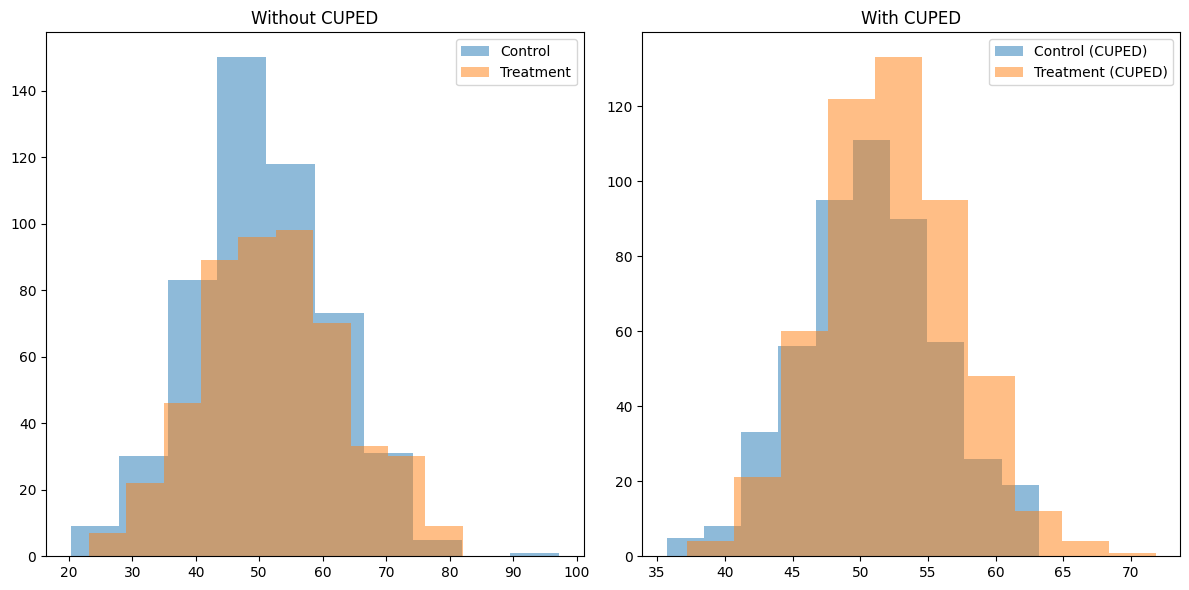

In [180]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# 1. Generate synthetic data for demonstration
np.random.seed(42)
n = 1000  # Number of samples

# Simulate pre-experiment (covariate) data
pre_experiment = np.random.normal(loc=50, scale=10, size=n)

# Simulate experiment data for control and treatment groups
control_outcome = pre_experiment + np.random.normal(loc=0, scale=5, size=n)
treatment_outcome = pre_experiment + np.random.normal(loc=2, scale=5, size=n)  # Treatment has an effect of +2

# Create a DataFrame
data = pd.DataFrame({
    'pre_experiment': pre_experiment,
    'control_outcome': control_outcome,
    'treatment_outcome': treatment_outcome,
    'group': ['control'] * (n//2) + ['treatment'] * (n//2)
})

# Combine control and treatment into one column for easier manipulation
data['outcome'] = np.where(data['group'] == 'control', data['control_outcome'], data['treatment_outcome'])

# 2. Calculate theta (CUPED adjustment factor)
covariance = np.cov(data['pre_experiment'], data['outcome'])[0, 1]
variance = np.var(data['pre_experiment'])
theta = covariance / variance

print(f"Theta (CUPED adjustment factor): {theta}")

# 3. Apply CUPED adjustment
data['cuped_outcome'] = data['outcome'] - theta * (data['pre_experiment'] - np.mean(data['pre_experiment']))

# 4. Compare results with and without CUPED
# Mean difference without CUPED
control_mean = data[data['group'] == 'control']['outcome'].mean()
treatment_mean = data[data['group'] == 'treatment']['outcome'].mean()
mean_diff = treatment_mean - control_mean

# Mean difference with CUPED
control_cuped_mean = data[data['group'] == 'control']['cuped_outcome'].mean()
treatment_cuped_mean = data[data['group'] == 'treatment']['cuped_outcome'].mean()
cuped_mean_diff = treatment_cuped_mean - control_cuped_mean

print(f"Mean difference without CUPED: {mean_diff:.4f}")
print(f"Mean difference with CUPED: {cuped_mean_diff:.4f}")

# 5. Perform t-tests
# Without CUPED
t_stat, p_val = stats.ttest_ind(
    data[data['group'] == 'control']['outcome'], 
    data[data['group'] == 'treatment']['outcome'],
    equal_var=False
)

# With CUPED
t_stat_cuped, p_val_cuped = stats.ttest_ind(
    data[data['group'] == 'control']['cuped_outcome'], 
    data[data['group'] == 'treatment']['cuped_outcome'],
    equal_var=False
)

print(f"T-test without CUPED: t-stat={t_stat:.4f}, p-value={p_val:.4f}")
print(f"T-test with CUPED: t-stat={t_stat_cuped:.4f}, p-value={p_val_cuped:.4f}")

# 6. Visualize results
plt.figure(figsize=(12, 6))

# Without CUPED
plt.subplot(1, 2, 1)
plt.hist(data[data['group'] == 'control']['outcome'], alpha=0.5, label='Control')
plt.hist(data[data['group'] == 'treatment']['outcome'], alpha=0.5, label='Treatment')
plt.title('Without CUPED')
plt.legend()

# With CUPED
plt.subplot(1, 2, 2)
plt.hist(data[data['group'] == 'control']['cuped_outcome'], alpha=0.5, label='Control (CUPED)')
plt.hist(data[data['group'] == 'treatment']['cuped_outcome'], alpha=0.5, label='Treatment (CUPED)')
plt.title('With CUPED')
plt.legend()

plt.tight_layout()
plt.show()

In [178]:
tmp = tmp[~tmp['flgp_post'].isna()]

In [179]:
stats.ttest_ind(
    tmp[tmp['is_customer_holdout'] == False]['flgp_post'], 
    tmp[tmp['is_customer_holdout'] == True]['flgp_post']
)

TtestResult(statistic=-3.690778099200415, pvalue=0.00022365490391818067, df=138248.0)

Text(0.5, 1.0, 'Distribution of initial and transformed Commission Revenue in the test group.')

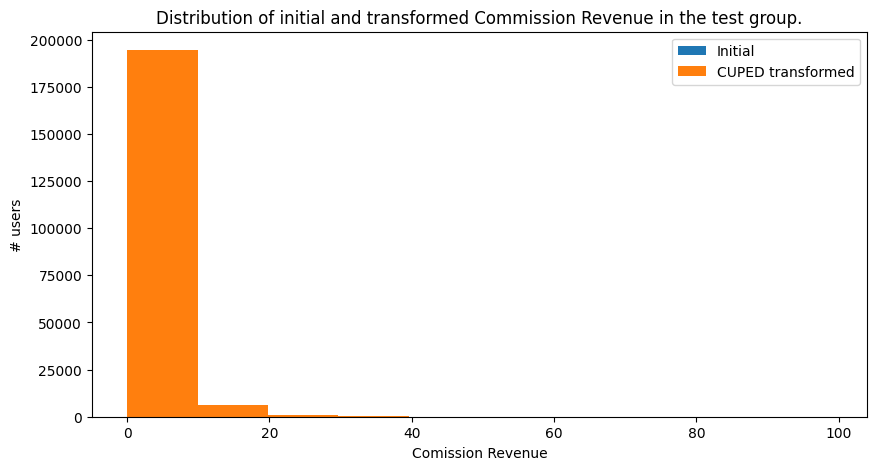

In [170]:
plt.figure(figsize=(10, 5))

plt.hist(tmp[tmp['is_customer_holdout'] == True]['orders_pre'], 
         label='Initial')

plt.hist(tmp[tmp['is_customer_holdout'] == False]['orders_pre'], 
         label='CUPED transformed')

plt.legend()

plt.xlabel('Comission Revenue')
plt.ylabel('# users')

plt.title('Distribution of initial and transformed Commission Revenue in the test group.')

<Axes: xlabel='week', ylabel='opu'>

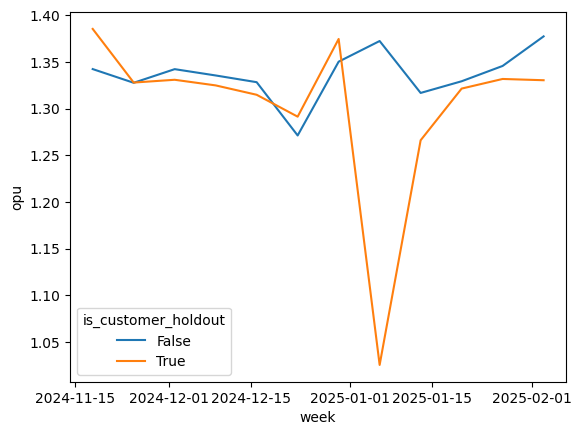

In [155]:
a = order_df[order_df['entity_id'] == 'PO_FI']

sns.lineplot(x = 'week', y = 'opu', hue='is_customer_holdout', data=a)

In [263]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load and prepare data
df = a.copy()

df['created_date'] = pd.to_datetime(df['week'])

# Define holdout release date
holdout_release_date = pd.to_datetime(a['release_week'].iloc[0])

# Add a column to mark pre- and post-holdout periods
df['period'] = df['created_date'].apply(lambda x: 'pre' if x < holdout_release_date else 'post')

# Convert Boolean to Integer for Regression Compatibility
df['is_customer_holdout'] = df['is_customer_holdout'].astype(int)

# Create a post-period indicator (1 if post holdout release, else 0)
df['post_period'] = (df['created_date'] >= holdout_release_date).astype(int)

# Step 2: Run Difference-in-Differences Regression
model = smf.ols('opu ~ is_customer_holdout * post_period', data=df).fit()

# Display Regression Results
print(model.summary())

# # First regression with 'opu' as the dependent variable
# model_opu = smf.ols('opu ~ is_customer_holdout * post_period', data=df).fit()
# print("Results for OPU:")
# print(model_opu.summary())

# # Second regression with another dependent variable (e.g., 'conversion_rate')
# model_conversion = smf.ols('flgpo ~ is_customer_holdout * post_period', data=df).fit()
# print("\nResults for Conversion Rate:")
# print(model_conversion.summary())

                            OLS Regression Results                            
Dep. Variable:                    opu   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                 -0.066
Method:                 Least Squares   F-statistic:                    0.5236
Date:                Tue, 11 Feb 2025   Prob (F-statistic):              0.671
Time:                        10:23:02   Log-Likelihood:                 31.504
No. Observations:                  24   AIC:                            -55.01
Df Residuals:                      20   BIC:                            -50.30
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
0.0070 

In [264]:
1.3337 + -0.0369 

1.2968000000000002

In [265]:
1.2968000000000002 + 0.0070

1.3038

In [162]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# 1. Load and prepare data
df = a.copy()

df['created_date'] = pd.to_datetime(df['week'])

# 2. Define holdout release date
holdout_release_date = pd.to_datetime(a['release_week'].iloc[0])

# 3. Mark pre/post-holdout periods
df['period'] = df['created_date'].apply(lambda x: 'pre' if x < holdout_release_date else 'post')

# 4. Convert Boolean to Integer for Regression Compatibility
df['is_customer_holdout'] = df['is_customer_holdout'].astype(int)

# 5. Create a post-period indicator (1 if post holdout release, else 0)
df['post_period'] = (df['created_date'] >= holdout_release_date).astype(int)

# --------------------------------------------------------------------
# NEW SECTION: Create a baseline outcome variable for each group
# --------------------------------------------------------------------
# We'll define 'baseline_flgpo' as the average flgpo in the pre-period,
# grouped by is_customer_holdout (0 or 1).

# Filter to pre-period only and group by the treatment indicator
df_pre = (
    df[df['period'] == 'pre']
    .groupby('is_customer_holdout', as_index=False)['flgpo']
    .mean()
)
df_pre.rename(columns={'flgpo': 'baseline_flgpo'}, inplace=True)

# Merge the baseline measure back onto the main DataFrame
df = pd.merge(df, df_pre, on='is_customer_holdout', how='left')

# --------------------------------------------------------------------
# Step 2 (Modified): Run Difference-in-Differences Regression 
# controlling for baseline_flgpo
# --------------------------------------------------------------------
# The formula now includes 'baseline_flgpo' to adjust for any 
# pre-existing level differences in flgpo across groups.

model = smf.ols('flgpo ~ is_customer_holdout * post_period + baseline_flgpo',
                data=df).fit()

# Display Regression Results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  flgpo   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2.411
Date:                Mon, 10 Feb 2025   Prob (F-statistic):             0.0970
Time:                        22:59:02   Log-Likelihood:                -11.164
No. Observations:                  24   AIC:                             30.33
Df Residuals:                      20   BIC:                             35.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [163]:
# 1) Mean flgpo for non-holdout (control) in post period
non_holdout_post = df[
    (df['is_customer_holdout'] == 0) & (df['post_period'] == 1)
]['flgpo'].mean()

# 2) Mean flgpo for holdout (treated) in post period
holdout_post = df[
    (df['is_customer_holdout'] == 1) & (df['post_period'] == 1)
]['flgpo'].mean()

print("Non-Holdout Post flgpo (Absolute Mean):", non_holdout_post)
print("Holdout Post flgpo (Absolute Mean):    ", holdout_post)

# Optional: difference
diff_post = holdout_post - non_holdout_post
print("Observed Post Difference (Holdout - Non):", diff_post)

Non-Holdout Post flgpo (Absolute Mean): -1.2221763832451524
Holdout Post flgpo (Absolute Mean):     -0.6217843309207904
Observed Post Difference (Holdout - Non): 0.600392052324362


In [159]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats

# 1. Example data
df = pd.DataFrame({
    'user_id': range(1,11),
    'treatment': [0, 0, 0, 1, 1, 1, 0, 1, 0, 1],
    'pre_metric': [5, 6, 8, 7, 12, 10, 4, 6, 9, 11],
    'post_metric': [6, 7, 10, 9, 15, 12, 6, 8, 11, 14]
})

# 2. Estimate theta using control group only
df_control = df[df['treatment'] == 0]
X = df_control['pre_metric']
Y = df_control['post_metric']

X_mean = X.mean()
Y_mean = Y.mean()

num = ((X - X_mean)*(Y - Y_mean)).sum()
den = ((X - X_mean)**2).sum()
theta = num/den if den != 0 else 0.0

print("Estimated CUPED theta:", theta)

# 3. Compute CUPED-adjusted outcome Y_prime
X_mean_control = X_mean  # Mean of control pre_metric
df['Y_prime'] = df['post_metric'] - theta * (df['pre_metric'] - X_mean_control)

# 4. T-test on the adjusted outcome
df_control = df[df['treatment'] == 0]
df_treatment = df[df['treatment'] == 1]

t_res_cuped = stats.ttest_ind(df_control['Y_prime'], df_treatment['Y_prime'], equal_var=False)
print("CUPED T-test p-value:", t_res_cuped.pvalue)
print("Mean control (CUPED):", df_control['Y_prime'].mean())
print("Mean treatment (CUPED):", df_treatment['Y_prime'].mean())

# (Optional) Compare naive approach on post_metric
t_res_naive = stats.ttest_ind(df_control['post_metric'], df_treatment['post_metric'], equal_var=False)
print("Naive T-test p-value:", t_res_naive.pvalue)


Estimated CUPED theta: 1.1046511627906976
CUPED T-test p-value: 0.10895780792408892
Mean control (CUPED): 8.0
Mean treatment (CUPED): 8.506976744186048
Naive T-test p-value: 0.07203144680215805


In [140]:
((0.8792  + -0.9588) / -0.9588 )* 100

8.302044221944097

In [132]:
# Calculate Post-Intervention Profitability (FLGPO)

# 1. Non-Holdout (Treatment) Post-Intervention
flgpo_non_holdout_post = intercept + post_period_coef

# 2. Holdout (Control) Post-Intervention
flgpo_holdout_post = intercept + is_customer_holdout_coef + post_period_coef + interaction_coef

# Calculate the percentage causal change (how non-holdout performed compared to holdout)
percentage_causal_change = (interaction_coef / abs(flgpo_non_holdout_post)) * 100

# Display the results
print(f"Post-Intervention Profitability (Non-Holdout, Treatment): {flgpo_non_holdout_post:.4f}")
print(f"Post-Intervention Profitability (Holdout, Control): {flgpo_holdout_post:.4f}")
print(f"Causal Effect (Interaction Term): {interaction_coef:.4f}")
print(f"Percentage Causal Change (Non-Holdout vs Holdout): {percentage_causal_change:.2f}%")

Post-Intervention Profitability (Non-Holdout, Treatment): -1.2222
Post-Intervention Profitability (Holdout, Control): -0.6218
Causal Effect (Interaction Term): 0.2574
Percentage Causal Change (Non-Holdout vs Holdout): 21.06%


In [134]:
-0.9648 + -0.2574

-1.2222

In [131]:
# Extract coefficients
intercept = model.params['Intercept']
is_customer_holdout_coef = model.params.get('is_customer_holdout', 0)
post_period_coef = model.params.get('post_period', 0)
interaction_coef = model.params.get('is_customer_holdout:post_period', 0)

# Calculate OPU for Holdout (Control) Post-Intervention
opu_holdout_post = intercept + is_customer_holdout_coef + post_period_coef + interaction_coef

# Calculate the percentage treatment effect using the interaction term
percentage_treatment_effect = (interaction_coef / abs(opu_holdout_post)) * 100

# Display the results
print(f"Orders Per User (Holdout, Post-Intervention): {opu_holdout_post:.4f}")
print(f"Interaction Term (Treatment Effect): {interaction_coef:.4f}")
print(f"Percentage Treatment Effect on OPU: {percentage_treatment_effect:.2f}%")

Orders Per User (Holdout, Post-Intervention): -0.6218
Interaction Term (Treatment Effect): 0.2574
Percentage Treatment Effect on OPU: 41.39%


In [120]:
(-1.2222 + -0.6218) / -0.6218

2.965583788999678

In [126]:
# Extract the coefficient for the interaction term
interaction_coef = model.params['is_customer_holdout:post_period']
print(f'Interaction Coefficient: {interaction_coef}')

# Extract the p-value for the interaction term
interaction_pval = model.pvalues['is_customer_holdout:post_period']
print(f'P-value: {interaction_pval}')

# Extract the confidence intervals for the interaction term
interaction_ci = model.conf_int().loc['is_customer_holdout:post_period']
print(f'Confidence Interval: {interaction_ci.tolist()}')

Interaction Coefficient: 0.25735302655262426
P-value: 0.48949843170108687
Confidence Interval: [-0.5050979742774644, 1.019804027382713]


In [127]:
1.0229
-0.9811

-0.9811

In [128]:
0.3594 / 0.9811

0.3663235144225869

In [129]:
-0.9811 + 0.3594

-0.6216999999999999

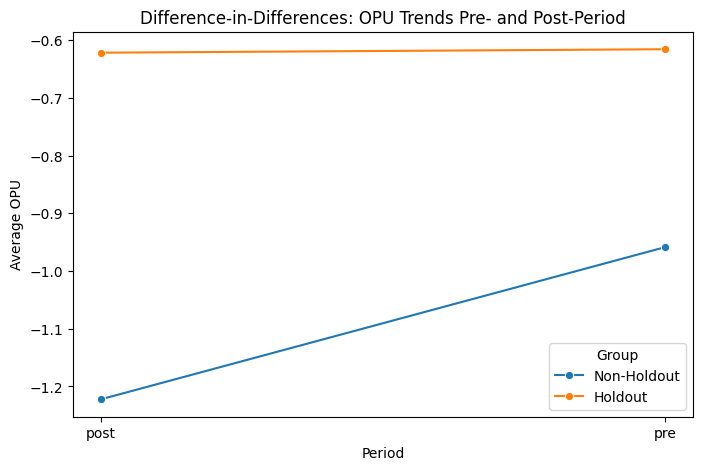

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by period and holdout status to get average opu
avg_opu = df.groupby(['period', 'is_customer_holdout'])['flgpo'].mean().reset_index()

# Convert is_customer_holdout back to labels for clarity
avg_opu['Group'] = avg_opu['is_customer_holdout'].map({0: 'Non-Holdout', 1: 'Holdout'})

# Plotting
plt.figure(figsize=(8, 5))
sns.lineplot(data=avg_opu, x='period', y='flgpo', hue='Group', marker='o')
plt.title('Difference-in-Differences: OPU Trends Pre- and Post-Period')
plt.xlabel('Period')
plt.ylabel('Average OPU')
plt.show()

In [81]:
from linearmodels.system import SUR
from linearmodels.system import IV3SLS
import pandas as pd

# Define the equations for both dependent variables
equations = {
    'opu_eq': 'opu ~ is_customer_holdout + post_period + is_customer_holdout:post_period',
    'flgpo_eq': 'flgpo ~ is_customer_holdout + post_period + is_customer_holdout:post_period'
}

# Fit the SUR model
sur_model = SUR.from_formula(equations, data=df).fit()

# Display results
print(sur_model.summary)


                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.6611
No. Equations.:                     2   McElroy's R-squared:                -0.5089
No. Observations:                  28   Judge's (OLS) R-squared:            -29.823
Date:                Mon, Feb 10 2025   Berndt's R-squared:                 -389.55
Time:                        16:22:28   Dhrymes's R-squared:                 0.2730
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                             Equation: opu_eq, Dependent Variable: opu                             
                                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------------------
is_customer_holdout         

In [80]:
# Run separate OLS regressions
model_opu = smf.ols('opu ~ is_customer_holdout * post_period', data=df).fit()
model_conversion = smf.ols('flgpo ~ is_customer_holdout * post_period', data=df).fit()

# Display results
print("Results for OPU:")
print(model_opu.summary())

print("\nResults for Conversion Rate:")
print(model_conversion.summary())

Results for OPU:
                            OLS Regression Results                            
Dep. Variable:                    opu   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     43.75
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           6.95e-10
Time:                        16:22:13   Log-Likelihood:                 67.572
No. Observations:                  28   AIC:                            -127.1
Df Residuals:                      24   BIC:                            -121.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [82]:
correlation = df[['opu', 'flgpo']].corr()
print(correlation)


            opu     flgpo
opu    1.000000 -0.123881
flgpo -0.123881  1.000000


In [45]:
df[df['period'] == 'post'].groupy('is_customer_holdout').agg({})

,region,entity_id,release_date,week,is_customer_holdout,users,orders,flgp,opu,flgpo,created_date,period,post_period
9,Asia,FP_SG,2025-01-02,2025-01-13,1,3741,7779,-1384.522117,2.079391,-0.177982,2025-01-13,post,1
139,Asia,FP_SG,2025-01-02,2025-01-06,0,180118,372011,8730.712030,2.065374,0.023469,2025-01-06,post,1
154,Asia,FP_SG,2025-01-02,2025-01-27,0,178770,363468,-32551.808350,2.033160,-0.089559,2025-01-27,post,1
314,Asia,FP_SG,2025-01-02,2025-01-27,1,3721,7556,-4073.309951,2.030637,-0.539083,2025-01-27,post,1
664,Asia,FP_SG,2025-01-02,2025-02-03,0,163904,324352,217074.680086,1.978914,0.669256,2025-02-03,post,1
744,Asia,FP_SG,2025-01-02,2025-01-06,1,3635,7533,-1224.134893,2.072352,-0.162503,2025-01-06,post,1
779,Asia,FP_SG,2025-01-02,2025-01-20,0,185873,394532,70809.626073,2.122589,0.179478,2025-01-20,post,1
1188,Asia,FP_SG,2025-01-02,2025-02-03,1,3318,6527,2983.947902,1.967149,0.457170,2025-02-03,post,1
1290,Asia,FP_SG,2025-01-02,2025-01-20,1,3794,7972,-703.612253,2.101212,-0.088260,2025-01-20,post,1
1331,Asia,FP_SG,2025-01-02,2025-01-13,0,187060,397273,24700.925281,2.123773,0.062176,2025-01-13,post,1


In [6]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load and prepare data
df = a.copy()

df = df[df['variant'] == False]

df['created_date'] = pd.to_datetime(df['week'])

# Define holdout release date
holdout_release_date = pd.to_datetime('2025-01-13')

# Add a column to mark pre- and post-holdout periods
df['period'] = df['created_date'].apply(lambda x: 'pre' if x < holdout_release_date else 'post')

# # Step 1: Calculate Daily Orders per User
# daily_orders = df.groupby(['created_date', 'is_customer_holdout']).agg(
#     total_orders=('orders', 'sum'),
#     unique_users=('dps_customer_id', pd.Series.nunique)
# ).reset_index()

# daily_orders['Orders_per_User'] = daily_orders['total_orders'] / daily_orders['unique_users']

# # Merge period information into daily_orders
# daily_orders = pd.merge(daily_orders, df[['created_date', 'period']].drop_duplicates(), on='created_date')

# Convert Boolean to Integer for Regression Compatibility
daily_orders['is_customer_holdout'] = daily_orders['is_customer_holdout'].astype(int)

# Create a post-period indicator (1 if post holdout release, else 0)
daily_orders['post_period'] = (daily_orders['created_date'] >= holdout_release_date).astype(int)

# Step 2: Run Difference-in-Differences Regression
model = smf.ols('Orders_per_User ~ is_customer_holdout * post_period', data=daily_orders).fit()

# Display Regression Results
print(model.summary())

# Step 3: Run T-Tests for Holdout and Non-Holdout Groups
# Separate Holdout and Non-Holdout data
holdout_data = daily_orders[daily_orders['is_customer_holdout'] == 1]
non_holdout_data = daily_orders[daily_orders['is_customer_holdout'] == 0]

# T-Test for Holdout Group (Pre vs Post)
pre_holdout_orders = holdout_data[holdout_data['period'] == 'pre']['Orders_per_User']
post_holdout_orders = holdout_data[holdout_data['period'] == 'post']['Orders_per_User']
t_stat_holdout, p_value_holdout = ttest_ind(pre_holdout_orders, post_holdout_orders, equal_var=False)

# T-Test for Non-Holdout Group (Pre vs Post)
pre_non_holdout_orders = non_holdout_data[non_holdout_data['period'] == 'pre']['Orders_per_User']
post_non_holdout_orders = non_holdout_data[non_holdout_data['period'] == 'post']['Orders_per_User']
t_stat_non_holdout, p_value_non_holdout = ttest_ind(pre_non_holdout_orders, post_non_holdout_orders, equal_var=False)

# Display T-Test Results
print(f"Holdout Group - T-Statistic: {t_stat_holdout}, P-Value: {p_value_holdout}")
print(f"Non-Holdout Group - T-Statistic: {t_stat_non_holdout}, P-Value: {p_value_non_holdout}")

# Step 4: Plotting Orders per User Over Time
plt.figure(figsize=(14, 6))

# Plot Holdout and Non-Holdout Orders per User
for group in daily_orders['is_customer_holdout'].unique():
    subset = daily_orders[daily_orders['is_customer_holdout'] == group]
    label = 'Holdout' if group == 1 else 'Non-Holdout'
    plt.plot(subset['created_date'], subset['Orders_per_User'], label=label, linestyle='--' if group == 1 else '-')

# Mark Holdout Release Date
plt.axvline(x=holdout_release_date, color='red', linestyle=':', linewidth=2, label='Holdout Release Date')

plt.xlabel('Date')
plt.ylabel('Orders per User')
plt.title('Orders per User Before and After Holdout Release')
plt.legend()
plt.grid(True)
plt.show()


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

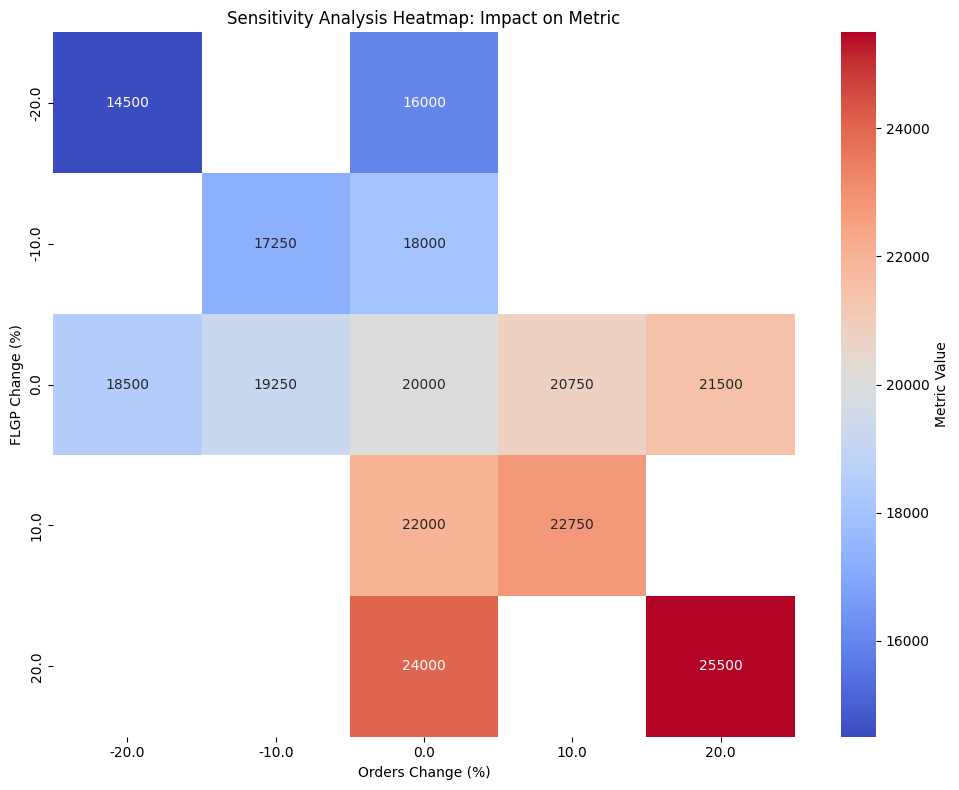

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Baseline Values
baseline_flgp = 100000  # Example FLGP value
baseline_orders = 5000  # Example Orders value
baseline_metric = 20000  # Example Target Metric value

# Define sensitivity coefficients (assumed linear relationship)
# These coefficients represent how much the metric changes with FLGP and Orders.
# Adjust these based on real-world data or assumptions.
flgp_sensitivity = 0.2  # Metric changes 0.2 units per 1 unit change in FLGP
orders_sensitivity = 1.5  # Metric changes 1.5 units per 1 order change

# Define Scenarios (percentage changes)
scenarios = {
    "Baseline": (0, 0),
    "+10% FLGP": (0.10, 0),
    "-10% FLGP": (-0.10, 0),
    "+20% FLGP": (0.20, 0),
    "-20% FLGP": (-0.20, 0),
    "+10% Orders": (0, 0.10),
    "-10% Orders": (0, -0.10),
    "+20% Orders": (0, 0.20),
    "-20% Orders": (0, -0.20),
    "+10% FLGP & +10% Orders": (0.10, 0.10),
    "-10% FLGP & -10% Orders": (-0.10, -0.10),
    "+20% FLGP & +20% Orders": (0.20, 0.20),
    "-20% FLGP & -20% Orders": (-0.20, -0.20)
}

# Simulation Results
results = []

for scenario, (flgp_change, orders_change) in scenarios.items():
    # Apply changes
    new_flgp = baseline_flgp * (1 + flgp_change)
    new_orders = baseline_orders * (1 + orders_change)
    
    # Calculate new metric
    metric_change = (flgp_sensitivity * (new_flgp - baseline_flgp)) + \
                    (orders_sensitivity * (new_orders - baseline_orders))
    new_metric = baseline_metric + metric_change
    
    # Append results
    results.append({
        "Scenario": scenario,
        "FLGP Change (%)": flgp_change * 100,
        "Orders Change (%)": orders_change * 100,
        "Metric": new_metric
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Improved Visualization: Heatmap to show sensitivity
pivot_table = results_df.pivot(index="FLGP Change (%)", columns="Orders Change (%)", values="Metric")

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="coolwarm", cbar_kws={'label': 'Metric Value'})
plt.title('Sensitivity Analysis Heatmap: Impact on Metric')
plt.xlabel('Orders Change (%)')
plt.ylabel('FLGP Change (%)')
plt.tight_layout()
plt.show()
